# Finetuning tha last year of fine-rune model

In [1]:
import os
ml_code_path='/home/leilapirhaji/mz_embed_engine/ml'
os.chdir(ml_code_path)

import pandas as pd
import importlib
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
import optuna
import imaplib


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import numpy as np
import random
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score


#importing fundtion to get encoder info and perfrom tasks 

from get_finetune_encoder import get_finetune_encoder_from_modelID, get_input_data
from freez_encoder import fine_tune_model


import freez_encoder
importlib.reload(freez_encoder)


%who



[neptune] [warning] NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.
2024-09-03 00:20:29.614504: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-03 00:20:29.629761: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-03 00:20:29.649112: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-03 00:20:29.654761: E external/local_xla/xla/stream_executor/c

DataLoader	 LabelEncoder	 TensorDataset	 accuracy_score	 f1_score	 fine_tune_model	 freez_encoder	 get_finetune_encoder_from_modelID	 get_input_data	 
imaplib	 importlib	 label_encoder	 ml_code_path	 nn	 np	 optim	 optuna	 os	 
pd	 precision_score	 random	 recall_score	 roc_auc_score	 torch	 


## gettin the model ID and info

In [2]:
#input data
input_data_location='/home/leilapirhaji/PROCESSED_DATA_2'
finetune_save_dir='/home/leilapirhaji/finetune_frozen_layer' 


#tasks to predict using encoder
task_list_cat=['Benefit BINARY', 'Nivo Benefit BINARY', 'MSKCC BINARY', 'IMDC BINARY', 'Benefit ORDINAL', 'MSKCC ORDINAL', 'IMDC ORDINAL', 'ORR', 'Benefit', 'IMDC', 'MSKCC', 'Prior_2' ]

#survival tasks
task_list_survival=[ 'OS', 'OS_Event', 'PFS', 'PFS_Event' ]

#pre-train model info  - 1
model_id_pretrain_1='RCC-10290'

#model info
model_id_real_1='RCC-35857'
model_neptune_path_real_1='fine-tune-optuna-RCC-10290-recon-real-modified-loss-Aug29'

model_id_rand_1='RCC-35899'
model_neptune_path_rand_1='fine-tune-optuna-RCC-10290-recon-random-modified-loss-Aug29'

finetune_dic = {
    model_id_pretrain_1: {
        'pretrain_model_id': model_id_pretrain_1,
        'model_id_real': model_id_real_1,
        'model_neptune_path_real': model_neptune_path_real_1,
        'model_id_rand': model_id_rand_1,
        'model_neptune_path_rand': model_neptune_path_rand_1
    }
}

for pretrain_id, model_info in finetune_dic.items():

    print (f'evaluating pre-train model: {pretrain_id}')
    model_id_real = model_info['model_id_real']
    model_neptune_path_real = model_info['model_neptune_path_real']
    model_id_rand = model_info['model_id_rand']
    model_neptune_path_rand = model_info['model_neptune_path_rand']

    # Output locations
    output_path_real = f'{finetune_save_dir}/{model_id_real}'
    os.makedirs(output_path_real, exist_ok=True)

    output_path_rand = f'{finetune_save_dir}/{model_id_rand}'
    os.makedirs(output_path_rand, exist_ok=True)


    #get fine-tuning input data 
    (X_data_train, y_data_train, X_data_val, y_data_val, X_data_test, y_data_test)=get_input_data(input_data_location)

    #latent space with fine-tuned initization
    print (f'getting the encoder for: {model_id_real}')
    (encoder_real, Z_train_real, Z_val_real, Z_test_real, y_data_train, y_data_val, y_data_test)=get_finetune_encoder_from_modelID(model_id_real, input_data_location, output_path_rand, ml_code_path, model_neptune_path_real)


    print (f'getting the encoder for: {model_id_rand}')
    #latent space with rand initization
    (encoder_rand, Z_train_rand, Z_val_rand, Z_test_rand, y_data_train, y_data_val, y_data_test)=get_finetune_encoder_from_modelID(model_id_rand, input_data_location, output_path_rand, ml_code_path, model_neptune_path_rand )


   


evaluating pre-train model: RCC-10290


getting the encoder for: RCC-35857


[neptune] [warning] NeptuneWarning: By default, these monitoring options are disabled in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', 'capture_hardware_metrics'. You can set them to 'True' when initializing the run and the monitoring will continue until you call run.stop() or the kernel stops. NOTE: To track the source files, pass their paths to the 'source_code' argument. For help, see: https://docs.neptune.ai/logging/source_code/


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-35857
Deleted existing file at /home/leilapirhaji/finetune_frozen_layer/RCC-35899/RCC-35857_encoder_state.pth


Fetching file...: 0 [00:00, ?/s]

[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-35857/metadata


/home/leilapirhaji/mz_embed_engine/ml/get_finetune_encoder.py:99: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder_state_dict = torch.load(model_encoder_file, map_locat

getting the encoder for: RCC-35899
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-35899
Deleted existing file at /home/leilapirhaji/finetune_frozen_layer/RCC-35899/RCC-35899_encoder_state.pth


Fetching file...: 0 [00:00, ?/s]

[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-35899/metadata


/home/leilapirhaji/mz_embed_engine/ml/get_finetune_encoder.py:99: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder_state_dict = torch.load(model_encoder_file, map_locat

In [3]:
Z_train_real.shape, Z_val_real.shape, Z_test_real.shape, Z_train_rand.shape, Z_val_rand.shape, Z_test_rand.shape, y_data_train.shape, y_data_val.shape, y_data_test.shape, X_data_train.shape, X_data_val.shape, X_data_test.shape

((443, 220),
 (149, 220),
 (149, 220),
 (443, 220),
 (149, 220),
 (149, 220),
 (443, 58),
 (149, 58),
 (149, 58),
 (443, 2736),
 (149, 2736),
 (149, 2736))

## Cox Prediction

In [4]:
#makign seeds that are the same for all the tasks
#import set_seed
#from set_seed import set_seed
#seed = set_seed(42)  # Explicitly set and save the seed

#with open('/home/leilapirhaji/mz_embed_engine/ml/seed_Aug31.txt', 'w') as f:
#    f.write(str(seed))
#loading the seed file
with open('/home/leilapirhaji/mz_embed_engine/ml/seed_Aug31.txt', 'r') as f:
    seed = int(f.read())

## NO latent Avergaing re-training last layer

### optuna optimization No latnet averaging


In [29]:
import optuna
from optuna.trial import TrialState

import freez_encoder_cox_head
importlib.reload(freez_encoder_cox_head)
from freez_encoder_cox_head import fine_tune_cox_model

task='OS'
task_event='OS_Event'

def objective(trial):
    # Define the search space for hyperparameters
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-9, 1e-4)
    dropout = trial.suggest_uniform('dropout', 0.1, 0.4)
    task_layer_size = trial.suggest_int('task_layer_size', 32, 64, 256)
    l1_reg_weight = trial.suggest_loguniform('l1_reg_weight', 1e-7, 1e-2)
    l2_reg_weight = trial.suggest_loguniform('l2_reg_weight', 1e-7, 1e-2)


    best_model = None  # Variable to store the best model
    best_c_index = -float('inf')  # Initialize to a very low value to keep track of the best AUC


    # Call the fine-tuning function
    model, metrics_per_epoch = fine_tune_cox_model(
        encoder=encoder_real,  # Assuming 'encoder' is already defined
        X_train=X_data_train,  # Your training data
        y_duration_train=y_data_train[task],  # Training duration data
        y_event_train=y_data_train[task_event],  # Training event data
        X_val=X_data_val,  # Your validation data
        y_duration_val= y_data_val[task],  # Validation duration data
        y_event_val=y_data_val[task_event],  # Validation event data
        num_epochs=20,  # Fixed number of epochs; you can adjust
        batch_size=32,  # Fixed batch size; you can make this a hyperparameter too
        learning_rate=learning_rate,
        dropout=dropout,
        task_layer_size=task_layer_size,
        l1_reg_weight=l1_reg_weight,
        l2_reg_weight=l2_reg_weight,
        seed=seed  # Fixed seed for reproducibility
    )
    
    # Return the C-index from the last epoch as the objective to maximize
    c_index = metrics_per_epoch['C-index'].iloc[-1]
    
    # Save the model if it has the best AUC so far
    if c_index > best_c_index:
        best_c_index = c_index
        best_model = model
        torch.save(best_model, f'{finetune_save_dir}/best_model_C_index_NO_latent_avg.pth')  # Save the best model

    return c_index


# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, timeout=3600)  # You can adjust the number of trials and timeout

# Display the best hyperparameters found
print(f"Best trial: {study.best_trial.number}")
print(f"Best value (C-index): {study.best_trial.value}")


[I 2024-09-03 03:13:18,142] A new study created in memory with name: no-name-225a9d77-38c1-4d0d-bf8a-fbffe63b1394
/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/

Epoch 1/20, Loss: 233.45987701416016
Validation Loss: 233.409912109375, C-index: 0.6486651101411024


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 233.4671129499163
Validation Loss: 233.40979614257813, C-index: 0.6543498122018069
Epoch 3/20, Loss: 233.4688219342913
Validation Loss: 233.40696716308594, C-index: 0.6427773830068013
Epoch 4/20, Loss: 233.46326337541853
Validation Loss: 233.41053466796876, C-index: 0.6411531824180287
Epoch 5/20, Loss: 233.46464647565568
Validation Loss: 233.41273193359376, C-index: 0.628870165465435
Epoch 6/20, Loss: 233.46120125906808
Validation Loss: 233.408056640625, C-index: 0.6587148512841335
Epoch 7/20, Loss: 233.46356419154577
Validation Loss: 233.4075714111328, C-index: 0.6499847731194802
Epoch 8/20, Loss: 233.46154022216797
Validation Loss: 233.40936889648438, C-index: 0.6490711602882956
Epoch 9/20, Loss: 233.4632121494838
Validation Loss: 233.4072296142578, C-index: 0.6656177037864176
Epoch 10/20, Loss: 233.4699249267578
Validation Loss: 233.4083709716797, C-index: 0.6665313166176022
Epoch 11/20, Loss: 233.46226501464844
Validation Loss: 233.40749816894532, C-index: 0.65110

[I 2024-09-03 03:13:26,317] Trial 0 finished with value: 0.6512029235610598 and parameters: {'learning_rate': 4.534843685722567e-09, 'dropout': 0.3293986992992115, 'task_layer_size': 32, 'l1_reg_weight': 0.005394765649520758, 'l2_reg_weight': 4.142683420913143e-07}. Best is trial 0 with value: 0.6512029235610598.


Epoch 20/20, Loss: 233.4514661516462
Validation Loss: 233.40639953613282, C-index: 0.6512029235610598
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.1586756791387285
Validation Loss: 2.108317422866821, C-index: 0.6500862856562786


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.1658845969608853
Validation Loss: 2.1079843759536745, C-index: 0.6542482996650086
Epoch 3/20, Loss: 2.167474695614406
Validation Loss: 2.1044028282165526, C-index: 0.6462288092579433
Epoch 4/20, Loss: 2.162054112979344
Validation Loss: 2.1084447383880613, C-index: 0.6419652827124149
Epoch 5/20, Loss: 2.1626637748309543
Validation Loss: 2.110278511047363, C-index: 0.6335397421581566
Epoch 6/20, Loss: 2.1583154797554016
Validation Loss: 2.104717826843262, C-index: 0.6605420769465029
Epoch 7/20, Loss: 2.1618551356451854
Validation Loss: 2.1040794610977174, C-index: 0.6514059486346564
Epoch 8/20, Loss: 2.159558798585619
Validation Loss: 2.1055341720581056, C-index: 0.651608973708253
Epoch 9/20, Loss: 2.161153154713767
Validation Loss: 2.102469801902771, C-index: 0.6689676175007614
Epoch 10/20, Loss: 2.1673846585409984
Validation Loss: 2.1030682802200316, C-index: 0.6700842554055426
Epoch 11/20, Loss: 2.159183050904955
Validation Loss: 2.1023263692855836, C-index: 0.6582

[I 2024-09-03 03:13:34,352] Trial 1 finished with value: 0.6628768652928637 and parameters: {'learning_rate': 2.757377968882195e-06, 'dropout': 0.15785077579156956, 'task_layer_size': 32, 'l1_reg_weight': 5.953385241763889e-07, 'l2_reg_weight': 2.5452757734972515e-05}. Best is trial 1 with value: 0.6628768652928637.


Epoch 20/20, Loss: 2.148214110306331
Validation Loss: 2.0967901945114136, C-index: 0.6628768652928637
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.1397649901253835
Validation Loss: 2.0865399122238157, C-index: 0.6576997259161507


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.146665028163365
Validation Loss: 2.086866569519043, C-index: 0.6517104862450512
Epoch 3/20, Loss: 2.1485459123338972
Validation Loss: 2.082268214225769, C-index: 0.6517104862450512
Epoch 4/20, Loss: 2.1439772844314575
Validation Loss: 2.0885127544403077, C-index: 0.6451121713531621
Epoch 5/20, Loss: 2.1451597894941057
Validation Loss: 2.09071364402771, C-index: 0.6371941934828952
Epoch 6/20, Loss: 2.139782266957419
Validation Loss: 2.0851969718933105, C-index: 0.6607451020200995
Epoch 7/20, Loss: 2.1445406760488237
Validation Loss: 2.0853204011917112, C-index: 0.6530301492234291
Epoch 8/20, Loss: 2.1419680459158763
Validation Loss: 2.08725221157074, C-index: 0.6546543498122018
Epoch 9/20, Loss: 2.144288795334952
Validation Loss: 2.084339427947998, C-index: 0.6697797177951477
Epoch 10/20, Loss: 2.1506626776286533
Validation Loss: 2.0850772619247437, C-index: 0.6709978682367272
Epoch 11/20, Loss: 2.142803030354636
Validation Loss: 2.0851561784744264, C-index: 0.659831

[I 2024-09-03 03:13:43,289] Trial 2 finished with value: 0.6609481270936961 and parameters: {'learning_rate': 8.361230988144586e-09, 'dropout': 0.11866265672377646, 'task_layer_size': 32, 'l1_reg_weight': 2.387969172838038e-07, 'l2_reg_weight': 4.720130626934365e-05}. Best is trial 1 with value: 0.6628768652928637.


Epoch 20/20, Loss: 2.132913751261575
Validation Loss: 2.084048843383789, C-index: 0.6609481270936961
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 3.143868122782026
Validation Loss: 3.0907694339752196, C-index: 0.6575982133793523


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 3.151455657822745
Validation Loss: 3.0910926342010496, C-index: 0.651608973708253
Epoch 3/20, Loss: 3.1533239909580777
Validation Loss: 3.086483097076416, C-index: 0.6517104862450512
Epoch 4/20, Loss: 3.1490916524614607
Validation Loss: 3.092729902267456, C-index: 0.6451121713531621
Epoch 5/20, Loss: 3.1491451604025706
Validation Loss: 3.0949277877807617, C-index: 0.6369911684092986
Epoch 6/20, Loss: 3.144490514482771
Validation Loss: 3.089403486251831, C-index: 0.6606435894833012
Epoch 7/20, Loss: 3.1490118503570557
Validation Loss: 3.089522123336792, C-index: 0.6531316617602274
Epoch 8/20, Loss: 3.1464820078441074
Validation Loss: 3.0914518356323244, C-index: 0.6546543498122018
Epoch 9/20, Loss: 3.147202525820051
Validation Loss: 3.088530969619751, C-index: 0.6697797177951477
Epoch 10/20, Loss: 3.156416177749634
Validation Loss: 3.089267206192017, C-index: 0.6707948431631306
Epoch 11/20, Loss: 3.147516233580453
Validation Loss: 3.089332675933838, C-index: 0.65972997

[I 2024-09-03 03:13:52,276] Trial 3 finished with value: 0.6611511521672927 and parameters: {'learning_rate': 3.3648481311027556e-08, 'dropout': 0.23434770942779848, 'task_layer_size': 32, 'l1_reg_weight': 2.359539918579892e-05, 'l2_reg_weight': 2.2384988380738373e-05}. Best is trial 1 with value: 0.6628768652928637.


Epoch 20/20, Loss: 3.1390295369284495
Validation Loss: 3.0881754398345946, C-index: 0.6611511521672927
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 42.399631772722515
Validation Loss: 42.346466064453125, C-index: 0.6575982133793523


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 42.40655354091099
Validation Loss: 42.34675979614258, C-index: 0.6519135113186478
Epoch 3/20, Loss: 42.4089241027832
Validation Loss: 42.34212417602539, C-index: 0.6517104862450512
Epoch 4/20, Loss: 42.40397616795131
Validation Loss: 42.34834671020508, C-index: 0.6450106588163638
Epoch 5/20, Loss: 42.40490995134626
Validation Loss: 42.35052337646484, C-index: 0.6371941934828952
Epoch 6/20, Loss: 42.40073313031878
Validation Loss: 42.34497909545898, C-index: 0.6606435894833012
Epoch 7/20, Loss: 42.404196875435964
Validation Loss: 42.34506607055664, C-index: 0.6531316617602274
Epoch 8/20, Loss: 42.40118898664202
Validation Loss: 42.346971893310545, C-index: 0.6544513247386052
Epoch 9/20, Loss: 42.403399331229075
Validation Loss: 42.344024658203125, C-index: 0.6697797177951477
Epoch 10/20, Loss: 42.41210692269461
Validation Loss: 42.3447380065918, C-index: 0.6709978682367272
Epoch 11/20, Loss: 42.403781345912385
Validation Loss: 42.344774627685545, C-index: 0.65942543904

[I 2024-09-03 03:14:00,188] Trial 4 finished with value: 0.6610496396304943 and parameters: {'learning_rate': 2.6794191209842747e-09, 'dropout': 0.32016833293556407, 'task_layer_size': 32, 'l1_reg_weight': 0.0009366592355451195, 'l2_reg_weight': 1.8072053879575085e-06}. Best is trial 1 with value: 0.6628768652928637.


Epoch 20/20, Loss: 42.393798283168245
Validation Loss: 42.343389892578124, C-index: 0.6610496396304943
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 132.9847651890346
Validation Loss: 132.93170776367188, C-index: 0.6576997259161507


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 132.99208395821708
Validation Loss: 132.93183288574218, C-index: 0.6519135113186478
Epoch 3/20, Loss: 132.99375915527344
Validation Loss: 132.92705383300782, C-index: 0.6518119987818496
Epoch 4/20, Loss: 132.98942347935267
Validation Loss: 132.93309020996094, C-index: 0.6450106588163638
Epoch 5/20, Loss: 132.98990304129464
Validation Loss: 132.9351043701172, C-index: 0.6372957060196934
Epoch 6/20, Loss: 132.9848360334124
Validation Loss: 132.92939147949218, C-index: 0.6605420769465029
Epoch 7/20, Loss: 132.98895699637276
Validation Loss: 132.9293212890625, C-index: 0.6532331742970257
Epoch 8/20, Loss: 132.98585510253906
Validation Loss: 132.93104248046876, C-index: 0.6545528372754035
Epoch 9/20, Loss: 132.98727416992188
Validation Loss: 132.92792358398438, C-index: 0.6697797177951477
Epoch 10/20, Loss: 132.99540165492468
Validation Loss: 132.92849426269532, C-index: 0.6707948431631306
Epoch 11/20, Loss: 132.9861820765904
Validation Loss: 132.92835388183593, C-index: 0

[I 2024-09-03 03:14:15,512] Trial 5 finished with value: 0.6609481270936961 and parameters: {'learning_rate': 4.901794031692725e-09, 'dropout': 0.21090335880315897, 'task_layer_size': 32, 'l1_reg_weight': 0.0030436594707862583, 'l2_reg_weight': 8.039049674216355e-05}. Best is trial 1 with value: 0.6628768652928637.


Epoch 20/20, Loss: 132.97620282854353
Validation Loss: 132.92547912597655, C-index: 0.6609481270936961
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 4.014847261565072
Validation Loss: 3.9613256454467773, C-index: 0.6578012384529489


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 4.021473714283535
Validation Loss: 3.9616085052490235, C-index: 0.651608973708253
Epoch 3/20, Loss: 4.0232303483145575
Validation Loss: 3.9569775104522704, C-index: 0.6519135113186478
Epoch 4/20, Loss: 4.0185048920767645
Validation Loss: 3.963179588317871, C-index: 0.6453151964267587
Epoch 5/20, Loss: 4.019452299390521
Validation Loss: 3.965362215042114, C-index: 0.6368896558725002
Epoch 6/20, Loss: 4.014500447681972
Validation Loss: 3.9598124027252197, C-index: 0.6604405644097046
Epoch 7/20, Loss: 4.019036616597857
Validation Loss: 3.9598954200744627, C-index: 0.6526240990762359
Epoch 8/20, Loss: 4.0166047641209195
Validation Loss: 3.9617895603179933, C-index: 0.6538422495178154
Epoch 9/20, Loss: 4.018727694238935
Validation Loss: 3.9588525772094725, C-index: 0.6692721551111562
Epoch 10/20, Loss: 4.024994509560721
Validation Loss: 3.959586191177368, C-index: 0.6713024058471221
Epoch 11/20, Loss: 4.017101338931492
Validation Loss: 3.9595550537109374, C-index: 0.659526

[I 2024-09-03 03:14:24,883] Trial 6 finished with value: 0.6605420769465029 and parameters: {'learning_rate': 1.049556828728701e-07, 'dropout': 0.13126044985320112, 'task_layer_size': 32, 'l1_reg_weight': 4.3847466933411616e-05, 'l2_reg_weight': 0.0021875114191251873}. Best is trial 1 with value: 0.6628768652928637.


Epoch 20/20, Loss: 4.006969366754804
Validation Loss: 3.9581379890441895, C-index: 0.6605420769465029
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 393.810049874442
Validation Loss: 393.68876953125, C-index: 0.6576997259161507


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 393.6927381243025
Validation Loss: 393.569921875, C-index: 0.6542482996650086
Epoch 3/20, Loss: 393.58100455147877
Validation Loss: 393.45696411132815, C-index: 0.6500862856562786
Epoch 4/20, Loss: 393.4697004045759
Validation Loss: 393.36310424804685, C-index: 0.6434879707643893
Epoch 5/20, Loss: 393.3759460449219
Validation Loss: 393.2748168945312, C-index: 0.6356715054309208
Epoch 6/20, Loss: 393.2860194614955
Validation Loss: 393.1877197265625, C-index: 0.6599330017257131
Epoch 7/20, Loss: 393.2105800083705
Validation Loss: 393.1136535644531, C-index: 0.6515074611714546
Epoch 8/20, Loss: 393.1365857805525
Validation Loss: 393.0489013671875, C-index: 0.651608973708253
Epoch 9/20, Loss: 393.07531084333147
Validation Loss: 392.98699951171875, C-index: 0.6676479545223836
Epoch 10/20, Loss: 393.02542986188615
Validation Loss: 392.93499145507815, C-index: 0.6684600548167698
Epoch 11/20, Loss: 392.96720450265065
Validation Loss: 392.8867248535156, C-index: 0.652725611613

[I 2024-09-03 03:14:33,679] Trial 7 finished with value: 0.649883260582682 and parameters: {'learning_rate': 1.2372393787014956e-06, 'dropout': 0.3728220320069954, 'task_layer_size': 32, 'l1_reg_weight': 0.009114950605674703, 'l2_reg_weight': 0.0001795830374221168}. Best is trial 1 with value: 0.6628768652928637.


Epoch 20/20, Loss: 392.69170924595426
Validation Loss: 392.6382751464844, C-index: 0.649883260582682
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.368886777332851
Validation Loss: 2.3195269107818604, C-index: 0.645416708963557


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.3763847180775235
Validation Loss: 2.319602537155151, C-index: 0.6531316617602274
Epoch 3/20, Loss: 2.378468785967146
Validation Loss: 2.3172049522399902, C-index: 0.6427773830068013
Epoch 4/20, Loss: 2.3733433314732144
Validation Loss: 2.320628452301025, C-index: 0.6381078063140798
Epoch 5/20, Loss: 2.3743820020130704
Validation Loss: 2.322813940048218, C-index: 0.6289716780022333
Epoch 6/20, Loss: 2.3706806216921126
Validation Loss: 2.318540620803833, C-index: 0.6557709877169831
Epoch 7/20, Loss: 2.373627151761736
Validation Loss: 2.3180089950561524, C-index: 0.6489696477514973
Epoch 8/20, Loss: 2.371797135898045
Validation Loss: 2.319865894317627, C-index: 0.6485635976043042
Epoch 9/20, Loss: 2.3729683501379832
Validation Loss: 2.3180787563323975, C-index: 0.6625723276824688
Epoch 10/20, Loss: 2.379617486681257
Validation Loss: 2.319445753097534, C-index: 0.6634859405136534
Epoch 11/20, Loss: 2.37195953301021
Validation Loss: 2.3183782577514647, C-index: 0.6486651

[I 2024-09-03 03:14:42,155] Trial 8 finished with value: 0.6502893107298752 and parameters: {'learning_rate': 6.861974108639885e-09, 'dropout': 0.24241326862705617, 'task_layer_size': 32, 'l1_reg_weight': 5.481405763865194e-06, 'l2_reg_weight': 0.00023509374524134638}. Best is trial 1 with value: 0.6628768652928637.


Epoch 20/20, Loss: 2.362178759915488
Validation Loss: 2.3180059432983398, C-index: 0.6502893107298752
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.1482997962406705
Validation Loss: 2.09893217086792, C-index: 0.6472439346259263


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.1556351951190402
Validation Loss: 2.098635363578796, C-index: 0.6537407369810172
Epoch 3/20, Loss: 2.1575089352471486
Validation Loss: 2.095572018623352, C-index: 0.6432849456907929
Epoch 4/20, Loss: 2.1514704057148526
Validation Loss: 2.099228572845459, C-index: 0.639224444218861
Epoch 5/20, Loss: 2.153328469821385
Validation Loss: 2.1011162757873536, C-index: 0.6321185666429804
Epoch 6/20, Loss: 2.149588099547795
Validation Loss: 2.0960692405700683, C-index: 0.658511826210537
Epoch 7/20, Loss: 2.1521876624652316
Validation Loss: 2.0955233812332152, C-index: 0.6507968734138666
Epoch 8/20, Loss: 2.149560196059091
Validation Loss: 2.0970878124237062, C-index: 0.649578722972287
Epoch 9/20, Loss: 2.151525182383401
Validation Loss: 2.0945904731750487, C-index: 0.6649071160288296
Epoch 10/20, Loss: 2.158374607563019
Validation Loss: 2.095572590827942, C-index: 0.6663282915440056
Epoch 11/20, Loss: 2.1508184926850453
Validation Loss: 2.0944543838500977, C-index: 0.6542482

[I 2024-09-03 03:14:51,356] Trial 9 finished with value: 0.6568876256217643 and parameters: {'learning_rate': 1.9847700892201535e-06, 'dropout': 0.3393447446810453, 'task_layer_size': 32, 'l1_reg_weight': 3.4558127055068217e-07, 'l2_reg_weight': 0.0007169882575311235}. Best is trial 1 with value: 0.6628768652928637.


Epoch 20/20, Loss: 2.1397052236965726
Validation Loss: 2.091028571128845, C-index: 0.6568876256217643
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.214405749525343
Validation Loss: 2.1622705936431883, C-index: 0.6569891381585626


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.2214242134775435
Validation Loss: 2.1617175340652466, C-index: 0.6521165363922444
Epoch 3/20, Loss: 2.2228746925081526
Validation Loss: 2.1564610481262205, C-index: 0.6492741853618922
Epoch 4/20, Loss: 2.217663185937064
Validation Loss: 2.1621089696884157, C-index: 0.6422698203228099
Epoch 5/20, Loss: 2.217765152454376
Validation Loss: 2.1635586977005006, C-index: 0.6372957060196934
Epoch 6/20, Loss: 2.2124580230031694
Validation Loss: 2.157074737548828, C-index: 0.6626738402192671
Epoch 7/20, Loss: 2.217384261744363
Validation Loss: 2.1563641309738157, C-index: 0.6500862856562786
Epoch 8/20, Loss: 2.2130487135478427
Validation Loss: 2.157915997505188, C-index: 0.6537407369810172
Epoch 9/20, Loss: 2.2158107927867343
Validation Loss: 2.153413248062134, C-index: 0.6696782052583494
Epoch 10/20, Loss: 2.222665752683367
Validation Loss: 2.153402805328369, C-index: 0.6728250938990965
Epoch 11/20, Loss: 2.2140401772090366
Validation Loss: 2.1526758909225463, C-index: 0.662

[I 2024-09-03 03:14:59,710] Trial 10 finished with value: 0.666429804080804 and parameters: {'learning_rate': 5.503381000767764e-06, 'dropout': 0.17243611079049098, 'task_layer_size': 32, 'l1_reg_weight': 1.945802065042924e-06, 'l2_reg_weight': 6.434897090369528e-06}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.20338704756328
Validation Loss: 2.1427638053894045, C-index: 0.666429804080804
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.210253042834146
Validation Loss: 2.144712042808533, C-index: 0.6630798903664603


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.215589540345328
Validation Loss: 2.137766456604004, C-index: 0.649883260582682
Epoch 3/20, Loss: 2.2112259013312205
Validation Loss: 2.114305853843689, C-index: 0.6592224139681251
Epoch 4/20, Loss: 2.2059176649366106
Validation Loss: 2.1376717329025268, C-index: 0.6355699928941224
Epoch 5/20, Loss: 2.2027553490230014
Validation Loss: 2.1376034021377563, C-index: 0.6352654552837276
Epoch 6/20, Loss: 2.187858930655888
Validation Loss: 2.123954963684082, C-index: 0.6545528372754035
Epoch 7/20, Loss: 2.2067174656050548
Validation Loss: 2.1233434200286867, C-index: 0.6413562074916253
Epoch 8/20, Loss: 2.189563606466566
Validation Loss: 2.1260476112365723, C-index: 0.6422698203228099
Epoch 9/20, Loss: 2.1982781376157488
Validation Loss: 2.1143957376480103, C-index: 0.6612526647040909
Epoch 10/20, Loss: 2.214112937450409
Validation Loss: 2.1166948318481444, C-index: 0.6589178763577301
Epoch 11/20, Loss: 2.2010251879692078
Validation Loss: 2.1212456703186033, C-index: 0.651

[I 2024-09-03 03:15:08,792] Trial 11 finished with value: 0.640239569586844 and parameters: {'learning_rate': 8.626306963298148e-05, 'dropout': 0.17333149595663697, 'task_layer_size': 32, 'l1_reg_weight': 1.9778417052250007e-06, 'l2_reg_weight': 4.927052525547349e-06}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.1828071049281528
Validation Loss: 2.121129012107849, C-index: 0.640239569586844
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.179895681994302
Validation Loss: 2.127228021621704, C-index: 0.6365851182621054


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.1855396117482866
Validation Loss: 2.1325077772140504, C-index: 0.6260278144350827
Epoch 3/20, Loss: 2.1868743555886403
Validation Loss: 2.117799925804138, C-index: 0.6188204243224038
Epoch 4/20, Loss: 2.1811507088797435
Validation Loss: 2.1288469791412354, C-index: 0.6173992488072277
Epoch 5/20, Loss: 2.1778664759227206
Validation Loss: 2.13006477355957, C-index: 0.6233884884783271
Epoch 6/20, Loss: 2.167623860495431
Validation Loss: 2.1201876163482667, C-index: 0.6358745305045173
Epoch 7/20, Loss: 2.181777928556715
Validation Loss: 2.1160075664520264, C-index: 0.6322200791797787
Epoch 8/20, Loss: 2.166368544101715
Validation Loss: 2.116066026687622, C-index: 0.6428788955435997
Epoch 9/20, Loss: 2.1730115498815263
Validation Loss: 2.1076937675476075, C-index: 0.6534361993706223
Epoch 10/20, Loss: 2.1876625503812517
Validation Loss: 2.1118969917297363, C-index: 0.6448076337427673
Epoch 11/20, Loss: 2.174833527633122
Validation Loss: 2.1117161989212034, C-index: 0.645

[I 2024-09-03 03:15:16,515] Trial 12 finished with value: 0.6493756978986905 and parameters: {'learning_rate': 1.9505467119976594e-05, 'dropout': 0.17271978300761096, 'task_layer_size': 32, 'l1_reg_weight': 1.5910678696183153e-06, 'l2_reg_weight': 1.069883414976797e-07}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.1627598149435863
Validation Loss: 2.098680567741394, C-index: 0.6493756978986905
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.11228951386043
Validation Loss: 2.0565332412719726, C-index: 0.6407471322708355


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.118334642478398
Validation Loss: 2.063784289360046, C-index: 0.6276520150238555
Epoch 3/20, Loss: 2.120972045830318
Validation Loss: 2.050408053398132, C-index: 0.6238960511623185
Epoch 4/20, Loss: 2.116089871951512
Validation Loss: 2.0636626482009888, C-index: 0.620952187595168
Epoch 5/20, Loss: 2.1133279544966563
Validation Loss: 2.0649264335632322, C-index: 0.6252157141406963
Epoch 6/20, Loss: 2.1043868235179355
Validation Loss: 2.0562684535980225, C-index: 0.6388183940716678
Epoch 7/20, Loss: 2.1179173844201222
Validation Loss: 2.054212474822998, C-index: 0.6320170541061821
Epoch 8/20, Loss: 2.1042958327702115
Validation Loss: 2.0545427799224854, C-index: 0.6448076337427673
Epoch 9/20, Loss: 2.111429274082184
Validation Loss: 2.0476012945175173, C-index: 0.6571921632321591
Epoch 10/20, Loss: 2.123951358454568
Validation Loss: 2.0519907474517822, C-index: 0.6463303217947417
Epoch 11/20, Loss: 2.1129215955734253
Validation Loss: 2.051866555213928, C-index: 0.64714

[I 2024-09-03 03:15:25,050] Trial 13 finished with value: 0.6537407369810172 and parameters: {'learning_rate': 6.050126885458141e-06, 'dropout': 0.16892388666188926, 'task_layer_size': 32, 'l1_reg_weight': 1.591403800810998e-07, 'l2_reg_weight': 6.328139119918295e-06}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.102083989552089
Validation Loss: 2.041010880470276, C-index: 0.6537407369810172
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.9644957099642073
Validation Loss: 2.9064424514770506, C-index: 0.6418637701756167


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.9685186999184743
Validation Loss: 2.914296197891235, C-index: 0.6289716780022333
Epoch 3/20, Loss: 2.9712713105337962
Validation Loss: 2.901255416870117, C-index: 0.6255202517510913
Epoch 4/20, Loss: 2.96761201109205
Validation Loss: 2.9155248641967773, C-index: 0.621662775352756
Epoch 5/20, Loss: 2.9686974116734097
Validation Loss: 2.9170045852661133, C-index: 0.6265353771190743
Epoch 6/20, Loss: 2.956675239971706
Validation Loss: 2.9090985298156737, C-index: 0.6410516698812303
Epoch 7/20, Loss: 2.9703456504004344
Validation Loss: 2.907747411727905, C-index: 0.634047304842148
Epoch 8/20, Loss: 2.961589847292219
Validation Loss: 2.9084610462188722, C-index: 0.6468378844787331
Epoch 9/20, Loss: 2.967298354421343
Validation Loss: 2.9024508953094483, C-index: 0.658511826210537
Epoch 10/20, Loss: 2.976214051246643
Validation Loss: 2.906657600402832, C-index: 0.6485635976043042
Epoch 11/20, Loss: 2.966556293623788
Validation Loss: 2.906804656982422, C-index: 0.6485635976

[I 2024-09-03 03:15:32,975] Trial 14 finished with value: 0.6553649375697899 and parameters: {'learning_rate': 3.523295580583989e-07, 'dropout': 0.1003094530372609, 'task_layer_size': 32, 'l1_reg_weight': 1.943209918071e-05, 'l2_reg_weight': 0.007845841600528437}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.955334390912737
Validation Loss: 2.901163339614868, C-index: 0.6553649375697899
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 12.71561336517334
Validation Loss: 12.638784599304199, C-index: 0.6439955334483809


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 12.690513474600655
Validation Loss: 12.615654945373535, C-index: 0.6318140290325855
Epoch 3/20, Loss: 12.664055960518974
Validation Loss: 12.57587776184082, C-index: 0.628870165465435
Epoch 4/20, Loss: 12.634639739990234
Validation Loss: 12.56514663696289, C-index: 0.6240990762359151
Epoch 5/20, Loss: 12.609322275434222
Validation Loss: 12.545356178283692, C-index: 0.6289716780022333
Epoch 6/20, Loss: 12.578658853258405
Validation Loss: 12.515045547485352, C-index: 0.6421683077860115
Epoch 7/20, Loss: 12.572326796395439
Validation Loss: 12.496809577941894, C-index: 0.6356715054309208
Epoch 8/20, Loss: 12.544609955378942
Validation Loss: 12.481082153320312, C-index: 0.6483605725307076
Epoch 9/20, Loss: 12.53193575995309
Validation Loss: 12.46040096282959, C-index: 0.658511826210537
Epoch 10/20, Loss: 12.533259187425886
Validation Loss: 12.449605941772461, C-index: 0.6543498122018069
Epoch 11/20, Loss: 12.505918775285993
Validation Loss: 12.43286418914795, C-index: 0.64

[I 2024-09-03 03:15:41,676] Trial 15 finished with value: 0.6522180489290428 and parameters: {'learning_rate': 1.4761475811376618e-05, 'dropout': 0.2717468479016588, 'task_layer_size': 32, 'l1_reg_weight': 0.0002403633447116003, 'l2_reg_weight': 1.4288669733977176e-05}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 12.41376883643014
Validation Loss: 12.348846054077148, C-index: 0.6522180489290428
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.1556019527571544
Validation Loss: 2.1004908323287963, C-index: 0.6417622576388184


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.163185008934566
Validation Loss: 2.0994728326797487, C-index: 0.6503908232666734
Epoch 3/20, Loss: 2.1646728515625
Validation Loss: 2.09224796295166, C-index: 0.6372957060196934
Epoch 4/20, Loss: 2.1622433492115567
Validation Loss: 2.103670907020569, C-index: 0.6294792406862247
Epoch 5/20, Loss: 2.160612608705248
Validation Loss: 2.108158802986145, C-index: 0.6283626027814435
Epoch 6/20, Loss: 2.154678991862706
Validation Loss: 2.096345806121826, C-index: 0.6477514973099178
Epoch 7/20, Loss: 2.1632837993758067
Validation Loss: 2.098044180870056, C-index: 0.6389199066084661
Epoch 8/20, Loss: 2.155763702733176
Validation Loss: 2.100088381767273, C-index: 0.645416708963557
Epoch 9/20, Loss: 2.1590701682227
Validation Loss: 2.0959154605865478, C-index: 0.6565830880113694
Epoch 10/20, Loss: 2.1731805290494646
Validation Loss: 2.099056124687195, C-index: 0.6560755253273779
Epoch 11/20, Loss: 2.158868304320744
Validation Loss: 2.0943453311920166, C-index: 0.652015023855446

[I 2024-09-03 03:15:59,709] Trial 16 finished with value: 0.6531316617602274 and parameters: {'learning_rate': 6.7532257078679e-07, 'dropout': 0.2043476276391148, 'task_layer_size': 32, 'l1_reg_weight': 9.55067264178687e-07, 'l2_reg_weight': 1.8099278652908684e-06}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.152281718594687
Validation Loss: 2.0928595542907713, C-index: 0.6531316617602274
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.4253774881362915
Validation Loss: 2.368695592880249, C-index: 0.6438940209115825


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.432138306753976
Validation Loss: 2.3675204277038575, C-index: 0.6506953608770684
Epoch 3/20, Loss: 2.432565910475595
Validation Loss: 2.359513187408447, C-index: 0.6381078063140798
Epoch 4/20, Loss: 2.4291896990367343
Validation Loss: 2.3715948104858398, C-index: 0.6304943660542077
Epoch 5/20, Loss: 2.4277833870479038
Validation Loss: 2.375948762893677, C-index: 0.6295807532230231
Epoch 6/20, Loss: 2.421092118535723
Validation Loss: 2.3634498596191404, C-index: 0.6480560349203126
Epoch 7/20, Loss: 2.4311878170285905
Validation Loss: 2.36490216255188, C-index: 0.6408486448076337
Epoch 8/20, Loss: 2.4237533807754517
Validation Loss: 2.3669912338256838, C-index: 0.6460257841843468
Epoch 9/20, Loss: 2.428410530090332
Validation Loss: 2.362025499343872, C-index: 0.6569891381585626
Epoch 10/20, Loss: 2.4387468780790056
Validation Loss: 2.3653705596923826, C-index: 0.6560755253273779
Epoch 11/20, Loss: 2.4266243151256015
Validation Loss: 2.3603137016296385, C-index: 0.6545

[I 2024-09-03 03:16:06,185] Trial 17 finished with value: 0.6542482996650086 and parameters: {'learning_rate': 2.6783497790679012e-06, 'dropout': 0.14598886343657874, 'task_layer_size': 32, 'l1_reg_weight': 7.203127901403459e-06, 'l2_reg_weight': 7.227053028881487e-07}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.41723541702543
Validation Loss: 2.3564826011657716, C-index: 0.6542482996650086
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.1423141871179854
Validation Loss: 2.0776068449020384, C-index: 0.6462288092579433


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.1497848885399953
Validation Loss: 2.0715511322021483, C-index: 0.6478530098467161
Epoch 3/20, Loss: 2.148928642272949
Validation Loss: 2.0507158517837523, C-index: 0.6449091462795655
Epoch 4/20, Loss: 2.1429348502840315
Validation Loss: 2.078697752952576, C-index: 0.6270429398030657
Epoch 5/20, Loss: 2.1401831081935336
Validation Loss: 2.084567427635193, C-index: 0.6251142016038981
Epoch 6/20, Loss: 2.126482205731528
Validation Loss: 2.067692255973816, C-index: 0.6466348594051365
Epoch 7/20, Loss: 2.144827280725752
Validation Loss: 2.0651113510131838, C-index: 0.635773017967719
Epoch 8/20, Loss: 2.1293622255325317
Validation Loss: 2.0632090091705324, C-index: 0.6445030961323723
Epoch 9/20, Loss: 2.1343409419059753
Validation Loss: 2.057066535949707, C-index: 0.6545528372754035
Epoch 10/20, Loss: 2.1582823736327037
Validation Loss: 2.063280463218689, C-index: 0.6512029235610598
Epoch 11/20, Loss: 2.142967002732413
Validation Loss: 2.0652475595474242, C-index: 0.64328

[I 2024-09-03 03:16:12,712] Trial 18 finished with value: 0.6432849456907929 and parameters: {'learning_rate': 9.711019499711439e-05, 'dropout': 0.2861478385206067, 'task_layer_size': 32, 'l1_reg_weight': 6.55324263854941e-07, 'l2_reg_weight': 8.720286787683993e-06}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.1267045736312866
Validation Loss: 2.0617207050323487, C-index: 0.6432849456907929
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.292199637208666
Validation Loss: 2.244538354873657, C-index: 0.6336412546949548


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.2989876781191145
Validation Loss: 2.251739263534546, C-index: 0.6254187392142929
Epoch 3/20, Loss: 2.303480897630964
Validation Loss: 2.2409589529037475, C-index: 0.6171962237336311
Epoch 4/20, Loss: 2.298601984977722
Validation Loss: 2.2497066020965577, C-index: 0.6146584103136737
Epoch 5/20, Loss: 2.298152983188629
Validation Loss: 2.253729772567749, C-index: 0.6227794132575373
Epoch 6/20, Loss: 2.2928077152797153
Validation Loss: 2.2458429098129273, C-index: 0.6315094914221906
Epoch 7/20, Loss: 2.300091709409441
Validation Loss: 2.2445168495178223, C-index: 0.6268399147294691
Epoch 8/20, Loss: 2.2932540007999966
Validation Loss: 2.2440717458724975, C-index: 0.6372957060196934
Epoch 9/20, Loss: 2.2962430034364973
Validation Loss: 2.240198564529419, C-index: 0.6514059486346564
Epoch 10/20, Loss: 2.3092545781816756
Validation Loss: 2.247311329841614, C-index: 0.634757892599736
Epoch 11/20, Loss: 2.2983276333127702
Validation Loss: 2.245508241653442, C-index: 0.63161

[I 2024-09-03 03:16:21,570] Trial 19 finished with value: 0.6460257841843468 and parameters: {'learning_rate': 1.0567724097931166e-07, 'dropout': 0.20065173043401416, 'task_layer_size': 32, 'l1_reg_weight': 4.268631170318066e-06, 'l2_reg_weight': 7.000871654184903e-05}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.28706670658929
Validation Loss: 2.241320037841797, C-index: 0.6460257841843468
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 5.40647942679269
Validation Loss: 5.352369499206543, C-index: 0.6348594051365344


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 5.405121258326939
Validation Loss: 5.352534770965576, C-index: 0.6283626027814435
Epoch 3/20, Loss: 5.401664870125907
Validation Loss: 5.334427261352539, C-index: 0.6210537001319663
Epoch 4/20, Loss: 5.389875207628522
Validation Loss: 5.339152717590332, C-index: 0.6170947111968328
Epoch 5/20, Loss: 5.383834191731045
Validation Loss: 5.338598918914795, C-index: 0.621967312963151
Epoch 6/20, Loss: 5.373483419418335
Validation Loss: 5.323330307006836, C-index: 0.6338442797685514
Epoch 7/20, Loss: 5.378823212214878
Validation Loss: 5.318049526214599, C-index: 0.6274489899502589
Epoch 8/20, Loss: 5.366426774433681
Validation Loss: 5.312708759307862, C-index: 0.6429804080803979
Epoch 9/20, Loss: 5.367339100156512
Validation Loss: 5.305002593994141, C-index: 0.6542482996650086
Epoch 10/20, Loss: 5.375025476728167
Validation Loss: 5.3077136993408205, C-index: 0.6417622576388184
Epoch 11/20, Loss: 5.360881839479719
Validation Loss: 5.301075744628906, C-index: 0.639122931682062

[I 2024-09-03 03:16:30,795] Trial 20 finished with value: 0.6509998984874632 and parameters: {'learning_rate': 9.604085064570381e-06, 'dropout': 0.14878926160191872, 'task_layer_size': 32, 'l1_reg_weight': 7.464042495247608e-05, 'l2_reg_weight': 0.00040538774696103534}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 5.329494987215314
Validation Loss: 5.272581291198731, C-index: 0.6509998984874632
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.6342800685337613
Validation Loss: 2.5829867839813234, C-index: 0.6386153689980713


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.6432146515165056
Validation Loss: 2.586570692062378, C-index: 0.636788143335702
Epoch 3/20, Loss: 2.646224617958069
Validation Loss: 2.576766014099121, C-index: 0.6286671403918384
Epoch 4/20, Loss: 2.6426684515816823
Validation Loss: 2.5880033016204833, C-index: 0.6224748756471424
Epoch 5/20, Loss: 2.6391476903642928
Validation Loss: 2.593481349945068, C-index: 0.6230839508679322
Epoch 6/20, Loss: 2.6338838849748885
Validation Loss: 2.5822998523712157, C-index: 0.6390214191452644
Epoch 7/20, Loss: 2.643920591899327
Validation Loss: 2.5831027030944824, C-index: 0.6309004162014009
Epoch 8/20, Loss: 2.635572944368635
Validation Loss: 2.5824459075927733, C-index: 0.6431834331539945
Epoch 9/20, Loss: 2.637530667441232
Validation Loss: 2.5794087409973145, C-index: 0.6553649375697899
Epoch 10/20, Loss: 2.6522957597460066
Validation Loss: 2.5847904682159424, C-index: 0.6465333468683382
Epoch 11/20, Loss: 2.6409305334091187
Validation Loss: 2.581184244155884, C-index: 0.6431

[I 2024-09-03 03:16:39,618] Trial 21 finished with value: 0.6521165363922444 and parameters: {'learning_rate': 3.066471147277683e-08, 'dropout': 0.22140025420738163, 'task_layer_size': 32, 'l1_reg_weight': 1.2205674022212646e-05, 'l2_reg_weight': 2.159138590554857e-05}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.6317762647356306
Validation Loss: 2.5778687477111815, C-index: 0.6521165363922444
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.1086872475487843
Validation Loss: 2.057677412033081, C-index: 0.6386153689980713


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.118635518210275
Validation Loss: 2.0612592935562133, C-index: 0.636788143335702
Epoch 3/20, Loss: 2.1211741140910556
Validation Loss: 2.0514402389526367, C-index: 0.6286671403918384
Epoch 4/20, Loss: 2.1170572468212674
Validation Loss: 2.062694048881531, C-index: 0.6223733631103441
Epoch 5/20, Loss: 2.1135751519884383
Validation Loss: 2.0681746006011963, C-index: 0.6230839508679322
Epoch 6/20, Loss: 2.1074090940611705
Validation Loss: 2.0569822549819947, C-index: 0.6391229316820627
Epoch 7/20, Loss: 2.118093958922795
Validation Loss: 2.057773232460022, C-index: 0.6307989036646026
Epoch 8/20, Loss: 2.1107716219765797
Validation Loss: 2.0571197986602785, C-index: 0.6431834331539945
Epoch 9/20, Loss: 2.1111689465386525
Validation Loss: 2.054070258140564, C-index: 0.6552634250329916
Epoch 10/20, Loss: 2.1275721192359924
Validation Loss: 2.0594549894332888, C-index: 0.6465333468683382
Epoch 11/20, Loss: 2.116434565612248
Validation Loss: 2.0558368444442747, C-index: 0.64

[I 2024-09-03 03:16:48,176] Trial 22 finished with value: 0.6519135113186478 and parameters: {'learning_rate': 6.629795013739959e-08, 'dropout': 0.2365788916737375, 'task_layer_size': 32, 'l1_reg_weight': 1.049303350346943e-07, 'l2_reg_weight': 2.339287844842611e-05}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.1069337725639343
Validation Loss: 2.0524722814559935, C-index: 0.6519135113186478
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 7.43821154321943
Validation Loss: 7.386260890960694, C-index: 0.6386153689980713


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 7.447189024516514
Validation Loss: 7.389655303955078, C-index: 0.636788143335702
Epoch 3/20, Loss: 7.450235605239868
Validation Loss: 7.379650020599366, C-index: 0.6285656278550401
Epoch 4/20, Loss: 7.444434813090733
Validation Loss: 7.390811347961426, C-index: 0.6225763881839407
Epoch 5/20, Loss: 7.4424911226545065
Validation Loss: 7.396176528930664, C-index: 0.6233884884783271
Epoch 6/20, Loss: 7.435121093477521
Validation Loss: 7.384786128997803, C-index: 0.6391229316820627
Epoch 7/20, Loss: 7.44662390436445
Validation Loss: 7.385458183288574, C-index: 0.6307989036646026
Epoch 8/20, Loss: 7.438203436987741
Validation Loss: 7.384681510925293, C-index: 0.6434879707643893
Epoch 9/20, Loss: 7.439902373722622
Validation Loss: 7.381485366821289, C-index: 0.6552634250329916
Epoch 10/20, Loss: 7.456015348434448
Validation Loss: 7.38670539855957, C-index: 0.6465333468683382
Epoch 11/20, Loss: 7.444468055452619
Validation Loss: 7.382908153533935, C-index: 0.6439955334483809


[I 2024-09-03 03:16:55,339] Trial 23 finished with value: 0.6520150238554462 and parameters: {'learning_rate': 3.75494590315409e-07, 'dropout': 0.274653018663038, 'task_layer_size': 32, 'l1_reg_weight': 0.0001228635160525638, 'l2_reg_weight': 2.4031255111840834e-06}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 7.433964899608067
Validation Loss: 7.378316020965576, C-index: 0.6520150238554462
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.2180861064365933
Validation Loss: 2.166180729866028, C-index: 0.6393259567556593


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.2261486990111217
Validation Loss: 2.169595956802368, C-index: 0.6370926809460968
Epoch 3/20, Loss: 2.228341289928981
Validation Loss: 2.1598082304000856, C-index: 0.6282610902446452
Epoch 4/20, Loss: 2.2249522549765453
Validation Loss: 2.171158051490784, C-index: 0.6228809257943356
Epoch 5/20, Loss: 2.2228056362697055
Validation Loss: 2.176701211929321, C-index: 0.6233884884783271
Epoch 6/20, Loss: 2.217599562236241
Validation Loss: 2.165393757820129, C-index: 0.6391229316820627
Epoch 7/20, Loss: 2.2264555607523238
Validation Loss: 2.1662638425827025, C-index: 0.6307989036646026
Epoch 8/20, Loss: 2.218578176839011
Validation Loss: 2.1656507015228272, C-index: 0.643690995837986
Epoch 9/20, Loss: 2.221949500697
Validation Loss: 2.16261248588562, C-index: 0.6554664501065882
Epoch 10/20, Loss: 2.2362660425049916
Validation Loss: 2.1679252862930296, C-index: 0.64643183433154
Epoch 11/20, Loss: 2.2247471128191267
Validation Loss: 2.1642360925674438, C-index: 0.64450309613

[I 2024-09-03 03:17:03,791] Trial 24 finished with value: 0.6518119987818496 and parameters: {'learning_rate': 2.5868550492366406e-08, 'dropout': 0.19373890102985, 'task_layer_size': 32, 'l1_reg_weight': 2.606581950039549e-06, 'l2_reg_weight': 0.00011089313389027086}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.2144487159592763
Validation Loss: 2.1609884023666384, C-index: 0.6518119987818496
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.130817949771881
Validation Loss: 2.07633957862854, C-index: 0.6382093188508781


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.138958624431065
Validation Loss: 2.0776337146759034, C-index: 0.6373972185564917
Epoch 3/20, Loss: 2.138769907610757
Validation Loss: 2.0616833209991454, C-index: 0.6301898284438128
Epoch 4/20, Loss: 2.133222145693643
Validation Loss: 2.077827477455139, C-index: 0.6207491625215714
Epoch 5/20, Loss: 2.130306141717093
Validation Loss: 2.0838072061538697, C-index: 0.6231854634047305
Epoch 6/20, Loss: 2.120576705251421
Validation Loss: 2.0689884424209595, C-index: 0.6401380570500457
Epoch 7/20, Loss: 2.1353197949273244
Validation Loss: 2.0672194957733154, C-index: 0.6321185666429804
Epoch 8/20, Loss: 2.1207907455308095
Validation Loss: 2.0655082941055296, C-index: 0.6429804080803979
Epoch 9/20, Loss: 2.1275522879191806
Validation Loss: 2.0582263469696045, C-index: 0.6554664501065882
Epoch 10/20, Loss: 2.1469704508781433
Validation Loss: 2.06365385055542, C-index: 0.6460257841843468
Epoch 11/20, Loss: 2.130943536758423
Validation Loss: 2.061030626296997, C-index: 0.64511

[I 2024-09-03 03:17:12,515] Trial 25 finished with value: 0.6485635976043042 and parameters: {'learning_rate': 3.072403431760424e-05, 'dropout': 0.1838846900517541, 'task_layer_size': 32, 'l1_reg_weight': 6.053458320138656e-07, 'l2_reg_weight': 3.392743945211112e-05}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.118425258568355
Validation Loss: 2.054835391044617, C-index: 0.6485635976043042
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 17.53845133100237
Validation Loss: 17.485215377807616, C-index: 0.6371941934828952


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 17.54444749014718
Validation Loss: 17.491741943359376, C-index: 0.6300883159070145
Epoch 3/20, Loss: 17.546436037336075
Validation Loss: 17.479254150390624, C-index: 0.6236930260887219
Epoch 4/20, Loss: 17.54244409288679
Validation Loss: 17.49207878112793, C-index: 0.621967312963151
Epoch 5/20, Loss: 17.539612088884628
Validation Loss: 17.497074127197266, C-index: 0.6233884884783271
Epoch 6/20, Loss: 17.534029415675572
Validation Loss: 17.48624954223633, C-index: 0.6384123439244747
Epoch 7/20, Loss: 17.544259071350098
Validation Loss: 17.48515853881836, C-index: 0.6302913409806111
Epoch 8/20, Loss: 17.535981587001256
Validation Loss: 17.48512496948242, C-index: 0.6420667952492133
Epoch 9/20, Loss: 17.541754041399276
Validation Loss: 17.48123207092285, C-index: 0.6541467871282103
Epoch 10/20, Loss: 17.552407673427037
Validation Loss: 17.48774871826172, C-index: 0.6427773830068013
Epoch 11/20, Loss: 17.5428626196725
Validation Loss: 17.4845458984375, C-index: 0.64257435

[I 2024-09-03 03:17:21,553] Trial 26 finished with value: 0.6514059486346564 and parameters: {'learning_rate': 1.2883592302738116e-09, 'dropout': 0.15524905803859265, 'task_layer_size': 32, 'l1_reg_weight': 0.0003520247482455389, 'l2_reg_weight': 4.205810212647832e-06}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 17.531213215419225
Validation Loss: 17.480888748168944, C-index: 0.6514059486346564
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 3.2522252457482472
Validation Loss: 3.2009772300720214, C-index: 0.6370926809460968


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 3.2630097355161394
Validation Loss: 3.206861686706543, C-index: 0.6299868033702162
Epoch 3/20, Loss: 3.2637436389923096
Validation Loss: 3.193471384048462, C-index: 0.6246066389199066
Epoch 4/20, Loss: 3.2595196792057584
Validation Loss: 3.2061867237091066, C-index: 0.6221703380367475
Epoch 5/20, Loss: 3.2559849875313893
Validation Loss: 3.211014986038208, C-index: 0.6237945386255203
Epoch 6/20, Loss: 3.2461297852652415
Validation Loss: 3.199177551269531, C-index: 0.6388183940716678
Epoch 7/20, Loss: 3.260519402367728
Validation Loss: 3.1979707717895507, C-index: 0.6303928535174094
Epoch 8/20, Loss: 3.249026826449803
Validation Loss: 3.196952962875366, C-index: 0.6430819206171963
Epoch 9/20, Loss: 3.2511131082262312
Validation Loss: 3.1925497531890867, C-index: 0.6548573748857984
Epoch 10/20, Loss: 3.268881951059614
Validation Loss: 3.1986286640167236, C-index: 0.6427773830068013
Epoch 11/20, Loss: 3.2557249580110823
Validation Loss: 3.194620704650879, C-index: 0.6431

[I 2024-09-03 03:17:29,757] Trial 27 finished with value: 0.6522180489290428 and parameters: {'learning_rate': 3.3842896501890064e-06, 'dropout': 0.26320740958334093, 'task_layer_size': 32, 'l1_reg_weight': 2.6294302238644525e-05, 'l2_reg_weight': 1.0926307389241573e-05}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 3.2448725359780446
Validation Loss: 3.186362552642822, C-index: 0.6522180489290428
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.5996904713766917
Validation Loss: 2.5484766006469726, C-index: 0.6391229316820627


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.609135729925973
Validation Loss: 2.5541948318481444, C-index: 0.6334382296213582
Epoch 3/20, Loss: 2.61207047530583
Validation Loss: 2.541761016845703, C-index: 0.6270429398030657
Epoch 4/20, Loss: 2.609633735248021
Validation Loss: 2.555214500427246, C-index: 0.6218658004263526
Epoch 5/20, Loss: 2.6045434985842024
Validation Loss: 2.560718059539795, C-index: 0.6248096639935032
Epoch 6/20, Loss: 2.5979220867156982
Validation Loss: 2.5491357803344727, C-index: 0.6403410821236423
Epoch 7/20, Loss: 2.609492233821324
Validation Loss: 2.548878383636475, C-index: 0.6299868033702162
Epoch 8/20, Loss: 2.600568805422102
Validation Loss: 2.5479814529418947, C-index: 0.6451121713531621
Epoch 9/20, Loss: 2.602740526199341
Validation Loss: 2.5442429065704344, C-index: 0.6551619124961933
Epoch 10/20, Loss: 2.6189166477748325
Validation Loss: 2.5504143714904783, C-index: 0.6448076337427673
Epoch 11/20, Loss: 2.6076298441205705
Validation Loss: 2.546663761138916, C-index: 0.6440970

[I 2024-09-03 03:17:38,912] Trial 28 finished with value: 0.6531316617602274 and parameters: {'learning_rate': 8.702859711859586e-07, 'dropout': 0.22555796248096668, 'task_layer_size': 32, 'l1_reg_weight': 1.146933974309919e-05, 'l2_reg_weight': 4.931609523769878e-07}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.5984259843826294
Validation Loss: 2.54197039604187, C-index: 0.6531316617602274
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.1171658549989973
Validation Loss: 2.0629811525344848, C-index: 0.639224444218861


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.1229473522731235
Validation Loss: 2.0682831525802614, C-index: 0.6335397421581566
Epoch 3/20, Loss: 2.125232458114624
Validation Loss: 2.054654026031494, C-index: 0.6261293269718811
Epoch 4/20, Loss: 2.120381934302194
Validation Loss: 2.0691069602966308, C-index: 0.6220688254999492
Epoch 5/20, Loss: 2.120200148650578
Validation Loss: 2.07450213432312, C-index: 0.6252157141406963
Epoch 6/20, Loss: 2.1105531454086304
Validation Loss: 2.061940622329712, C-index: 0.6417622576388184
Epoch 7/20, Loss: 2.123311494077955
Validation Loss: 2.0615291595458984, C-index: 0.6302913409806111
Epoch 8/20, Loss: 2.1128039274896895
Validation Loss: 2.059877896308899, C-index: 0.6445030961323723
Epoch 9/20, Loss: 2.119478796209608
Validation Loss: 2.055132532119751, C-index: 0.6548573748857984
Epoch 10/20, Loss: 2.1305425592831204
Validation Loss: 2.0613662719726564, C-index: 0.6443000710587757
Epoch 11/20, Loss: 2.1195410234587535
Validation Loss: 2.0573258876800535, C-index: 0.645010

[I 2024-09-03 03:17:50,646] Trial 29 finished with value: 0.6519135113186478 and parameters: {'learning_rate': 5.460628272154346e-06, 'dropout': 0.11867717132724637, 'task_layer_size': 32, 'l1_reg_weight': 3.6132290278968e-07, 'l2_reg_weight': 1.770797863293467e-07}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.1062935420445035
Validation Loss: 2.0487629890441896, C-index: 0.6519135113186478
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.2376560057912553
Validation Loss: 2.1840350151062013, C-index: 0.6390214191452644


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.2463509184973582
Validation Loss: 2.1900683403015138, C-index: 0.6337427672317532
Epoch 3/20, Loss: 2.252398593085153
Validation Loss: 2.176336407661438, C-index: 0.6277535275606537
Epoch 4/20, Loss: 2.2470958743776595
Validation Loss: 2.1917726755142213, C-index: 0.6229824383311339
Epoch 5/20, Loss: 2.242823771068028
Validation Loss: 2.197066235542297, C-index: 0.6254187392142929
Epoch 6/20, Loss: 2.2358304347310747
Validation Loss: 2.1853087186813354, C-index: 0.6412546949548269
Epoch 7/20, Loss: 2.2476326312337602
Validation Loss: 2.185053896903992, C-index: 0.6318140290325855
Epoch 8/20, Loss: 2.2374586973871504
Validation Loss: 2.1842885255813598, C-index: 0.6453151964267587
Epoch 9/20, Loss: 2.2394000462123325
Validation Loss: 2.179957127571106, C-index: 0.6556694751801847
Epoch 10/20, Loss: 2.259327437196459
Validation Loss: 2.1863428354263306, C-index: 0.6451121713531621
Epoch 11/20, Loss: 2.2482740708759854
Validation Loss: 2.1830121755599974, C-index: 0.64

[I 2024-09-03 03:17:59,002] Trial 30 finished with value: 0.6524210740026394 and parameters: {'learning_rate': 1.575787910873021e-07, 'dropout': 0.30397901715111103, 'task_layer_size': 32, 'l1_reg_weight': 3.1799372094389236e-06, 'l2_reg_weight': 1.4910476889553676e-06}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.2385071771485463
Validation Loss: 2.1785351514816282, C-index: 0.6524210740026394
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 57.130492619105745
Validation Loss: 57.076619720458986, C-index: 0.6391229316820627


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 57.1393141065325
Validation Loss: 57.082635498046876, C-index: 0.6337427672317532
Epoch 3/20, Loss: 57.146095275878906
Validation Loss: 57.068896484375, C-index: 0.6276520150238555
Epoch 4/20, Loss: 57.13824272155762
Validation Loss: 57.08431549072266, C-index: 0.6229824383311339
Epoch 5/20, Loss: 57.1338381086077
Validation Loss: 57.08959121704102, C-index: 0.6254187392142929
Epoch 6/20, Loss: 57.13216590881348
Validation Loss: 57.0778305053711, C-index: 0.6412546949548269
Epoch 7/20, Loss: 57.14444841657366
Validation Loss: 57.07755355834961, C-index: 0.6318140290325855
Epoch 8/20, Loss: 57.128999437604634
Validation Loss: 57.0767822265625, C-index: 0.6453151964267587
Epoch 9/20, Loss: 57.13148498535156
Validation Loss: 57.07243957519531, C-index: 0.6557709877169831
Epoch 10/20, Loss: 57.14871270315988
Validation Loss: 57.078802490234374, C-index: 0.6451121713531621
Epoch 11/20, Loss: 57.14545794895717
Validation Loss: 57.07544784545898, C-index: 0.6457212465739519


[I 2024-09-03 03:18:08,687] Trial 31 finished with value: 0.6524210740026394 and parameters: {'learning_rate': 1.4292859103461274e-09, 'dropout': 0.39836479586073886, 'task_layer_size': 32, 'l1_reg_weight': 0.0012587261833967808, 'l2_reg_weight': 7.99749204049849e-07}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 57.133354731968474
Validation Loss: 57.070884704589844, C-index: 0.6524210740026394
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 27.023179735456193
Validation Loss: 26.970391845703126, C-index: 0.6391229316820627


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 27.032007489885604
Validation Loss: 26.976294326782227, C-index: 0.6337427672317532
Epoch 3/20, Loss: 27.036342757088796
Validation Loss: 26.962436294555665, C-index: 0.6276520150238555
Epoch 4/20, Loss: 27.03244822365897
Validation Loss: 26.977734756469726, C-index: 0.6229824383311339
Epoch 5/20, Loss: 27.029245240347727
Validation Loss: 26.982899856567382, C-index: 0.6254187392142929
Epoch 6/20, Loss: 27.02162742614746
Validation Loss: 26.97101745605469, C-index: 0.6412546949548269
Epoch 7/20, Loss: 27.03277928488595
Validation Loss: 26.97063751220703, C-index: 0.6318140290325855
Epoch 8/20, Loss: 27.02243423461914
Validation Loss: 26.969744873046874, C-index: 0.6453151964267587
Epoch 9/20, Loss: 27.0249445778983
Validation Loss: 26.965300369262696, C-index: 0.6557709877169831
Epoch 10/20, Loss: 27.04391942705427
Validation Loss: 26.97153968811035, C-index: 0.6451121713531621
Epoch 11/20, Loss: 27.035291944231307
Validation Loss: 26.968066024780274, C-index: 0.64572

[I 2024-09-03 03:18:17,940] Trial 32 finished with value: 0.6525225865394376 and parameters: {'learning_rate': 1.946808992950728e-08, 'dropout': 0.32052558565562095, 'task_layer_size': 32, 'l1_reg_weight': 0.0005701209921498645, 'l2_reg_weight': 3.0955529784993255e-06}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 27.022302082606725
Validation Loss: 26.96249008178711, C-index: 0.6525225865394376
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 145.6623262677874
Validation Loss: 145.60926208496093, C-index: 0.639224444218861


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 145.67037636893136
Validation Loss: 145.6151611328125, C-index: 0.6336412546949548
Epoch 3/20, Loss: 145.67703465053015
Validation Loss: 145.60134887695312, C-index: 0.6279565526342503
Epoch 4/20, Loss: 145.66954367501395
Validation Loss: 145.61666259765624, C-index: 0.6229824383311339
Epoch 5/20, Loss: 145.66926901681083
Validation Loss: 145.6218505859375, C-index: 0.6252157141406963
Epoch 6/20, Loss: 145.66077314104353
Validation Loss: 145.61000061035156, C-index: 0.6413562074916253
Epoch 7/20, Loss: 145.6721932547433
Validation Loss: 145.60965270996093, C-index: 0.6319155415693838
Epoch 8/20, Loss: 145.6607219151088
Validation Loss: 145.60877990722656, C-index: 0.6453151964267587
Epoch 9/20, Loss: 145.66321345738
Validation Loss: 145.6043731689453, C-index: 0.6557709877169831
Epoch 10/20, Loss: 145.68153817313058
Validation Loss: 145.61062927246093, C-index: 0.6451121713531621
Epoch 11/20, Loss: 145.67474910191126
Validation Loss: 145.60718383789063, C-index: 0.645

[I 2024-09-03 03:18:26,763] Trial 33 finished with value: 0.6525225865394376 and parameters: {'learning_rate': 2.5989671754263278e-09, 'dropout': 0.34767354967654995, 'task_layer_size': 32, 'l1_reg_weight': 0.003284079041645547, 'l2_reg_weight': 4.3955544913209656e-05}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 145.66341400146484
Validation Loss: 145.6018310546875, C-index: 0.6525225865394376
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 4.711437974657331
Validation Loss: 4.657664966583252, C-index: 0.639224444218861


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 4.719976357051304
Validation Loss: 4.663674926757812, C-index: 0.6336412546949548
Epoch 3/20, Loss: 4.726170131138393
Validation Loss: 4.6499841690063475, C-index: 0.6279565526342503
Epoch 4/20, Loss: 4.720339127949306
Validation Loss: 4.665398120880127, C-index: 0.6229824383311339
Epoch 5/20, Loss: 4.716564450945173
Validation Loss: 4.670702075958252, C-index: 0.6251142016038981
Epoch 6/20, Loss: 4.709467615400042
Validation Loss: 4.658953666687012, C-index: 0.6413562074916253
Epoch 7/20, Loss: 4.721639769417899
Validation Loss: 4.658714008331299, C-index: 0.6319155415693838
Epoch 8/20, Loss: 4.710767098835537
Validation Loss: 4.657954978942871, C-index: 0.6453151964267587
Epoch 9/20, Loss: 4.7137101377759665
Validation Loss: 4.653651428222656, C-index: 0.6557709877169831
Epoch 10/20, Loss: 4.732795987810407
Validation Loss: 4.660022640228272, C-index: 0.6451121713531621
Epoch 11/20, Loss: 4.72182788167681
Validation Loss: 4.656674003601074, C-index: 0.64572124657395

[I 2024-09-03 03:18:35,060] Trial 34 finished with value: 0.6525225865394376 and parameters: {'learning_rate': 9.205802528917096e-09, 'dropout': 0.29880185884663, 'task_layer_size': 32, 'l1_reg_weight': 5.9766120465996245e-05, 'l2_reg_weight': 1.6984351218272536e-05}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 4.712698902402606
Validation Loss: 4.652303409576416, C-index: 0.6525225865394376
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 51.843793051583425
Validation Loss: 51.79044418334961, C-index: 0.639224444218861


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 51.85455676487514
Validation Loss: 51.79641342163086, C-index: 0.6336412546949548
Epoch 3/20, Loss: 51.85643114362444
Validation Loss: 51.782691192626956, C-index: 0.6280580651710487
Epoch 4/20, Loss: 51.852363858904155
Validation Loss: 51.79805908203125, C-index: 0.6229824383311339
Epoch 5/20, Loss: 51.84979656764439
Validation Loss: 51.803323364257814, C-index: 0.6251142016038981
Epoch 6/20, Loss: 51.83960805620466
Validation Loss: 51.79152603149414, C-index: 0.6413562074916253
Epoch 7/20, Loss: 51.85392298017229
Validation Loss: 51.79125137329102, C-index: 0.6319155415693838
Epoch 8/20, Loss: 51.84393991742815
Validation Loss: 51.79045104980469, C-index: 0.6453151964267587
Epoch 9/20, Loss: 51.84533909388951
Validation Loss: 51.786109161376956, C-index: 0.6557709877169831
Epoch 10/20, Loss: 51.86497470310756
Validation Loss: 51.792442321777344, C-index: 0.6451121713531621
Epoch 11/20, Loss: 51.85257421221052
Validation Loss: 51.78905029296875, C-index: 0.6457212465

[I 2024-09-03 03:18:43,364] Trial 35 finished with value: 0.6525225865394376 and parameters: {'learning_rate': 3.0586977522994524e-09, 'dropout': 0.25428925988323653, 'task_layer_size': 32, 'l1_reg_weight': 0.0011379958513351325, 'l2_reg_weight': 1.2299819027159778e-06}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 51.84365572248186
Validation Loss: 51.784323120117186, C-index: 0.6525225865394376
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.151802114077977
Validation Loss: 2.0954928398132324, C-index: 0.6393259567556593


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.1566202895981923
Validation Loss: 2.1014988660812377, C-index: 0.6336412546949548
Epoch 3/20, Loss: 2.158784338406154
Validation Loss: 2.087820267677307, C-index: 0.6280580651710487
Epoch 4/20, Loss: 2.1547130005700246
Validation Loss: 2.1032318592071535, C-index: 0.6229824383311339
Epoch 5/20, Loss: 2.15415689774922
Validation Loss: 2.108542537689209, C-index: 0.6251142016038981
Epoch 6/20, Loss: 2.1454447507858276
Validation Loss: 2.09679696559906, C-index: 0.6414577200284235
Epoch 7/20, Loss: 2.157843657902309
Validation Loss: 2.0965638160705566, C-index: 0.6319155415693838
Epoch 8/20, Loss: 2.1478778294154575
Validation Loss: 2.095806932449341, C-index: 0.6453151964267587
Epoch 9/20, Loss: 2.1552359206335887
Validation Loss: 2.0915087461471558, C-index: 0.6557709877169831
Epoch 10/20, Loss: 2.1650707381112233
Validation Loss: 2.0978833198547364, C-index: 0.6451121713531621
Epoch 11/20, Loss: 2.155342842851366
Validation Loss: 2.0945335388183595, C-index: 0.64572

[I 2024-09-03 03:18:51,328] Trial 36 finished with value: 0.6525225865394376 and parameters: {'learning_rate': 1.0287234797111727e-08, 'dropout': 0.12901074280138125, 'task_layer_size': 32, 'l1_reg_weight': 1.1544766868521813e-06, 'l2_reg_weight': 2.505683251671578e-07}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.143697278840201
Validation Loss: 2.0901969194412233, C-index: 0.6525225865394376
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 8.949293954031807
Validation Loss: 8.89646110534668, C-index: 0.6393259567556593


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 8.959111213684082
Validation Loss: 8.902384567260743, C-index: 0.6336412546949548
Epoch 3/20, Loss: 8.961241517748151
Validation Loss: 8.888626289367675, C-index: 0.6279565526342503
Epoch 4/20, Loss: 8.959606851850237
Validation Loss: 8.903956985473632, C-index: 0.6229824383311339
Epoch 5/20, Loss: 8.954312665121895
Validation Loss: 8.90919361114502, C-index: 0.6251142016038981
Epoch 6/20, Loss: 8.94678715297154
Validation Loss: 8.897361755371094, C-index: 0.6414577200284235
Epoch 7/20, Loss: 8.959542342594691
Validation Loss: 8.89705696105957, C-index: 0.6320170541061821
Epoch 8/20, Loss: 8.949422563825335
Validation Loss: 8.89621868133545, C-index: 0.6453151964267587
Epoch 9/20, Loss: 8.952003070286342
Validation Loss: 8.891848373413087, C-index: 0.6557709877169831
Epoch 10/20, Loss: 8.968783582959857
Validation Loss: 8.898141670227051, C-index: 0.6451121713531621
Epoch 11/20, Loss: 8.957248347146171
Validation Loss: 8.894700813293458, C-index: 0.6457212465739519
Ep

[I 2024-09-03 03:18:59,753] Trial 37 finished with value: 0.6528271241498325 and parameters: {'learning_rate': 4.997473489604525e-08, 'dropout': 0.22276126978058422, 'task_layer_size': 32, 'l1_reg_weight': 0.00015674008149913025, 'l2_reg_weight': 7.226122339327251e-05}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 8.948477813175746
Validation Loss: 8.889677810668946, C-index: 0.6528271241498325
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 380.8899884905134
Validation Loss: 379.79676513671876, C-index: 0.6396304943660542


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 379.16582162039623
Validation Loss: 378.3793029785156, C-index: 0.6415592325652218
Epoch 3/20, Loss: 377.89699009486606
Validation Loss: 377.23671875, C-index: 0.6302913409806111
Epoch 4/20, Loss: 376.83954075404574
Validation Loss: 376.2868713378906, C-index: 0.6240990762359151
Epoch 5/20, Loss: 375.94612557547435
Validation Loss: 375.4649963378906, C-index: 0.6208506750583697
Epoch 6/20, Loss: 375.16539219447543
Validation Loss: 374.7321716308594, C-index: 0.6391229316820627
Epoch 7/20, Loss: 374.4832284109933
Validation Loss: 374.0898193359375, C-index: 0.6265353771190743
Epoch 8/20, Loss: 373.86663818359375
Validation Loss: 373.51146240234374, C-index: 0.6363820931885088
Epoch 9/20, Loss: 373.3163321358817
Validation Loss: 372.98850708007814, C-index: 0.6463303217947417
Epoch 10/20, Loss: 372.8222002301897
Validation Loss: 372.5146911621094, C-index: 0.6376002436300883
Epoch 11/20, Loss: 372.3589891706194
Validation Loss: 372.0777648925781, C-index: 0.644706121205

[I 2024-09-03 03:19:09,014] Trial 38 finished with value: 0.6415592325652218 and parameters: {'learning_rate': 3.4807501194689274e-05, 'dropout': 0.3556592933246175, 'task_layer_size': 32, 'l1_reg_weight': 0.008693256922732678, 'l2_reg_weight': 8.069232047996088e-06}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 369.55747767857144
Validation Loss: 369.4063781738281, C-index: 0.6415592325652218
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 3.8310054881232127
Validation Loss: 3.7861429691314696, C-index: 0.6231347071363313


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 3.8388713768550327
Validation Loss: 3.784900665283203, C-index: 0.6478530098467161
Epoch 3/20, Loss: 3.8408032144818987
Validation Loss: 3.7834044456481934, C-index: 0.6276520150238555
Epoch 4/20, Loss: 3.83495785508837
Validation Loss: 3.78554105758667, C-index: 0.6247081514567049
Epoch 5/20, Loss: 3.836611066545759
Validation Loss: 3.7866586208343507, C-index: 0.6156735356816567
Epoch 6/20, Loss: 3.8335820606776645
Validation Loss: 3.783108711242676, C-index: 0.6389199066084661
Epoch 7/20, Loss: 3.8352212054388866
Validation Loss: 3.7827250480651857, C-index: 0.6352654552837276
Epoch 8/20, Loss: 3.833922471318926
Validation Loss: 3.7833298683166503, C-index: 0.6397320069028525
Epoch 9/20, Loss: 3.8349283082144603
Validation Loss: 3.782460260391235, C-index: 0.6439955334483809
Epoch 10/20, Loss: 3.8404877526419505
Validation Loss: 3.7837944984436036, C-index: 0.6446046086691707
Epoch 11/20, Loss: 3.8339251450129916
Validation Loss: 3.781639575958252, C-index: 0.64622

[I 2024-09-03 03:19:17,014] Trial 39 finished with value: 0.6445030961323723 and parameters: {'learning_rate': 1.2599896542850244e-06, 'dropout': 0.3267102958553965, 'task_layer_size': 32, 'l1_reg_weight': 3.956899855484184e-05, 'l2_reg_weight': 0.00022806743002222295}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 3.822692258017404
Validation Loss: 3.779978084564209, C-index: 0.6445030961323723
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.1445405653544833
Validation Loss: 2.0987162351608277, C-index: 0.6312049538117958


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.1529560344559804
Validation Loss: 2.0976104021072386, C-index: 0.6483605725307076
Epoch 3/20, Loss: 2.155475309916905
Validation Loss: 2.095822262763977, C-index: 0.6325246167901736
Epoch 4/20, Loss: 2.1486080629484996
Validation Loss: 2.098770189285278, C-index: 0.6289716780022333
Epoch 5/20, Loss: 2.1509044766426086
Validation Loss: 2.1003159046173097, C-index: 0.62024159983758
Epoch 6/20, Loss: 2.1479755469730923
Validation Loss: 2.096456027030945, C-index: 0.6440970459851791
Epoch 7/20, Loss: 2.1499717831611633
Validation Loss: 2.0963943719863893, C-index: 0.6398335194396508
Epoch 8/20, Loss: 2.1478886774608066
Validation Loss: 2.097229504585266, C-index: 0.6413562074916253
Epoch 9/20, Loss: 2.1493729778698514
Validation Loss: 2.096283483505249, C-index: 0.647142422089128
Epoch 10/20, Loss: 2.15517326763698
Validation Loss: 2.097649598121643, C-index: 0.6486651101411024
Epoch 11/20, Loss: 2.1488793151719228
Validation Loss: 2.0957401275634764, C-index: 0.6476499

[I 2024-09-03 03:19:23,567] Trial 40 finished with value: 0.6461272967211451 and parameters: {'learning_rate': 2.4736881165735305e-07, 'dropout': 0.3713311204709103, 'task_layer_size': 32, 'l1_reg_weight': 2.830870724804255e-07, 'l2_reg_weight': 0.0007071843329655689}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.138769132750375
Validation Loss: 2.0953508853912353, C-index: 0.6461272967211451
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.144543630736215
Validation Loss: 2.0979937076568604, C-index: 0.6327276418637702


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.15226320709501
Validation Loss: 2.096925163269043, C-index: 0.648157547457111
Epoch 3/20, Loss: 2.153917568070548
Validation Loss: 2.0950042247772216, C-index: 0.6332352045477616
Epoch 4/20, Loss: 2.148732074669429
Validation Loss: 2.0981986284255982, C-index: 0.6302913409806111
Epoch 5/20, Loss: 2.1503470795495168
Validation Loss: 2.099835920333862, C-index: 0.6210537001319663
Epoch 6/20, Loss: 2.146457212311881
Validation Loss: 2.0959118843078612, C-index: 0.6437925083747843
Epoch 7/20, Loss: 2.149579405784607
Validation Loss: 2.0959000110626222, C-index: 0.6397320069028525
Epoch 8/20, Loss: 2.1479701484952654
Validation Loss: 2.0968103408813477, C-index: 0.6418637701756167
Epoch 9/20, Loss: 2.1495361498423984
Validation Loss: 2.095880150794983, C-index: 0.6473454471627246
Epoch 10/20, Loss: 2.154484008039747
Validation Loss: 2.0972700357437133, C-index: 0.6480560349203126
Epoch 11/20, Loss: 2.1477385418755666
Validation Loss: 2.0954124450683596, C-index: 0.647243

[I 2024-09-03 03:19:31,264] Trial 41 finished with value: 0.6460257841843468 and parameters: {'learning_rate': 3.3817782917443236e-09, 'dropout': 0.11256054789165057, 'task_layer_size': 32, 'l1_reg_weight': 2.8214176292535734e-07, 'l2_reg_weight': 0.000141675649131841}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.137152220521654
Validation Loss: 2.0953964233398437, C-index: 0.6460257841843468
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.1402899963515147
Validation Loss: 2.093667721748352, C-index: 0.6327276418637702


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.1480152351515636
Validation Loss: 2.092598247528076, C-index: 0.6482590599939092
Epoch 3/20, Loss: 2.149638908249991
Validation Loss: 2.090673828125, C-index: 0.6332352045477616
Epoch 4/20, Loss: 2.144418886729649
Validation Loss: 2.093872380256653, C-index: 0.6302913409806111
Epoch 5/20, Loss: 2.1456710355622426
Validation Loss: 2.0955102920532225, C-index: 0.6210537001319663
Epoch 6/20, Loss: 2.1421569756099155
Validation Loss: 2.091582012176514, C-index: 0.6437925083747843
Epoch 7/20, Loss: 2.145091278212411
Validation Loss: 2.091570520401001, C-index: 0.6398335194396508
Epoch 8/20, Loss: 2.143672066075461
Validation Loss: 2.0924813985824584, C-index: 0.6418637701756167
Epoch 9/20, Loss: 2.1451389619282315
Validation Loss: 2.0915486097335814, C-index: 0.6473454471627246
Epoch 10/20, Loss: 2.150163565363203
Validation Loss: 2.092938542366028, C-index: 0.6480560349203126
Epoch 11/20, Loss: 2.1432385785239085
Validation Loss: 2.091080832481384, C-index: 0.6473454471

[I 2024-09-03 03:19:38,305] Trial 42 finished with value: 0.6461272967211451 and parameters: {'learning_rate': 5.707965499002231e-09, 'dropout': 0.1358741721305773, 'task_layer_size': 32, 'l1_reg_weight': 1.8160116916549961e-07, 'l2_reg_weight': 4.754329383200562e-05}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.1330809933798656
Validation Loss: 2.09105908870697, C-index: 0.6461272967211451
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.1560437253543308
Validation Loss: 2.1094446420669555, C-index: 0.6327276418637702


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.1639277253832137
Validation Loss: 2.108373212814331, C-index: 0.6482590599939092
Epoch 3/20, Loss: 2.1657694578170776
Validation Loss: 2.106441688537598, C-index: 0.63333671708456
Epoch 4/20, Loss: 2.160084809575762
Validation Loss: 2.1096471309661866, C-index: 0.6302913409806111
Epoch 5/20, Loss: 2.161322500024523
Validation Loss: 2.1112856388092043, C-index: 0.620952187595168
Epoch 6/20, Loss: 2.157940540994917
Validation Loss: 2.1073482751846315, C-index: 0.6438940209115825
Epoch 7/20, Loss: 2.1608579584530423
Validation Loss: 2.1073368549346925, C-index: 0.6400365445132474
Epoch 8/20, Loss: 2.1594444002423967
Validation Loss: 2.1082482814788817, C-index: 0.6420667952492133
Epoch 9/20, Loss: 2.1606995378221785
Validation Loss: 2.1073097467422484, C-index: 0.6474469596995229
Epoch 10/20, Loss: 2.1660569395337785
Validation Loss: 2.1086998701095583, C-index: 0.648157547457111
Epoch 11/20, Loss: 2.159205138683319
Validation Loss: 2.1068410873413086, C-index: 0.64754

[I 2024-09-03 03:19:46,766] Trial 43 finished with value: 0.6461272967211451 and parameters: {'learning_rate': 1.3965019652804536e-08, 'dropout': 0.16060116552751205, 'task_layer_size': 32, 'l1_reg_weight': 5.498130932085643e-07, 'l2_reg_weight': 4.844530773080393e-06}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.1491549611091614
Validation Loss: 2.106801080703735, C-index: 0.6461272967211451
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.213527466569628
Validation Loss: 2.166890263557434, C-index: 0.6328291544005684


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.2211861184665134
Validation Loss: 2.1658190727233886, C-index: 0.6482590599939092
Epoch 3/20, Loss: 2.222944804600307
Validation Loss: 2.163880729675293, C-index: 0.6332352045477616
Epoch 4/20, Loss: 2.2175584690911427
Validation Loss: 2.167101573944092, C-index: 0.6301898284438128
Epoch 5/20, Loss: 2.219385394028255
Validation Loss: 2.1687448978424073, C-index: 0.6210537001319663
Epoch 6/20, Loss: 2.2153736693518504
Validation Loss: 2.164800834655762, C-index: 0.643690995837986
Epoch 7/20, Loss: 2.2185236471039906
Validation Loss: 2.164794373512268, C-index: 0.6399350319764491
Epoch 8/20, Loss: 2.217027953692845
Validation Loss: 2.1657098054885866, C-index: 0.6419652827124149
Epoch 9/20, Loss: 2.2185193640845164
Validation Loss: 2.164769983291626, C-index: 0.6477514973099178
Epoch 10/20, Loss: 2.2234162092208862
Validation Loss: 2.1661632776260378, C-index: 0.648157547457111
Epoch 11/20, Loss: 2.216669891561781
Validation Loss: 2.1643070220947265, C-index: 0.647446

[I 2024-09-03 03:19:55,652] Trial 44 finished with value: 0.6461272967211451 and parameters: {'learning_rate': 2.2747999079307364e-09, 'dropout': 0.10589447614098443, 'task_layer_size': 32, 'l1_reg_weight': 1.8897017198155408e-06, 'l2_reg_weight': 1.2175244513437581e-05}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.2060978412628174
Validation Loss: 2.1642874479293823, C-index: 0.6461272967211451
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.1752830147743225
Validation Loss: 2.1287955045700073, C-index: 0.6329306669373668


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.1832811066082547
Validation Loss: 2.1277235984802245, C-index: 0.648157547457111
Epoch 3/20, Loss: 2.185170684541975
Validation Loss: 2.125782537460327, C-index: 0.6332352045477616
Epoch 4/20, Loss: 2.1795138120651245
Validation Loss: 2.12900595664978, C-index: 0.6301898284438128
Epoch 5/20, Loss: 2.18075099161693
Validation Loss: 2.1306493282318115, C-index: 0.6210537001319663
Epoch 6/20, Loss: 2.1774755886622836
Validation Loss: 2.1267017126083374, C-index: 0.643690995837986
Epoch 7/20, Loss: 2.180491328239441
Validation Loss: 2.126695251464844, C-index: 0.6399350319764491
Epoch 8/20, Loss: 2.1784814596176147
Validation Loss: 2.1276113510131838, C-index: 0.6419652827124149
Epoch 9/20, Loss: 2.180113800934383
Validation Loss: 2.1266689777374266, C-index: 0.6479545223835144
Epoch 10/20, Loss: 2.1857557552201405
Validation Loss: 2.128062605857849, C-index: 0.648157547457111
Epoch 11/20, Loss: 2.178702320371355
Validation Loss: 2.1262057304382322, C-index: 0.647548472

[I 2024-09-03 03:20:05,066] Trial 45 finished with value: 0.6461272967211451 and parameters: {'learning_rate': 5.490215668019357e-09, 'dropout': 0.177547444316247, 'task_layer_size': 32, 'l1_reg_weight': 1.002020809233011e-06, 'l2_reg_weight': 3.180351257392408e-05}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.1687555142811368
Validation Loss: 2.1261796951293945, C-index: 0.6461272967211451
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.1376414554459706
Validation Loss: 2.0908071517944338, C-index: 0.6334382296213582


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.1454347712653026
Validation Loss: 2.089436435699463, C-index: 0.6478530098467161
Epoch 3/20, Loss: 2.1466352939605713
Validation Loss: 2.08695809841156, C-index: 0.6356715054309208
Epoch 4/20, Loss: 2.1412767257009233
Validation Loss: 2.090239977836609, C-index: 0.632321591716577
Epoch 5/20, Loss: 2.1423350998333524
Validation Loss: 2.0916725158691407, C-index: 0.6230839508679322
Epoch 6/20, Loss: 2.1383626801627025
Validation Loss: 2.0870964527130127, C-index: 0.6469393970155314
Epoch 7/20, Loss: 2.1416484798703874
Validation Loss: 2.086790108680725, C-index: 0.6413562074916253
Epoch 8/20, Loss: 2.139761115823473
Validation Loss: 2.0876415014266967, C-index: 0.6438940209115825
Epoch 9/20, Loss: 2.1412239330155507
Validation Loss: 2.0859861850738524, C-index: 0.6524210740026394
Epoch 10/20, Loss: 2.1463874323027476
Validation Loss: 2.0871811866760255, C-index: 0.6518119987818496
Epoch 11/20, Loss: 2.1392605560166493
Validation Loss: 2.0852085828781126, C-index: 0.65

[I 2024-09-03 03:20:13,580] Trial 46 finished with value: 0.6554664501065882 and parameters: {'learning_rate': 1.5999402773658621e-06, 'dropout': 0.13936773172300443, 'task_layer_size': 32, 'l1_reg_weight': 1.236720017766938e-07, 'l2_reg_weight': 3.0404936097166233e-06}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.1280579396656583
Validation Loss: 2.0822974920272825, C-index: 0.6554664501065882
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.3977400405066356
Validation Loss: 2.3482637882232664, C-index: 0.6428788955435997


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.4047893285751343
Validation Loss: 2.346930503845215, C-index: 0.6486651101411024
Epoch 3/20, Loss: 2.4060147319521223
Validation Loss: 2.342735481262207, C-index: 0.6429804080803979
Epoch 4/20, Loss: 2.400556802749634
Validation Loss: 2.3476122856140136, C-index: 0.6395289818292559
Epoch 5/20, Loss: 2.401800172669547
Validation Loss: 2.348783493041992, C-index: 0.6310019287381992
Epoch 6/20, Loss: 2.396682722227914
Validation Loss: 2.3431653022766112, C-index: 0.654045274591412
Epoch 7/20, Loss: 2.4009727239608765
Validation Loss: 2.3428391933441164, C-index: 0.64643183433154
Epoch 8/20, Loss: 2.397678392274039
Validation Loss: 2.3437265396118163, C-index: 0.6514059486346564
Epoch 9/20, Loss: 2.3998958383287703
Validation Loss: 2.3406023025512694, C-index: 0.6604405644097046
Epoch 10/20, Loss: 2.405802147729056
Validation Loss: 2.3413214683532715, C-index: 0.6603390518729063
Epoch 11/20, Loss: 2.3978224652154103
Validation Loss: 2.339676284790039, C-index: 0.6602375

[I 2024-09-03 03:20:21,861] Trial 47 finished with value: 0.6622677900720739 and parameters: {'learning_rate': 4.446457247334098e-06, 'dropout': 0.12439581032753323, 'task_layer_size': 32, 'l1_reg_weight': 6.22595722996561e-06, 'l2_reg_weight': 0.0021074516417687425}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.386193633079529
Validation Loss: 2.3327168464660644, C-index: 0.6622677900720739
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.756319386618478
Validation Loss: 2.703453254699707, C-index: 0.6532331742970257


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.7642058985573903
Validation Loss: 2.7026469230651857, C-index: 0.6485635976043042
Epoch 3/20, Loss: 2.764983228274754
Validation Loss: 2.696538496017456, C-index: 0.6479545223835144
Epoch 4/20, Loss: 2.7605923073632375
Validation Loss: 2.7040404796600344, C-index: 0.6423713328596081
Epoch 5/20, Loss: 2.7606026785714284
Validation Loss: 2.7055313110351564, C-index: 0.636788143335702
Epoch 6/20, Loss: 2.7548385688236783
Validation Loss: 2.699311399459839, C-index: 0.6570906506953609
Epoch 7/20, Loss: 2.760809932436262
Validation Loss: 2.6990732669830324, C-index: 0.6465333468683382
Epoch 8/20, Loss: 2.756203992026193
Validation Loss: 2.7005918502807615, C-index: 0.6524210740026394
Epoch 9/20, Loss: 2.75825948374612
Validation Loss: 2.69655122756958, C-index: 0.664704090955233
Epoch 10/20, Loss: 2.767322761671884
Validation Loss: 2.697315740585327, C-index: 0.6660237539336108
Epoch 11/20, Loss: 2.7579005105154857
Validation Loss: 2.695956659317017, C-index: 0.663282915

[I 2024-09-03 03:20:30,167] Trial 48 finished with value: 0.6628768652928637 and parameters: {'learning_rate': 5.011626819790534e-06, 'dropout': 0.19012745027352207, 'task_layer_size': 32, 'l1_reg_weight': 1.466189400966234e-05, 'l2_reg_weight': 0.006367052783755993}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.7486626420702254
Validation Loss: 2.6898489475250242, C-index: 0.6628768652928637
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3659386251.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3659386251.py:14: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3659386251.py:15: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3659386251.py:16: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.438429525920323
Validation Loss: 2.3828192234039305, C-index: 0.6564815754745711


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head.py:208: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.446401834487915
Validation Loss: 2.382118511199951, C-index: 0.6479545223835144
Epoch 3/20, Loss: 2.4468545062201366
Validation Loss: 2.3746641635894776, C-index: 0.6515074611714546
Epoch 4/20, Loss: 2.4427259819848195
Validation Loss: 2.3841908454895018, C-index: 0.6429804080803979
Epoch 5/20, Loss: 2.4422778402056013
Validation Loss: 2.385919952392578, C-index: 0.6404425946604405
Epoch 6/20, Loss: 2.435996447290693
Validation Loss: 2.3790879249572754, C-index: 0.6604405644097046
Epoch 7/20, Loss: 2.443489875112261
Validation Loss: 2.3789962768554687, C-index: 0.6461272967211451
Epoch 8/20, Loss: 2.437809569495065
Validation Loss: 2.3809397220611572, C-index: 0.6521165363922444
Epoch 9/20, Loss: 2.440854855946132
Validation Loss: 2.3759939193725588, C-index: 0.6659222413968126
Epoch 10/20, Loss: 2.450587970869882
Validation Loss: 2.37665057182312, C-index: 0.6663282915440056
Epoch 11/20, Loss: 2.440660664013454
Validation Loss: 2.3756454467773436, C-index: 0.662267

[I 2024-09-03 03:20:39,007] Trial 49 finished with value: 0.6645010658816364 and parameters: {'learning_rate': 4.845857677243265e-06, 'dropout': 0.1864815540302906, 'task_layer_size': 32, 'l1_reg_weight': 7.327320321982082e-06, 'l2_reg_weight': 0.00792409244987219}. Best is trial 10 with value: 0.666429804080804.


Epoch 20/20, Loss: 2.4329559121813094
Validation Loss: 2.3697113513946535, C-index: 0.6645010658816364
Fine-tuning completed.
Best trial: 10
Best value (C-index): 0.666429804080804


In [31]:
# Optionally, visualize the optimization history
try:
    import optuna.visualization as vis
    vis.plot_optimization_history(study).show()
    vis.plot_param_importances(study).show()
except ImportError:
    print("Optuna visualization is not available. Install optuna[visualization] for plotting.")


In [32]:
study.best_trial.params

{'learning_rate': 5.503381000767764e-06,
 'dropout': 0.17243611079049098,
 'task_layer_size': 32,
 'l1_reg_weight': 1.945802065042924e-06,
 'l2_reg_weight': 6.434897090369528e-06}

### getting the best model

In [41]:
best_model = torch.load(f'{finetune_save_dir}/best_model_C_index_NO_latent_avg.pth')


/var/tmp/ipykernel_1450327/408684654.py:1: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



### Evaluting the best model on the test set

In [42]:
import best_model_test_eval_cox
importlib.reload(best_model_test_eval_cox)
from best_model_test_eval_cox import evaluate_model


task='OS'
task_event='OS_Event'

### Training data
# Convert pandas DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_data_train.values, dtype=torch.float32)

latent_reps_train = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_train_tensor)[0]  # Assuming first output is mu
    latent_reps_train.append(latent_rep)

latent_rep_train = torch.mean(torch.stack(latent_reps_train), dim=0)


### Validation data
# Convert pandas DataFrames to PyTorch tensors
X_val_tensor = torch.tensor(X_data_val.values, dtype=torch.float32)

latent_reps_val = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_val_tensor)[0]  # Assuming first output is mu
    latent_reps_val.append(latent_rep)

latent_rep_val = torch.mean(torch.stack(latent_reps_val), dim=0)


### Test data
# Convert pandas DataFrames to PyTorch tensors
X_test_tensor = torch.tensor(X_data_test.values, dtype=torch.float32)

latent_reps_test = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_test_tensor)[0]  # Assuming first output is mu
    latent_reps_test.append(latent_rep)

latent_rep_test = torch.mean(torch.stack(latent_reps_test), dim=0)




In [43]:
repeat=3

metrics_train=[]
metrics_test=[]
metrics_val=[]

for i in range(repeat):

    metrics_train_i=evaluate_model(model, latent_rep_train, y_data_train[task], y_data_train[task_event], seed, batch_size=32)
    metrics_train.append(metrics_train_i)

    metrics_val_i=evaluate_model(model, latent_rep_val, y_data_val[task], y_data_val[task_event], seed, batch_size=32)
    metrics_val.append(metrics_val_i)

    metrics_test_i=evaluate_model(model, latent_rep_test, y_data_test[task], y_data_test[task_event], seed, batch_size=32)
    metrics_test.append(metrics_test_i)
    

metrics_train, metrics_val, metrics_test

Test C-index: 0.6284554678692221
Fine-tuning completed.
Test C-index: 0.6774946705918181
Fine-tuning completed.
Test C-index: 0.6095105173960722
Fine-tuning completed.
Test C-index: 0.6284554678692221
Fine-tuning completed.
Test C-index: 0.6774946705918181
Fine-tuning completed.
Test C-index: 0.6095105173960722
Fine-tuning completed.
Test C-index: 0.6284554678692221
Fine-tuning completed.
Test C-index: 0.6774946705918181
Fine-tuning completed.
Test C-index: 0.6095105173960722
Fine-tuning completed.


([    C-index
  0  0.628455,
      C-index
  0  0.628455,
      C-index
  0  0.628455],
 [    C-index
  0  0.677495,
      C-index
  0  0.677495,
      C-index
  0  0.677495],
 [    C-index
  0  0.609511,
      C-index
  0  0.609511,
      C-index
  0  0.609511])

In [44]:
metrics_test

[    C-index
 0  0.609511,
     C-index
 0  0.609511,
     C-index
 0  0.609511]

## Latent Avegraing

In [5]:
import freez_encoder_cox_head_latent_avg
importlib.reload(freez_encoder_cox_head_latent_avg)
from freez_encoder_cox_head_latent_avg import fine_tune_cox_model

#now repeating the model based on the pest parametes 
#model paramtere:
num_epochs=20
batch_size=16
learning_rate=1e-4 
dropout=0.2 
task_layer_size=64
l1_reg_weight=1e-7
l2_reg_weight=1e-7

reapt=1

task='OS'
task_event='OS_Event'  

max_C_index=[]

for i in range(reapt):
    print (f'iteration: {i}')
    model, metrics_df=fine_tune_cox_model(encoder_real, X_data_train, y_data_train[task], y_data_train[task_event], X_data_val, y_data_val[task], y_data_val[task_event], num_epochs, batch_size, learning_rate, dropout, task_layer_size, l1_reg_weight, l2_reg_weight, seed=seed)
    
    max_C_index.append(metrics_df['C-index'].max())


max_C_index

iteration: 0
Epoch 1/20, Loss: 1.6374377139977045


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_per_epoch = pd.concat([metrics_per_epoch, metrics_df], ignore_index=True)


Validation Loss: 1.5190608978271485, C-index: 0.6901837376916049
Epoch 2/20, Loss: 1.6158648899623327
Validation Loss: 1.518153178691864, C-index: 0.6903867627652015
Epoch 3/20, Loss: 1.6145543966974532
Validation Loss: 1.52225421667099, C-index: 0.6706933306263324
Epoch 4/20, Loss: 1.6051721232278007
Validation Loss: 1.5264843940734862, C-index: 0.6750583697086591
Epoch 5/20, Loss: 1.6171440822737557
Validation Loss: 1.5218362212181091, C-index: 0.6769871079078266
Epoch 6/20, Loss: 1.611758019242968
Validation Loss: 1.5269620060920714, C-index: 0.6600345142625115
Epoch 7/20, Loss: 1.586957620722907
Validation Loss: 1.5284861087799073, C-index: 0.6627753527560654
Epoch 8/20, Loss: 1.5978026645524162
Validation Loss: 1.5290565490722656, C-index: 0.6679524921327784
Epoch 9/20, Loss: 1.597671593938555
Validation Loss: 1.5154912889003753, C-index: 0.6728250938990965
Epoch 10/20, Loss: 1.5848009373460497
Validation Loss: 1.5253942251205443, C-index: 0.6651101411024262
Epoch 11/20, Loss: 1.5

[0.6903867627652015]

### Optuna optimization

In [15]:
import optuna
from optuna.trial import TrialState
import freez_encoder_cox_head_latent_avg
importlib.reload(freez_encoder_cox_head_latent_avg)
from freez_encoder_cox_head_latent_avg import fine_tune_cox_model



def objective(trial):
    # Define the search space for hyperparameters
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-9, 1e-4)
    dropout = trial.suggest_uniform('dropout', 0.1, 0.4)
    task_layer_size = trial.suggest_int('task_layer_size', 32, 64, 256)
    l1_reg_weight = trial.suggest_loguniform('l1_reg_weight', 1e-7, 1e-2)
    l2_reg_weight = trial.suggest_loguniform('l2_reg_weight', 1e-7, 1e-2)

    best_model = None  # Variable to store the best model
    best_c_index = -float('inf')  # Initialize to a very low value to keep track of the best AUC


    # Call the fine-tuning function
    model, metrics_per_epoch = fine_tune_cox_model(
        encoder=encoder_real,  # Assuming 'encoder' is already defined
        X_train=X_data_train,  # Your training data
        y_duration_train=y_data_train[task],  # Training duration data
        y_event_train=y_data_train[task_event],  # Training event data
        X_val=X_data_val,  # Your validation data
        y_duration_val= y_data_val[task],  # Validation duration data
        y_event_val=y_data_val[task_event],  # Validation event data
        num_epochs=20,  # Fixed number of epochs; you can adjust
        batch_size=32,  # Fixed batch size; you can make this a hyperparameter too
        learning_rate=learning_rate,
        dropout=dropout,
        task_layer_size=task_layer_size,
        l1_reg_weight=l1_reg_weight,
        l2_reg_weight=l2_reg_weight,
        seed=seed  # Fixed seed for reproducibility
    )

    # Return the C-index from the last epoch as the objective to maximize
    c_index = metrics_per_epoch['C-index'].iloc[-1]
    # Save the model if it has the best AUC so far
    if c_index > best_c_index:
        best_c_index = c_index
        best_model = model
        torch.save(best_model, f'{finetune_save_dir}/best_model_C_index.pth')  # Save the best model

    return c_index


# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # You can adjust the number of trials and timeout

print(f"Best trial: {study.best_trial.value}")
print(f"Best hyperparameters: {study.best_trial.params}")



[I 2024-09-03 02:10:48,488] A new study created in memory with name: no-name-380420b2-651f-4654-adb0-8a5b4f344693
/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/

Epoch 1/20, Loss: 2.2769758020128523
Validation Loss: 2.2195513963699343, C-index: 0.6562785504009745


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.2785816618374417
Validation Loss: 2.2186861991882325, C-index: 0.6625723276824688
Epoch 3/20, Loss: 2.2870649780545915
Validation Loss: 2.2206868648529055, C-index: 0.6588163638209319
Epoch 4/20, Loss: 2.288236277444022
Validation Loss: 2.2156517267227174, C-index: 0.6632829154400568
Epoch 5/20, Loss: 2.283120172364371
Validation Loss: 2.216806435585022, C-index: 0.6563800629377728
Epoch 6/20, Loss: 2.274171139512743
Validation Loss: 2.2179582595825194, C-index: 0.6564815754745711
Epoch 7/20, Loss: 2.2756504331316267
Validation Loss: 2.2138580560684202, C-index: 0.6580042635265455
Epoch 8/20, Loss: 2.285202741622925
Validation Loss: 2.2171820163726808, C-index: 0.6551619124961933
Epoch 9/20, Loss: 2.270817186151232
Validation Loss: 2.2082245111465455, C-index: 0.6632829154400568
Epoch 10/20, Loss: 2.2795891761779785
Validation Loss: 2.2130107164382933, C-index: 0.6588163638209319
Epoch 11/20, Loss: 2.2756789411817278
Validation Loss: 2.212124824523926, C-index: 0.65

[I 2024-09-03 02:11:04,498] Trial 0 finished with value: 0.6601360267993097 and parameters: {'learning_rate': 1.4219672458086933e-05, 'dropout': 0.31592777639669856, 'task_layer_size': 32, 'l1_reg_weight': 4.334697538175673e-06, 'l2_reg_weight': 1.1641154658049736e-05}. Best is trial 0 with value: 0.6601360267993097.


Epoch 20/20, Loss: 2.273303917476109
Validation Loss: 2.201511192321777, C-index: 0.6601360267993097
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 16.9611725125994
Validation Loss: 16.883148193359375, C-index: 0.6562785504009745


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 16.92614827837263
Validation Loss: 16.852607345581056, C-index: 0.6624708151456705
Epoch 3/20, Loss: 16.908390181405203
Validation Loss: 16.830376434326173, C-index: 0.6575982133793523
Epoch 4/20, Loss: 16.887412343706405
Validation Loss: 16.80544509887695, C-index: 0.6633844279768552
Epoch 5/20, Loss: 16.8619225365775
Validation Loss: 16.786605072021484, C-index: 0.660237539336108
Epoch 6/20, Loss: 16.83766487666539
Validation Loss: 16.769753646850585, C-index: 0.6616587148512841
Epoch 7/20, Loss: 16.824567249843053
Validation Loss: 16.750852966308592, C-index: 0.6612526647040909
Epoch 8/20, Loss: 16.812891960144043
Validation Loss: 16.738329315185545, C-index: 0.6563800629377728
Epoch 9/20, Loss: 16.78453622545515
Validation Loss: 16.71658935546875, C-index: 0.6666328291544006
Epoch 10/20, Loss: 16.780045100620814
Validation Loss: 16.70678596496582, C-index: 0.66368896558725
Epoch 11/20, Loss: 16.76278577532087
Validation Loss: 16.694052505493165, C-index: 0.6536392

[I 2024-09-03 02:11:19,186] Trial 1 finished with value: 0.6641965282712415 and parameters: {'learning_rate': 2.805640575676366e-05, 'dropout': 0.19296432922724338, 'task_layer_size': 32, 'l1_reg_weight': 0.0003414844209201106, 'l2_reg_weight': 5.9876973969942174e-05}. Best is trial 1 with value: 0.6641965282712415.


Epoch 20/20, Loss: 16.669505528041295
Validation Loss: 16.596297836303712, C-index: 0.6641965282712415
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 108.75874437604632
Validation Loss: 108.70391845703125, C-index: 0.6555679626433865


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 108.7607650756836
Validation Loss: 108.70186920166016, C-index: 0.6633844279768552
Epoch 3/20, Loss: 108.7668822152274
Validation Loss: 108.70439758300782, C-index: 0.6588163638209319
Epoch 4/20, Loss: 108.7679056440081
Validation Loss: 108.70252075195313, C-index: 0.6618617399248807
Epoch 5/20, Loss: 108.76410021100726
Validation Loss: 108.70226135253907, C-index: 0.6615572023144859
Epoch 6/20, Loss: 108.75818634033203
Validation Loss: 108.70218048095703, C-index: 0.6628768652928637
Epoch 7/20, Loss: 108.76089695521763
Validation Loss: 108.70089569091797, C-index: 0.6576997259161507
Epoch 8/20, Loss: 108.76440974644252
Validation Loss: 108.7034896850586, C-index: 0.6522180489290428
Epoch 9/20, Loss: 108.7526365007673
Validation Loss: 108.69779357910156, C-index: 0.6646025784184347
Epoch 10/20, Loss: 108.76102665492466
Validation Loss: 108.70132293701172, C-index: 0.6616587148512841
Epoch 11/20, Loss: 108.75710678100586
Validation Loss: 108.70174407958984, C-index: 0.

[I 2024-09-03 02:11:37,223] Trial 2 finished with value: 0.6622677900720739 and parameters: {'learning_rate': 1.0890621942379877e-08, 'dropout': 0.3724344172923698, 'task_layer_size': 32, 'l1_reg_weight': 0.002477123435489769, 'l2_reg_weight': 1.4856910825684884e-05}. Best is trial 1 with value: 0.6641965282712415.


Epoch 20/20, Loss: 108.75742558070591
Validation Loss: 108.69505920410157, C-index: 0.6622677900720739
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 3.729795609201704
Validation Loss: 3.675802993774414, C-index: 0.6555679626433865


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 3.7326110431126187
Validation Loss: 3.6741013526916504, C-index: 0.6632829154400568
Epoch 3/20, Loss: 3.738728710583278
Validation Loss: 3.6769866943359375, C-index: 0.6588163638209319
Epoch 4/20, Loss: 3.7421885899135043
Validation Loss: 3.6754459381103515, C-index: 0.6617602273880824
Epoch 5/20, Loss: 3.7371722630092075
Validation Loss: 3.675533151626587, C-index: 0.6613541772408893
Epoch 6/20, Loss: 3.7310053961617604
Validation Loss: 3.6757809638977053, C-index: 0.662978377829662
Epoch 7/20, Loss: 3.7359139067786082
Validation Loss: 3.674806499481201, C-index: 0.6576997259161507
Epoch 8/20, Loss: 3.7374149220330373
Validation Loss: 3.6777172088623047, C-index: 0.6522180489290428
Epoch 9/20, Loss: 3.72602231161935
Validation Loss: 3.6723124980926514, C-index: 0.6646025784184347
Epoch 10/20, Loss: 3.736178551401411
Validation Loss: 3.6761295318603517, C-index: 0.6616587148512841
Epoch 11/20, Loss: 3.732652630124773
Validation Loss: 3.676836347579956, C-index: 0.6509

[I 2024-09-03 02:11:52,020] Trial 3 finished with value: 0.6622677900720739 and parameters: {'learning_rate': 1.0064714197113572e-09, 'dropout': 0.15222489511557094, 'task_layer_size': 32, 'l1_reg_weight': 3.7697329177416514e-05, 'l2_reg_weight': 0.005151088081154227}. Best is trial 1 with value: 0.6641965282712415.


Epoch 20/20, Loss: 3.732926777430943
Validation Loss: 3.672372055053711, C-index: 0.6622677900720739
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 43.99007388523647
Validation Loss: 43.877392578125, C-index: 0.6568876256217643


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 43.888069425310405
Validation Loss: 43.780470275878905, C-index: 0.6611511521672927
Epoch 3/20, Loss: 43.803540093558176
Validation Loss: 43.700469970703125, C-index: 0.6580042635265455
Epoch 4/20, Loss: 43.72550310407366
Validation Loss: 43.62388305664062, C-index: 0.6643995533448381
Epoch 5/20, Loss: 43.65033967154367
Validation Loss: 43.55410232543945, C-index: 0.6622677900720739
Epoch 6/20, Loss: 43.57763835362026
Validation Loss: 43.49136962890625, C-index: 0.6655161912496194
Epoch 7/20, Loss: 43.52037511553083
Validation Loss: 43.43264389038086, C-index: 0.6615572023144859
Epoch 8/20, Loss: 43.46447890145438
Validation Loss: 43.379668426513675, C-index: 0.6603390518729063
Epoch 9/20, Loss: 43.40255383082798
Validation Loss: 43.32758560180664, C-index: 0.6684600548167698
Epoch 10/20, Loss: 43.36455971854074
Validation Loss: 43.28381500244141, C-index: 0.6734341691198863
Epoch 11/20, Loss: 43.31800815037319
Validation Loss: 43.24342575073242, C-index: 0.6582072886

[I 2024-09-03 02:12:11,537] Trial 4 finished with value: 0.6753629073190539 and parameters: {'learning_rate': 7.130856458375621e-05, 'dropout': 0.23675297380119706, 'task_layer_size': 32, 'l1_reg_weight': 0.0009734882621222282, 'l2_reg_weight': 2.356648828887677e-06}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 43.12355368477957
Validation Loss: 43.064822387695315, C-index: 0.6753629073190539
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 18.706729616437638
Validation Loss: 18.660266494750978, C-index: 0.6566846005481677


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 18.709212711879186
Validation Loss: 18.65988693237305, C-index: 0.6635874530504517
Epoch 3/20, Loss: 18.71177182878767
Validation Loss: 18.66074409484863, C-index: 0.6575982133793523
Epoch 4/20, Loss: 18.715348107474192
Validation Loss: 18.660114669799803, C-index: 0.6614556897776875
Epoch 5/20, Loss: 18.71292836325509
Validation Loss: 18.660020446777345, C-index: 0.6627753527560654
Epoch 6/20, Loss: 18.706872531345912
Validation Loss: 18.660183334350585, C-index: 0.6645010658816364
Epoch 7/20, Loss: 18.711673872811453
Validation Loss: 18.660000610351563, C-index: 0.6560755253273779
Epoch 8/20, Loss: 18.711776733398438
Validation Loss: 18.66086616516113, C-index: 0.6536392244442188
Epoch 9/20, Loss: 18.700758252825057
Validation Loss: 18.659195327758788, C-index: 0.6628768652928637
Epoch 10/20, Loss: 18.71018191746303
Validation Loss: 18.659968185424805, C-index: 0.6640950157344432
Epoch 11/20, Loss: 18.707580838884628
Validation Loss: 18.660429000854492, C-index: 0.6

[I 2024-09-03 02:12:31,037] Trial 5 finished with value: 0.6630798903664603 and parameters: {'learning_rate': 1.9099895210752644e-09, 'dropout': 0.11710832649616934, 'task_layer_size': 32, 'l1_reg_weight': 0.0003861172611888189, 'l2_reg_weight': 0.00014296123632702668}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 18.708646638052805
Validation Loss: 18.659286499023438, C-index: 0.6630798903664603
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.154092993055071
Validation Loss: 2.107970356941223, C-index: 0.656786113084966


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.1565543838909695
Validation Loss: 2.10755877494812, C-index: 0.6633844279768552
Epoch 3/20, Loss: 2.1598187344414845
Validation Loss: 2.108400559425354, C-index: 0.6574967008425541
Epoch 4/20, Loss: 2.1631720066070557
Validation Loss: 2.1077417135238647, C-index: 0.6613541772408893
Epoch 5/20, Loss: 2.160620323249272
Validation Loss: 2.1076225996017457, C-index: 0.6631814029032586
Epoch 6/20, Loss: 2.15450565304075
Validation Loss: 2.1077638626098634, C-index: 0.6646025784184347
Epoch 7/20, Loss: 2.158586893762861
Validation Loss: 2.1075608253479006, C-index: 0.6555679626433865
Epoch 8/20, Loss: 2.1590796368462697
Validation Loss: 2.1083884477615356, C-index: 0.6544513247386052
Epoch 9/20, Loss: 2.148785259042467
Validation Loss: 2.1066877603530885, C-index: 0.6642980408080398
Epoch 10/20, Loss: 2.1586157253810336
Validation Loss: 2.1074687957763674, C-index: 0.6632829154400568
Epoch 11/20, Loss: 2.1551751494407654
Validation Loss: 2.1078901290893555, C-index: 0.647

[I 2024-09-03 02:12:46,034] Trial 6 finished with value: 0.6637904781240483 and parameters: {'learning_rate': 9.941833521318977e-08, 'dropout': 0.3023758269778904, 'task_layer_size': 32, 'l1_reg_weight': 5.007230206814844e-07, 'l2_reg_weight': 0.004532738100203131}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 2.155689435345786
Validation Loss: 2.1064839124679566, C-index: 0.6637904781240483
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 129.49075426374162
Validation Loss: 129.44198608398438, C-index: 0.6592224139681251


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 129.48878261021204
Validation Loss: 129.4373352050781, C-index: 0.66368896558725
Epoch 3/20, Loss: 129.48798043387276
Validation Loss: 129.43435974121093, C-index: 0.6559740127905797
Epoch 4/20, Loss: 129.48712376185827
Validation Loss: 129.43030395507813, C-index: 0.6618617399248807
Epoch 5/20, Loss: 129.48152923583984
Validation Loss: 129.427197265625, C-index: 0.6633844279768552
Epoch 6/20, Loss: 129.4727074759347
Validation Loss: 129.42467041015624, C-index: 0.6646025784184347
Epoch 7/20, Loss: 129.4747041974749
Validation Loss: 129.42218322753905, C-index: 0.6554664501065882
Epoch 8/20, Loss: 129.472900390625
Validation Loss: 129.42105102539062, C-index: 0.6539437620546138
Epoch 9/20, Loss: 129.46048409598214
Validation Loss: 129.41766357421875, C-index: 0.6632829154400568
Epoch 10/20, Loss: 129.4681636265346
Validation Loss: 129.4169677734375, C-index: 0.6631814029032586
Epoch 11/20, Loss: 129.46395438058036
Validation Loss: 129.4161834716797, C-index: 0.6463303

[I 2024-09-03 02:13:01,066] Trial 7 finished with value: 0.6628768652928637 and parameters: {'learning_rate': 1.2416368846270917e-07, 'dropout': 0.3768999819212594, 'task_layer_size': 32, 'l1_reg_weight': 0.002966918000976313, 'l2_reg_weight': 0.0029077941756778377}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 129.45826503208704
Validation Loss: 129.4086151123047, C-index: 0.6628768652928637
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 9.141121523720878


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 9.094873237609864, C-index: 0.6566846005481677
Epoch 2/20, Loss: 9.143750258854457
Validation Loss: 9.094501495361328, C-index: 0.6635874530504517
Epoch 3/20, Loss: 9.14663553237915
Validation Loss: 9.095366477966309, C-index: 0.6578012384529489
Epoch 4/20, Loss: 9.149841921670097
Validation Loss: 9.094746589660645, C-index: 0.6613541772408893
Epoch 5/20, Loss: 9.147515910012382
Validation Loss: 9.094659614562989, C-index: 0.6626738402192671
Epoch 6/20, Loss: 9.14155490057809
Validation Loss: 9.09482707977295, C-index: 0.6641965282712415
Epoch 7/20, Loss: 9.146052633013044
Validation Loss: 9.094655227661132, C-index: 0.6560755253273779
Epoch 8/20, Loss: 9.14611107962472
Validation Loss: 9.095525741577148, C-index: 0.6534361993706223
Epoch 9/20, Loss: 9.135552746909005
Validation Loss: 9.093863105773925, C-index: 0.6627753527560654
Epoch 10/20, Loss: 9.145124367305211
Validation Loss: 9.094645118713379, C-index: 0.6635874530504517
Epoch 11/20, Loss: 9.142509392329625
Va

[I 2024-09-03 02:13:17,047] Trial 8 finished with value: 0.662978377829662 and parameters: {'learning_rate': 7.451035239800232e-09, 'dropout': 0.18198192038696565, 'task_layer_size': 32, 'l1_reg_weight': 0.00016329950315767738, 'l2_reg_weight': 2.011215856081892e-05}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 9.143218517303467
Validation Loss: 9.094034194946289, C-index: 0.662978377829662
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.188605078629085
Validation Loss: 2.134671378135681, C-index: 0.6649071160288296


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.1858351741518294
Validation Loss: 2.1253331184387205, C-index: 0.6826718099685312
Epoch 3/20, Loss: 2.186310682977949
Validation Loss: 2.12119460105896, C-index: 0.6794234087909857
Epoch 4/20, Loss: 2.1872208203588213
Validation Loss: 2.1136319637298584, C-index: 0.683686935336514
Epoch 5/20, Loss: 2.1805515629904613
Validation Loss: 2.108207106590271, C-index: 0.683991472946909
Epoch 6/20, Loss: 2.1705504655838013
Validation Loss: 2.1048808097839355, C-index: 0.6791188711805908
Epoch 7/20, Loss: 2.1708190696580068
Validation Loss: 2.0991169214248657, C-index: 0.6775961831286164
Epoch 8/20, Loss: 2.175722828933171
Validation Loss: 2.0945769786834716, C-index: 0.6732311440462897
Epoch 9/20, Loss: 2.156534722873143
Validation Loss: 2.0855910778045654, C-index: 0.6800324840117754
Epoch 10/20, Loss: 2.1656325459480286
Validation Loss: 2.0854987621307375, C-index: 0.6783067708862044
Epoch 11/20, Loss: 2.161734776837485
Validation Loss: 2.083276891708374, C-index: 0.67333

[I 2024-09-03 02:13:31,694] Trial 9 finished with value: 0.6676479545223836 and parameters: {'learning_rate': 2.866873320470466e-05, 'dropout': 0.1252721904290301, 'task_layer_size': 32, 'l1_reg_weight': 1.3528179078213914e-06, 'l2_reg_weight': 4.02239777186279e-07}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 2.1515954562595914
Validation Loss: 2.068430709838867, C-index: 0.6676479545223836
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 306.0453186035156
Validation Loss: 305.88612060546876, C-index: 0.6638919906608466


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 305.85913739885603
Validation Loss: 305.70250244140624, C-index: 0.6690691300375596
Epoch 3/20, Loss: 305.6842476981027
Validation Loss: 305.52504272460936, C-index: 0.6645010658816364
Epoch 4/20, Loss: 305.50874982561385
Validation Loss: 305.348779296875, C-index: 0.667444929448787
Epoch 5/20, Loss: 305.33385576520647
Validation Loss: 305.181005859375, C-index: 0.6645010658816364
Epoch 6/20, Loss: 305.1605486188616
Validation Loss: 305.0162414550781, C-index: 0.6650086285656278
Epoch 7/20, Loss: 304.99781799316406
Validation Loss: 304.8545776367188, C-index: 0.661963252461679
Epoch 8/20, Loss: 304.84483337402344
Validation Loss: 304.6992919921875, C-index: 0.6579027509897473
Epoch 9/20, Loss: 304.6765463692801
Validation Loss: 304.54230346679685, C-index: 0.668155517206375
Epoch 10/20, Loss: 304.5339028494699
Validation Loss: 304.3948059082031, C-index: 0.6627753527560654
Epoch 11/20, Loss: 304.3812822614397
Validation Loss: 304.24933471679685, C-index: 0.65638006293

[I 2024-09-03 02:13:46,752] Trial 10 finished with value: 0.6653131661760228 and parameters: {'learning_rate': 2.029745205444354e-06, 'dropout': 0.23158767805488795, 'task_layer_size': 32, 'l1_reg_weight': 0.006951302703560716, 'l2_reg_weight': 2.652307956528717e-07}. Best is trial 4 with value: 0.6753629073190539.
/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/l

Epoch 1/20, Loss: 2.115384135927473
Validation Loss: 2.042730474472046, C-index: 0.6682570297431732


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.1054093411990573
Validation Loss: 2.022895574569702, C-index: 0.6771901329814232
Epoch 3/20, Loss: 2.107140302658081
Validation Loss: 2.023018407821655, C-index: 0.6703887930159375
Epoch 4/20, Loss: 2.108674909387316
Validation Loss: 2.0126832485198975, C-index: 0.6738402192670795
Epoch 5/20, Loss: 2.101230502128601
Validation Loss: 2.017689418792725, C-index: 0.6626738402192671
Epoch 6/20, Loss: 2.092439651489258
Validation Loss: 2.030198812484741, C-index: 0.6565830880113694
Epoch 7/20, Loss: 2.0901509949139188
Validation Loss: 2.02436203956604, C-index: 0.6534361993706223
Epoch 8/20, Loss: 2.102447671549661
Validation Loss: 2.0205782890319823, C-index: 0.6532331742970257
Epoch 9/20, Loss: 2.0811924168041775
Validation Loss: 2.018408250808716, C-index: 0.6551619124961933
Epoch 10/20, Loss: 2.0846571070807323
Validation Loss: 2.0270023345947266, C-index: 0.6472439346259263
Epoch 11/20, Loss: 2.082903598036085
Validation Loss: 2.0294912576675417, C-index: 0.64836057

[I 2024-09-03 02:14:04,120] Trial 11 finished with value: 0.6390214191452644 and parameters: {'learning_rate': 9.774615200903749e-05, 'dropout': 0.10731503755426428, 'task_layer_size': 32, 'l1_reg_weight': 1.3378400426515839e-07, 'l2_reg_weight': 2.8426231031615573e-07}. Best is trial 4 with value: 0.6753629073190539.


Validation Loss: 2.02162127494812, C-index: 0.6390214191452644
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.2367312056677684
Validation Loss: 2.1952846527099608, C-index: 0.6384123439244747


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.240318145070757
Validation Loss: 2.19728102684021, C-index: 0.6346563800629378
Epoch 3/20, Loss: 2.247594211782728
Validation Loss: 2.197807216644287, C-index: 0.6336412546949548
Epoch 4/20, Loss: 2.2481098685945784
Validation Loss: 2.1946294784545897, C-index: 0.6433864582275911
Epoch 5/20, Loss: 2.2450451169695174
Validation Loss: 2.1944494009017945, C-index: 0.6445030961323723
Epoch 6/20, Loss: 2.240265795162746
Validation Loss: 2.196282744407654, C-index: 0.6373972185564917
Epoch 7/20, Loss: 2.2390005588531494
Validation Loss: 2.193140983581543, C-index: 0.6380062937772815
Epoch 8/20, Loss: 2.2461516771997725
Validation Loss: 2.1973857641220094, C-index: 0.6346563800629378
Epoch 9/20, Loss: 2.233562409877777
Validation Loss: 2.1902579784393312, C-index: 0.6491726728250939
Epoch 10/20, Loss: 2.2421501023428783
Validation Loss: 2.1906591415405274, C-index: 0.6443000710587757
Epoch 11/20, Loss: 2.2371170776230946
Validation Loss: 2.1906721115112306, C-index: 0.6434

[I 2024-09-03 02:14:20,021] Trial 12 finished with value: 0.6492741853618922 and parameters: {'learning_rate': 2.226875699500485e-06, 'dropout': 0.2630094847388271, 'task_layer_size': 32, 'l1_reg_weight': 3.1192095671397386e-06, 'l2_reg_weight': 2.4645864127996194e-06}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 2.2337329983711243
Validation Loss: 2.1827104330062865, C-index: 0.6492741853618922
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.3482580270086015
Validation Loss: 2.287306880950928, C-index: 0.6496802355090854


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.3359990290233066
Validation Loss: 2.2773812770843507, C-index: 0.6551619124961933
Epoch 3/20, Loss: 2.34313634463719
Validation Loss: 2.278002977371216, C-index: 0.6506953608770684
Epoch 4/20, Loss: 2.34021600655147
Validation Loss: 2.2666955947875977, C-index: 0.6563800629377728
Epoch 5/20, Loss: 2.3312947750091553
Validation Loss: 2.272992706298828, C-index: 0.6490711602882956
Epoch 6/20, Loss: 2.3238922698157176
Validation Loss: 2.286263608932495, C-index: 0.6382093188508781
Epoch 7/20, Loss: 2.32377690076828
Validation Loss: 2.2799392223358153, C-index: 0.6389199066084661
Epoch 8/20, Loss: 2.3321488755089894
Validation Loss: 2.284263801574707, C-index: 0.6379047812404832
Epoch 9/20, Loss: 2.3176568746566772
Validation Loss: 2.2742851972579956, C-index: 0.6440970459851791
Epoch 10/20, Loss: 2.321668939931052
Validation Loss: 2.2815172910690307, C-index: 0.6384123439244747
Epoch 11/20, Loss: 2.316401626382555
Validation Loss: 2.2833279609680175, C-index: 0.6420667

[I 2024-09-03 02:14:38,839] Trial 13 finished with value: 0.6384123439244747 and parameters: {'learning_rate': 9.918519003009755e-05, 'dropout': 0.2116465869004714, 'task_layer_size': 32, 'l1_reg_weight': 5.749997617924372e-06, 'l2_reg_weight': 1.4668195816029247e-06}. Best is trial 4 with value: 0.6753629073190539.
/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/

Epoch 1/20, Loss: 3.2284315824508667
Validation Loss: 3.1933906078338623, C-index: 0.6396304943660542


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 3.229562316622053
Validation Loss: 3.1950216770172117, C-index: 0.6378032687036849
Epoch 3/20, Loss: 3.2347112553460255
Validation Loss: 3.1951297760009765, C-index: 0.6278550400974521
Epoch 4/20, Loss: 3.2352105379104614
Validation Loss: 3.190850830078125, C-index: 0.6408486448076337
Epoch 5/20, Loss: 3.231127773012434
Validation Loss: 3.189342498779297, C-index: 0.6430819206171963
Epoch 6/20, Loss: 3.2269004242760793
Validation Loss: 3.1906639099121095, C-index: 0.636788143335702
Epoch 7/20, Loss: 3.2270330701555525
Validation Loss: 3.1866206169128417, C-index: 0.6388183940716678
Epoch 8/20, Loss: 3.2335608857018605
Validation Loss: 3.1911335945129395, C-index: 0.634757892599736
Epoch 9/20, Loss: 3.2180080243519376
Validation Loss: 3.1823561668395994, C-index: 0.648157547457111
Epoch 10/20, Loss: 3.2272796630859375
Validation Loss: 3.181937599182129, C-index: 0.6468378844787331
Epoch 11/20, Loss: 3.2198883635657176
Validation Loss: 3.1804887771606447, C-index: 0.644

[I 2024-09-03 02:14:53,510] Trial 14 finished with value: 0.6496802355090854 and parameters: {'learning_rate': 3.739174787419032e-06, 'dropout': 0.27479714921165777, 'task_layer_size': 32, 'l1_reg_weight': 2.5369432467876106e-05, 'l2_reg_weight': 1.1952860992524834e-07}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 3.2146596908569336
Validation Loss: 3.16874475479126, C-index: 0.6496802355090854
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.1131723012242998
Validation Loss: 2.072253680229187, C-index: 0.6478530098467161


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.111808623586382
Validation Loss: 2.0715721607208253, C-index: 0.6450106588163638
Epoch 3/20, Loss: 2.1158513171332225
Validation Loss: 2.0711049318313597, C-index: 0.6396304943660542
Epoch 4/20, Loss: 2.119426054613931
Validation Loss: 2.064439392089844, C-index: 0.6490711602882956
Epoch 5/20, Loss: 2.109954842499324
Validation Loss: 2.061474919319153, C-index: 0.6503908232666734
Epoch 6/20, Loss: 2.1021953225135803
Validation Loss: 2.0627262592315674, C-index: 0.6479545223835144
Epoch 7/20, Loss: 2.1053780061858043
Validation Loss: 2.057414197921753, C-index: 0.6455182215003553
Epoch 8/20, Loss: 2.1088761346680776
Validation Loss: 2.0615339279174805, C-index: 0.6435894833011877
Epoch 9/20, Loss: 2.094295161111014
Validation Loss: 2.049308180809021, C-index: 0.6557709877169831
Epoch 10/20, Loss: 2.1022035820143565
Validation Loss: 2.050815558433533, C-index: 0.6499847731194802
Epoch 11/20, Loss: 2.0962692414011275
Validation Loss: 2.048236536979675, C-index: 0.64876

[I 2024-09-03 02:15:09,032] Trial 15 finished with value: 0.6520150238554462 and parameters: {'learning_rate': 1.4235476833442418e-05, 'dropout': 0.15573431125770865, 'task_layer_size': 32, 'l1_reg_weight': 6.136525236042771e-07, 'l2_reg_weight': 1.3088226374279292e-06}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 2.091542831489018
Validation Loss: 2.035523843765259, C-index: 0.6520150238554462
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 3.6209338903427124
Validation Loss: 3.5751218795776367, C-index: 0.6502893107298752


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 3.6190689461571828
Validation Loss: 3.57861270904541, C-index: 0.6489696477514973
Epoch 3/20, Loss: 3.6319737264088223
Validation Loss: 3.580364799499512, C-index: 0.6433864582275911
Epoch 4/20, Loss: 3.631251965250288
Validation Loss: 3.5768315315246584, C-index: 0.6529286366866308
Epoch 5/20, Loss: 3.6264235973358154
Validation Loss: 3.5770827770233153, C-index: 0.6511014110242614
Epoch 6/20, Loss: 3.6231333357947215
Validation Loss: 3.5787738800048827, C-index: 0.649883260582682
Epoch 7/20, Loss: 3.619462251663208
Validation Loss: 3.576061487197876, C-index: 0.6459242716475485
Epoch 8/20, Loss: 3.632374014173235
Validation Loss: 3.5813053131103514, C-index: 0.6426758704700031
Epoch 9/20, Loss: 3.6180830683026994
Validation Loss: 3.5726823806762695, C-index: 0.6563800629377728
Epoch 10/20, Loss: 3.627067651067461
Validation Loss: 3.5743117332458496, C-index: 0.6499847731194802
Epoch 11/20, Loss: 3.6221483775547574
Validation Loss: 3.5740657329559324, C-index: 0.6485

[I 2024-09-03 02:15:23,920] Trial 16 finished with value: 0.6549588874225967 and parameters: {'learning_rate': 5.935931146699932e-07, 'dropout': 0.340347338370181, 'task_layer_size': 32, 'l1_reg_weight': 3.4237561506826574e-05, 'l2_reg_weight': 4.044578958131219e-06}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 3.623494471822466
Validation Loss: 3.568386745452881, C-index: 0.6549588874225967
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 43.15102522713797
Validation Loss: 42.98361587524414, C-index: 0.652319561465841


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 42.94153104509626
Validation Loss: 42.800524139404295, C-index: 0.6519135113186478
Epoch 3/20, Loss: 42.77411024911063
Validation Loss: 42.63636474609375, C-index: 0.6504923358034718
Epoch 4/20, Loss: 42.6199106488909
Validation Loss: 42.48187026977539, C-index: 0.6553649375697899
Epoch 5/20, Loss: 42.46859986441476
Validation Loss: 42.340966033935544, C-index: 0.6595269515785199
Epoch 6/20, Loss: 42.32765442984445
Validation Loss: 42.21299514770508, C-index: 0.6565830880113694
Epoch 7/20, Loss: 42.20802443368094
Validation Loss: 42.091471099853514, C-index: 0.6534361993706223
Epoch 8/20, Loss: 42.0943478175572
Validation Loss: 41.98414535522461, C-index: 0.6483605725307076
Epoch 9/20, Loss: 41.97598511832101
Validation Loss: 41.87681503295899, C-index: 0.660237539336108
Epoch 10/20, Loss: 41.88703400748117
Validation Loss: 41.78433532714844, C-index: 0.6557709877169831
Epoch 11/20, Loss: 41.792872837611604
Validation Loss: 41.6978515625, C-index: 0.6511014110242614
E

[I 2024-09-03 02:15:38,537] Trial 17 finished with value: 0.6613541772408893 and parameters: {'learning_rate': 2.9659296395330343e-05, 'dropout': 0.14425972550157148, 'task_layer_size': 32, 'l1_reg_weight': 0.0009179456376814826, 'l2_reg_weight': 0.00026447501057321105}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 41.24136325291225
Validation Loss: 41.16553649902344, C-index: 0.6613541772408893
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.156875354903085
Validation Loss: 2.11131010055542, C-index: 0.6430819206171963


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.1583697284970964
Validation Loss: 2.1093742847442627, C-index: 0.648157547457111
Epoch 3/20, Loss: 2.1613268681934903
Validation Loss: 2.1093214988708495, C-index: 0.6413562074916253
Epoch 4/20, Loss: 2.163219247545515
Validation Loss: 2.1077810287475587, C-index: 0.6462288092579433
Epoch 5/20, Loss: 2.1608373863356456
Validation Loss: 2.105948233604431, C-index: 0.6519135113186478
Epoch 6/20, Loss: 2.153104407446725
Validation Loss: 2.105326843261719, C-index: 0.6526240990762359
Epoch 7/20, Loss: 2.15548483814512
Validation Loss: 2.1034711599349976, C-index: 0.6456197340371536
Epoch 8/20, Loss: 2.1575855868203297
Validation Loss: 2.1042015075683596, C-index: 0.638513856461273
Epoch 9/20, Loss: 2.1455349837030684
Validation Loss: 2.1001779079437255, C-index: 0.6559740127905797
Epoch 10/20, Loss: 2.154647205557142
Validation Loss: 2.1005443572998046, C-index: 0.651608973708253
Epoch 11/20, Loss: 2.1491261976105824
Validation Loss: 2.1001294374465944, C-index: 0.64663

[I 2024-09-03 02:15:53,358] Trial 18 finished with value: 0.6592224139681251 and parameters: {'learning_rate': 4.922406584652434e-06, 'dropout': 0.23607450817719422, 'task_layer_size': 32, 'l1_reg_weight': 8.233077259959338e-07, 'l2_reg_weight': 7.047313826045993e-07}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 2.1462755543845042
Validation Loss: 2.0860133171081543, C-index: 0.6592224139681251
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 6.449884210314069
Validation Loss: 6.399848461151123, C-index: 0.6543498122018069


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 6.451141357421875
Validation Loss: 6.399176120758057, C-index: 0.6595269515785199
Epoch 3/20, Loss: 6.456656387874058
Validation Loss: 6.399934101104736, C-index: 0.6544513247386052
Epoch 4/20, Loss: 6.458780220576695
Validation Loss: 6.398970890045166, C-index: 0.6591209014313267
Epoch 5/20, Loss: 6.455218383244106
Validation Loss: 6.398016452789307, C-index: 0.6631814029032586
Epoch 6/20, Loss: 6.4476533617292136
Validation Loss: 6.397761726379395, C-index: 0.6610496396304943
Epoch 7/20, Loss: 6.450810296194894
Validation Loss: 6.39669132232666, C-index: 0.6544513247386052
Epoch 8/20, Loss: 6.453379222324917
Validation Loss: 6.3980358123779295, C-index: 0.645416708963557
Epoch 9/20, Loss: 6.440814324787685
Validation Loss: 6.394437694549561, C-index: 0.6610496396304943
Epoch 10/20, Loss: 6.45052889415196
Validation Loss: 6.395570755004883, C-index: 0.6570906506953609
Epoch 11/20, Loss: 6.446801151548113
Validation Loss: 6.395819664001465, C-index: 0.6515074611714546

[I 2024-09-03 02:16:09,540] Trial 19 finished with value: 0.6586133387473353 and parameters: {'learning_rate': 5.730658696896134e-07, 'dropout': 0.18216160473659404, 'task_layer_size': 32, 'l1_reg_weight': 0.00010002434195985075, 'l2_reg_weight': 4.035955450477233e-06}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 6.443814652306693
Validation Loss: 6.387635898590088, C-index: 0.6586133387473353
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.115030058792659
Validation Loss: 2.0594414472579956, C-index: 0.656786113084966


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.111804630075182
Validation Loss: 2.0503002166748048, C-index: 0.6687645924271648
Epoch 3/20, Loss: 2.1161715047700063
Validation Loss: 2.0469810485839846, C-index: 0.6638919906608466
Epoch 4/20, Loss: 2.116516649723053
Validation Loss: 2.039904236793518, C-index: 0.6701857679423409
Epoch 5/20, Loss: 2.10995192187173
Validation Loss: 2.034872531890869, C-index: 0.6692721551111562
Epoch 6/20, Loss: 2.1014076130730763
Validation Loss: 2.034287214279175, C-index: 0.6701857679423409
Epoch 7/20, Loss: 2.098954439163208
Validation Loss: 2.0306185245513917, C-index: 0.6659222413968126
Epoch 8/20, Loss: 2.1068542088781084
Validation Loss: 2.029659795761108, C-index: 0.6580042635265455
Epoch 9/20, Loss: 2.0924632378986905
Validation Loss: 2.0224031448364257, C-index: 0.6719114810679119
Epoch 10/20, Loss: 2.100162318774632
Validation Loss: 2.02492938041687, C-index: 0.6635874530504517
Epoch 11/20, Loss: 2.0924114159175327
Validation Loss: 2.0251030206680296, C-index: 0.6610496

[I 2024-09-03 02:16:24,046] Trial 20 finished with value: 0.6542482996650086 and parameters: {'learning_rate': 3.872060422146995e-05, 'dropout': 0.2850598961003781, 'task_layer_size': 32, 'l1_reg_weight': 1.0044444949273483e-07, 'l2_reg_weight': 1.0757085356520194e-07}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 2.084808894566127
Validation Loss: 2.0164369344711304, C-index: 0.6542482996650086
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 346.93277849469865
Validation Loss: 346.78179931640625, C-index: 0.6499847731194802


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 346.74815150669644
Validation Loss: 346.59735717773435, C-index: 0.6525225865394376
Epoch 3/20, Loss: 346.57006399972096
Validation Loss: 346.4156066894531, C-index: 0.6503908232666734
Epoch 4/20, Loss: 346.38991001674106
Validation Loss: 346.2332458496094, C-index: 0.6541467871282103
Epoch 5/20, Loss: 346.2081604003906
Validation Loss: 346.05609741210935, C-index: 0.6543498122018069
Epoch 6/20, Loss: 346.02497427804127
Validation Loss: 345.881689453125, C-index: 0.6566846005481677
Epoch 7/20, Loss: 345.85235377720426
Validation Loss: 345.707373046875, C-index: 0.6511014110242614
Epoch 8/20, Loss: 345.6877964564732
Validation Loss: 345.5405700683594, C-index: 0.6489696477514973
Epoch 9/20, Loss: 345.5060729980469
Validation Loss: 345.36925048828124, C-index: 0.6608466145568977
Epoch 10/20, Loss: 345.3487309047154
Validation Loss: 345.2062561035156, C-index: 0.6502893107298752
Epoch 11/20, Loss: 345.18009076799666
Validation Loss: 345.0453674316406, C-index: 0.64805603

[I 2024-09-03 02:16:38,761] Trial 21 finished with value: 0.6547558623490001 and parameters: {'learning_rate': 1.7500656541159286e-06, 'dropout': 0.23811216354300319, 'task_layer_size': 32, 'l1_reg_weight': 0.007822679533524333, 'l2_reg_weight': 3.4032864971040526e-07}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 343.82584272112166
Validation Loss: 343.6957702636719, C-index: 0.6547558623490001
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 221.80668204171317
Validation Loss: 221.55941162109374, C-index: 0.651608973708253


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 221.44711412702287
Validation Loss: 221.21455993652344, C-index: 0.6522180489290428
Epoch 3/20, Loss: 221.12064361572266
Validation Loss: 220.89703063964845, C-index: 0.6506953608770684
Epoch 4/20, Loss: 220.81510053362166
Validation Loss: 220.60281677246093, C-index: 0.6529286366866308
Epoch 5/20, Loss: 220.52930668422155
Validation Loss: 220.33187255859374, C-index: 0.6576997259161507
Epoch 6/20, Loss: 220.2633558000837
Validation Loss: 220.08486633300782, C-index: 0.6566846005481677
Epoch 7/20, Loss: 220.02886853899275
Validation Loss: 219.85714721679688, C-index: 0.6484620850675058
Epoch 8/20, Loss: 219.81312016078405
Validation Loss: 219.6525115966797, C-index: 0.6403410821236423
Epoch 9/20, Loss: 219.60286494663782
Validation Loss: 219.46095581054686, C-index: 0.6552634250329916
Epoch 10/20, Loss: 219.43138885498047
Validation Loss: 219.29031066894532, C-index: 0.6460257841843468
Epoch 11/20, Loss: 219.26263427734375
Validation Loss: 219.13448791503907, C-index:

[I 2024-09-03 02:16:53,651] Trial 22 finished with value: 0.6468378844787331 and parameters: {'learning_rate': 7.67541278884266e-06, 'dropout': 0.2153507304693885, 'task_layer_size': 32, 'l1_reg_weight': 0.005029712355447593, 'l2_reg_weight': 4.918052684071896e-07}. Best is trial 4 with value: 0.6753629073190539.


Validation Loss: 218.17637939453124, C-index: 0.6468378844787331
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 62.737713950020925
Validation Loss: 62.69118194580078, C-index: 0.6400365445132474


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 62.73658152988979
Validation Loss: 62.68693542480469, C-index: 0.6438940209115825
Epoch 3/20, Loss: 62.73591913495745
Validation Loss: 62.68368225097656, C-index: 0.6381078063140798
Epoch 4/20, Loss: 62.73435401916504
Validation Loss: 62.67933731079101, C-index: 0.6412546949548269
Epoch 5/20, Loss: 62.72908810206822
Validation Loss: 62.674634552001955, C-index: 0.6477514973099178
Epoch 6/20, Loss: 62.717508043561665
Validation Loss: 62.67095718383789, C-index: 0.649883260582682
Epoch 7/20, Loss: 62.717594146728516
Validation Loss: 62.666038513183594, C-index: 0.6429804080803979
Epoch 8/20, Loss: 62.71553366524832
Validation Loss: 62.664039611816406, C-index: 0.6302913409806111
Epoch 9/20, Loss: 62.700717381068635
Validation Loss: 62.658023071289065, C-index: 0.6468378844787331
Epoch 10/20, Loss: 62.70634732927595
Validation Loss: 62.65497512817383, C-index: 0.6400365445132474
Epoch 11/20, Loss: 62.698326110839844
Validation Loss: 62.65189743041992, C-index: 0.63577301

[I 2024-09-03 02:17:13,186] Trial 23 finished with value: 0.6466348594051365 and parameters: {'learning_rate': 1.3831304871398569e-06, 'dropout': 0.25089552475448323, 'task_layer_size': 32, 'l1_reg_weight': 0.0014051337728393147, 'l2_reg_weight': 2.2053437042368096e-07}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 62.665862219674246
Validation Loss: 62.61494522094726, C-index: 0.6466348594051365
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 320.4880807059152
Validation Loss: 320.36427001953126, C-index: 0.6393259567556593


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 320.3463221958705
Validation Loss: 320.22344360351565, C-index: 0.643690995837986
Epoch 3/20, Loss: 320.21284920828685
Validation Loss: 320.0913391113281, C-index: 0.6384123439244747
Epoch 4/20, Loss: 320.08221217564176
Validation Loss: 319.96051635742185, C-index: 0.6399350319764491
Epoch 5/20, Loss: 319.9503152029855
Validation Loss: 319.8294677734375, C-index: 0.6480560349203126
Epoch 6/20, Loss: 319.81458827427457
Validation Loss: 319.701904296875, C-index: 0.6468378844787331
Epoch 7/20, Loss: 319.69247000558033
Validation Loss: 319.57568359375, C-index: 0.6397320069028525
Epoch 8/20, Loss: 319.5685773577009
Validation Loss: 319.4533935546875, C-index: 0.6312049538117958
Epoch 9/20, Loss: 319.4343588692801
Validation Loss: 319.3294921875, C-index: 0.6496802355090854
Epoch 10/20, Loss: 319.32235935756137
Validation Loss: 319.2095581054688, C-index: 0.6407471322708355
Epoch 11/20, Loss: 319.1991620744978
Validation Loss: 319.0909423828125, C-index: 0.633945792305349

[I 2024-09-03 02:17:29,170] Trial 24 finished with value: 0.654045274591412 and parameters: {'learning_rate': 9.556374634524786e-06, 'dropout': 0.22681634906885612, 'task_layer_size': 32, 'l1_reg_weight': 0.007384876624999745, 'l2_reg_weight': 8.917994033451168e-07}. Best is trial 4 with value: 0.6753629073190539.
/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/li

Epoch 1/20, Loss: 38.3621883392334


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 38.27487030029297, C-index: 0.6507968734138666
Epoch 2/20, Loss: 38.28969056265695
Validation Loss: 38.20434494018555, C-index: 0.6572936757689575
Epoch 3/20, Loss: 38.22843769618443
Validation Loss: 38.142919921875, C-index: 0.6536392244442188
Epoch 4/20, Loss: 38.17200769696917
Validation Loss: 38.085053253173825, C-index: 0.6595269515785199
Epoch 5/20, Loss: 38.11465236118862
Validation Loss: 38.03154602050781, C-index: 0.6617602273880824
Epoch 6/20, Loss: 38.057350976126536
Validation Loss: 37.982547760009766, C-index: 0.6631814029032586
Epoch 7/20, Loss: 38.01376370021275
Validation Loss: 37.936238861083986, C-index: 0.6624708151456705
Epoch 8/20, Loss: 37.96968569074358
Validation Loss: 37.89402618408203, C-index: 0.6630798903664603
Epoch 9/20, Loss: 37.91874885559082
Validation Loss: 37.852770233154295, C-index: 0.669170642574358
Epoch 10/20, Loss: 37.89035061427525
Validation Loss: 37.81702575683594, C-index: 0.6703887930159375
Epoch 11/20, Loss: 37.85180800301

[I 2024-09-03 02:17:45,363] Trial 25 finished with value: 0.6712008933103238 and parameters: {'learning_rate': 5.398893686909063e-05, 'dropout': 0.3307413052837433, 'task_layer_size': 32, 'l1_reg_weight': 0.0008429215758312643, 'l2_reg_weight': 5.264646133794913e-06}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 37.640917369297576
Validation Loss: 37.58011169433594, C-index: 0.6712008933103238
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 30.35152448926653
Validation Loss: 30.284574508666992, C-index: 0.660237539336108


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 30.31816291809082
Validation Loss: 30.250261306762695, C-index: 0.6712008933103238
Epoch 3/20, Loss: 30.28922435215541
Validation Loss: 30.220233154296874, C-index: 0.6669373667647954
Epoch 4/20, Loss: 30.262118339538574
Validation Loss: 30.189747619628907, C-index: 0.669170642574358
Epoch 5/20, Loss: 30.230837277003697
Validation Loss: 30.161167526245116, C-index: 0.668866104963963
Epoch 6/20, Loss: 30.196851185389928
Validation Loss: 30.134004211425783, C-index: 0.6695766927215511
Epoch 7/20, Loss: 30.174793243408203
Validation Loss: 30.107151794433594, C-index: 0.6655161912496194
Epoch 8/20, Loss: 30.148558071681432
Validation Loss: 30.081928634643553, C-index: 0.665414678712821
Epoch 9/20, Loss: 30.11307144165039
Validation Loss: 30.055839157104494, C-index: 0.6710993807735255
Epoch 10/20, Loss: 30.098413603646414
Validation Loss: 30.032940673828126, C-index: 0.6734341691198863
Epoch 11/20, Loss: 30.072787148611887
Validation Loss: 30.01065864562988, C-index: 0.65

[I 2024-09-03 02:18:00,511] Trial 26 finished with value: 0.6706933306263324 and parameters: {'learning_rate': 4.1357128565445274e-05, 'dropout': 0.39523805647097576, 'task_layer_size': 32, 'l1_reg_weight': 0.0006579912253727582, 'l2_reg_weight': 7.790696851539551e-06}. Best is trial 4 with value: 0.6753629073190539.


Epoch 20/20, Loss: 29.910992213657924
Validation Loss: 29.84982795715332, C-index: 0.6706933306263324
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 29.02605084010533
Validation Loss: 28.948435592651368, C-index: 0.6650086285656278


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 28.97465487888881
Validation Loss: 28.897594451904297, C-index: 0.6754644198558521
Epoch 3/20, Loss: 28.931087493896484
Validation Loss: 28.853861618041993, C-index: 0.6721145061415085
Epoch 4/20, Loss: 28.8907984324864
Validation Loss: 28.810984802246093, C-index: 0.6750583697086591
Epoch 5/20, Loss: 28.848043986729213
Validation Loss: 28.77159194946289, C-index: 0.6707948431631306
Epoch 6/20, Loss: 28.80386679513114
Validation Loss: 28.735039520263673, C-index: 0.6719114810679119
Epoch 7/20, Loss: 28.77279145377023
Validation Loss: 28.700156021118165, C-index: 0.668866104963963
Epoch 8/20, Loss: 28.739377158028738
Validation Loss: 28.668158340454102, C-index: 0.6692721551111562
Epoch 9/20, Loss: 28.697905131748744
Validation Loss: 28.63674087524414, C-index: 0.6752613947822557
Epoch 10/20, Loss: 28.67867319924491
Validation Loss: 28.609889602661134, C-index: 0.67678408283423
Epoch 11/20, Loss: 28.649592535836355
Validation Loss: 28.58512306213379, C-index: 0.6623693

[I 2024-09-03 02:18:16,230] Trial 27 finished with value: 0.6754644198558521 and parameters: {'learning_rate': 6.594149374981878e-05, 'dropout': 0.3912091304423937, 'task_layer_size': 32, 'l1_reg_weight': 0.0006272184068680406, 'l2_reg_weight': 7.832290245623284e-06}. Best is trial 27 with value: 0.6754644198558521.


Epoch 20/20, Loss: 28.52177333831787
Validation Loss: 28.463634872436522, C-index: 0.6754644198558521
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 6.433309759412493
Validation Loss: 6.373633193969726, C-index: 0.6744492944878693


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 6.422917604446411
Validation Loss: 6.358090019226074, C-index: 0.6858186986092782
Epoch 3/20, Loss: 6.418851137161255
Validation Loss: 6.349534225463867, C-index: 0.6871383615876561
Epoch 4/20, Loss: 6.414052622658866
Validation Loss: 6.338059711456299, C-index: 0.6880519744188407
Epoch 5/20, Loss: 6.403736046382359
Validation Loss: 6.32971305847168, C-index: 0.683686935336514
Epoch 6/20, Loss: 6.391524859837124
Validation Loss: 6.324102687835693, C-index: 0.6877474368084459
Epoch 7/20, Loss: 6.385315486363003
Validation Loss: 6.31501350402832, C-index: 0.6837884478733124
Epoch 8/20, Loss: 6.384278842381069
Validation Loss: 6.305813789367676, C-index: 0.6801339965485738
Epoch 9/20, Loss: 6.368138313293457
Validation Loss: 6.295329856872558, C-index: 0.684702060704497
Epoch 10/20, Loss: 6.3726323672703336
Validation Loss: 6.292268753051758, C-index: 0.6821642472845396
Epoch 11/20, Loss: 6.364583049501691
Validation Loss: 6.28780689239502, C-index: 0.677799208202213
Epo

[I 2024-09-03 02:18:31,443] Trial 28 finished with value: 0.6830778601157242 and parameters: {'learning_rate': 7.822343687261733e-05, 'dropout': 0.34420212178516985, 'task_layer_size': 32, 'l1_reg_weight': 0.00010027832568009657, 'l2_reg_weight': 4.199451729733455e-05}. Best is trial 28 with value: 0.6830778601157242.


Epoch 20/20, Loss: 6.34279956136431
Validation Loss: 6.26115198135376, C-index: 0.6830778601157242
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 5.801200083323887
Validation Loss: 5.742493915557861, C-index: 0.6703887930159375


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 5.800651175635202
Validation Loss: 5.738110828399658, C-index: 0.6824687848949346
Epoch 3/20, Loss: 5.8074454580034525
Validation Loss: 5.739379596710205, C-index: 0.6817581971373464
Epoch 4/20, Loss: 5.808549778802054
Validation Loss: 5.735802364349365, C-index: 0.682976347578926
Epoch 5/20, Loss: 5.804277658462524
Validation Loss: 5.735488414764404, C-index: 0.6779007207390113
Epoch 6/20, Loss: 5.79746675491333
Validation Loss: 5.734053897857666, C-index: 0.6806415592325652
Epoch 7/20, Loss: 5.796542201723371
Validation Loss: 5.732251453399658, C-index: 0.6754644198558521
Epoch 8/20, Loss: 5.801125969205584
Validation Loss: 5.732546138763428, C-index: 0.6744492944878693
Epoch 9/20, Loss: 5.789824860436576
Validation Loss: 5.7264386177062985, C-index: 0.6779007207390113
Epoch 10/20, Loss: 5.797657149178641
Validation Loss: 5.728313827514649, C-index: 0.6781037458126079
Epoch 11/20, Loss: 5.792575393404279
Validation Loss: 5.727288722991943, C-index: 0.669475180184752

[I 2024-09-03 02:18:45,838] Trial 29 finished with value: 0.6833823977261192 and parameters: {'learning_rate': 9.89160353639614e-06, 'dropout': 0.34264237045134527, 'task_layer_size': 32, 'l1_reg_weight': 8.581591110102513e-05, 'l2_reg_weight': 4.4954591833583955e-05}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 5.785013777869088
Validation Loss: 5.71165361404419, C-index: 0.6833823977261192
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.6401529141834805
Validation Loss: 2.5777655601501466, C-index: 0.6724190437519033


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.6397839103426253
Validation Loss: 2.5724253177642824, C-index: 0.68571718607248
Epoch 3/20, Loss: 2.6481700113841464
Validation Loss: 2.5738464832305907, C-index: 0.682976347578926
Epoch 4/20, Loss: 2.649028880255563
Validation Loss: 2.5692564487457275, C-index: 0.6843975230941021
Epoch 5/20, Loss: 2.6455044746398926
Validation Loss: 2.568895435333252, C-index: 0.6791188711805908
Epoch 6/20, Loss: 2.6385654040745328
Validation Loss: 2.5679556369781493, C-index: 0.6804385341589686
Epoch 7/20, Loss: 2.6373246056692943
Validation Loss: 2.56607871055603, C-index: 0.6782052583494061
Epoch 8/20, Loss: 2.6440478222710744
Validation Loss: 2.5657872676849367, C-index: 0.6761750076134403
Epoch 9/20, Loss: 2.6307839325496127
Validation Loss: 2.559003448486328, C-index: 0.6806415592325652
Epoch 10/20, Loss: 2.6394487959997996
Validation Loss: 2.562076234817505, C-index: 0.6776976956654147
Epoch 11/20, Loss: 2.6350047247750417
Validation Loss: 2.5605664253234863, C-index: 0.6737

[I 2024-09-03 02:19:02,052] Trial 30 finished with value: 0.6793218962541874 and parameters: {'learning_rate': 1.7239567821603046e-05, 'dropout': 0.352074751208584, 'task_layer_size': 32, 'l1_reg_weight': 1.2294377395029945e-05, 'l2_reg_weight': 4.5683207366846204e-05}. Best is trial 29 with value: 0.6833823977261192.
/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.loca

Epoch 1/20, Loss: 2.7675123044422696


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.701179313659668, C-index: 0.670591818089534
Epoch 2/20, Loss: 2.766877497945513
Validation Loss: 2.697072696685791, C-index: 0.6840929854837072
Epoch 3/20, Loss: 2.776959078652518
Validation Loss: 2.699223184585571, C-index: 0.680235509085372
Epoch 4/20, Loss: 2.777421236038208
Validation Loss: 2.694930839538574, C-index: 0.6808445843061618
Epoch 5/20, Loss: 2.773558395249503
Validation Loss: 2.6957621574401855, C-index: 0.6759719825398437
Epoch 6/20, Loss: 2.766820124217442
Validation Loss: 2.69530668258667, C-index: 0.6779007207390113
Epoch 7/20, Loss: 2.765480399131775
Validation Loss: 2.6934609413146973, C-index: 0.6753629073190539
Epoch 8/20, Loss: 2.7740754229681834
Validation Loss: 2.693882369995117, C-index: 0.6741447568774743
Epoch 9/20, Loss: 2.760802115712847
Validation Loss: 2.687384605407715, C-index: 0.6790173586437925
Epoch 10/20, Loss: 2.768976296697344
Validation Loss: 2.6912981510162353, C-index: 0.6747538320982641
Epoch 11/20, Loss: 2.7649312359946

[I 2024-09-03 02:19:17,501] Trial 31 finished with value: 0.6765810577606335 and parameters: {'learning_rate': 1.4666182216779971e-05, 'dropout': 0.3503359149947336, 'task_layer_size': 32, 'l1_reg_weight': 1.537675018590959e-05, 'l2_reg_weight': 6.277826963260745e-05}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 2.7638122013636996
Validation Loss: 2.6782057762145994, C-index: 0.6765810577606335
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.6522510732923235
Validation Loss: 2.5846351146698, C-index: 0.6704903055527358


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.6519167763846263
Validation Loss: 2.581107473373413, C-index: 0.681961222210943
Epoch 3/20, Loss: 2.6626470259257724
Validation Loss: 2.5836095333099367, C-index: 0.6789158461069942
Epoch 4/20, Loss: 2.662979449544634
Validation Loss: 2.579255533218384, C-index: 0.679524921327784
Epoch 5/20, Loss: 2.6591132368360246
Validation Loss: 2.5805918693542482, C-index: 0.6730281189726931
Epoch 6/20, Loss: 2.6515882866723195
Validation Loss: 2.580375576019287, C-index: 0.6762765201502385
Epoch 7/20, Loss: 2.650953803743635
Validation Loss: 2.5785133838653564, C-index: 0.6738402192670795
Epoch 8/20, Loss: 2.660677875791277
Validation Loss: 2.579379940032959, C-index: 0.6720129936047102
Epoch 9/20, Loss: 2.647553597177778
Validation Loss: 2.57279314994812, C-index: 0.6773931580550198
Epoch 10/20, Loss: 2.655017069407872
Validation Loss: 2.577252960205078, C-index: 0.6735356816566846
Epoch 11/20, Loss: 2.651166183607919
Validation Loss: 2.576299953460693, C-index: 0.66825702974

[I 2024-09-03 02:19:34,214] Trial 32 finished with value: 0.6752613947822557 and parameters: {'learning_rate': 1.4003780486058098e-05, 'dropout': 0.34838403147005376, 'task_layer_size': 32, 'l1_reg_weight': 1.2776601107414115e-05, 'l2_reg_weight': 4.548122078886076e-05}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 2.6506171907697404
Validation Loss: 2.5650766372680662, C-index: 0.6752613947822557
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 6.658850363322666
Validation Loss: 6.5890869140625, C-index: 0.6689676175007614


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 6.655569246837071
Validation Loss: 6.583292865753174, C-index: 0.6814536595269516
Epoch 3/20, Loss: 6.664178780147007
Validation Loss: 6.5838827133178714, C-index: 0.6764795452238351
Epoch 4/20, Loss: 6.662524972643171
Validation Loss: 6.57790241241455, C-index: 0.6797279464013806
Epoch 5/20, Loss: 6.65623893056597
Validation Loss: 6.577545070648194, C-index: 0.6723175312151051
Epoch 6/20, Loss: 6.648352929524013
Validation Loss: 6.57579927444458, C-index: 0.6750583697086591
Epoch 7/20, Loss: 6.646332229886736
Validation Loss: 6.57257776260376, C-index: 0.6735356816566846
Epoch 8/20, Loss: 6.6534468446459085
Validation Loss: 6.572098731994629, C-index: 0.6721145061415085
Epoch 9/20, Loss: 6.638510363442557
Validation Loss: 6.564102458953857, C-index: 0.6765810577606335
Epoch 10/20, Loss: 6.645751305988857
Validation Loss: 6.5673786163330075, C-index: 0.6743477819510709
Epoch 11/20, Loss: 6.639651741300311
Validation Loss: 6.565307140350342, C-index: 0.6665313166176022

[I 2024-09-03 02:19:50,130] Trial 33 finished with value: 0.6771901329814232 and parameters: {'learning_rate': 1.81340119885235e-05, 'dropout': 0.3578775304073491, 'task_layer_size': 32, 'l1_reg_weight': 0.00010570718732555163, 'l2_reg_weight': 0.00011585211083327478}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 6.627520493098667
Validation Loss: 6.54424409866333, C-index: 0.6771901329814232
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 5.9136384555271695
Validation Loss: 5.845330047607422, C-index: 0.6699827428687443


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 5.914548226765224
Validation Loss: 5.839461612701416, C-index: 0.6816566846005482
Epoch 3/20, Loss: 5.922016280038016
Validation Loss: 5.841413974761963, C-index: 0.6765810577606335
Epoch 4/20, Loss: 5.9213453360966275
Validation Loss: 5.836471366882324, C-index: 0.6796264338645823
Epoch 5/20, Loss: 5.915697881153652
Validation Loss: 5.836341476440429, C-index: 0.6735356816566846
Epoch 6/20, Loss: 5.9075073174067905
Validation Loss: 5.835170650482178, C-index: 0.6766825702974317
Epoch 7/20, Loss: 5.905708960124424
Validation Loss: 5.832492637634277, C-index: 0.6740432443406761
Epoch 8/20, Loss: 5.912449223654611
Validation Loss: 5.832415580749512, C-index: 0.6709978682367272
Epoch 9/20, Loss: 5.899716343198504
Validation Loss: 5.824453353881836, C-index: 0.6770886204446249
Epoch 10/20, Loss: 5.9086958680834085
Validation Loss: 5.82841911315918, C-index: 0.6748553446350625
Epoch 11/20, Loss: 5.9018321718488425
Validation Loss: 5.826816463470459, C-index: 0.664501065881

[I 2024-09-03 02:20:05,764] Trial 34 finished with value: 0.677799208202213 and parameters: {'learning_rate': 1.9297937407683613e-05, 'dropout': 0.31564326456294356, 'task_layer_size': 32, 'l1_reg_weight': 8.859663312611312e-05, 'l2_reg_weight': 0.00031999006088851984}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 5.890858684267316
Validation Loss: 5.807343673706055, C-index: 0.677799208202213
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 5.709446259907314
Validation Loss: 5.643726825714111, C-index: 0.6693736676479545


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 5.7119501658848355
Validation Loss: 5.640020751953125, C-index: 0.6817581971373464
Epoch 3/20, Loss: 5.720877681459699
Validation Loss: 5.64318265914917, C-index: 0.6759719825398437
Epoch 4/20, Loss: 5.721294300896781
Validation Loss: 5.6398872375488285, C-index: 0.6779007207390113
Epoch 5/20, Loss: 5.7170345442635675
Validation Loss: 5.641011810302734, C-index: 0.6728250938990965
Epoch 6/20, Loss: 5.710922070911953
Validation Loss: 5.640447807312012, C-index: 0.6751598822454573
Epoch 7/20, Loss: 5.709574086325509
Validation Loss: 5.639221858978272, C-index: 0.6722160186783068
Epoch 8/20, Loss: 5.715748684746878
Validation Loss: 5.640978622436523, C-index: 0.6686630798903664
Epoch 9/20, Loss: 5.705651828220913
Validation Loss: 5.634234046936035, C-index: 0.6764795452238351
Epoch 10/20, Loss: 5.715326888220651
Validation Loss: 5.639019298553467, C-index: 0.6757689574662471
Epoch 11/20, Loss: 5.708581924438477
Validation Loss: 5.638584136962891, C-index: 0.6647040909552

[I 2024-09-03 02:20:21,628] Trial 35 finished with value: 0.6771901329814232 and parameters: {'learning_rate': 5.157255634903137e-06, 'dropout': 0.2957210321644388, 'task_layer_size': 32, 'l1_reg_weight': 8.389583401066501e-05, 'l2_reg_weight': 0.0015453972571033185}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 5.704757145472935
Validation Loss: 5.627445125579834, C-index: 0.6771901329814232
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 13.09482022694179
Validation Loss: 13.022970390319824, C-index: 0.6707948431631306


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 13.089015551975795
Validation Loss: 13.01157054901123, C-index: 0.6826718099685312
Epoch 3/20, Loss: 13.090208462306432
Validation Loss: 13.008537673950196, C-index: 0.6763780326870369
Epoch 4/20, Loss: 13.084319932120186
Validation Loss: 12.998880958557129, C-index: 0.678509795959801
Epoch 5/20, Loss: 13.074490547180176
Validation Loss: 12.9936372756958, C-index: 0.6736371941934829
Epoch 6/20, Loss: 13.060810429709298
Validation Loss: 12.987991905212402, C-index: 0.6774946705918181
Epoch 7/20, Loss: 13.0537383215768
Validation Loss: 12.981052207946778, C-index: 0.6741447568774743
Epoch 8/20, Loss: 13.054829052516393
Validation Loss: 12.9768892288208, C-index: 0.6695766927215511
Epoch 9/20, Loss: 13.038256236485072
Validation Loss: 12.96469955444336, C-index: 0.6759719825398437
Epoch 10/20, Loss: 13.042047500610352
Validation Loss: 12.963636589050292, C-index: 0.6774946705918181
Epoch 11/20, Loss: 13.030736242021833
Validation Loss: 12.958435440063477, C-index: 0.6649

[I 2024-09-03 02:20:36,545] Trial 36 finished with value: 0.6772916455182215 and parameters: {'learning_rate': 2.570260041214221e-05, 'dropout': 0.320783251295207, 'task_layer_size': 32, 'l1_reg_weight': 0.0002556219733144307, 'l2_reg_weight': 0.00042073010007377264}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 12.983258315495082
Validation Loss: 12.906840133666993, C-index: 0.6772916455182215
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 4.577847072056362
Validation Loss: 4.515708541870117, C-index: 0.6682570297431732


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 4.580117838723319
Validation Loss: 4.5114521980285645, C-index: 0.681250634453355
Epoch 3/20, Loss: 4.587389775684902
Validation Loss: 4.514142417907715, C-index: 0.6762765201502385
Epoch 4/20, Loss: 4.588219574519566
Validation Loss: 4.510697078704834, C-index: 0.6783067708862044
Epoch 5/20, Loss: 4.584276403699603
Validation Loss: 4.510973262786865, C-index: 0.6744492944878693
Epoch 6/20, Loss: 4.5775255135127475
Validation Loss: 4.510465526580811, C-index: 0.677799208202213
Epoch 7/20, Loss: 4.576443604060581
Validation Loss: 4.509082984924317, C-index: 0.6725205562887017
Epoch 8/20, Loss: 4.582539626530239
Validation Loss: 4.510760402679443, C-index: 0.6680540046695767
Epoch 9/20, Loss: 4.571551936013358
Validation Loss: 4.50371618270874, C-index: 0.6745508070246675
Epoch 10/20, Loss: 4.581486701965332
Validation Loss: 4.507609272003174, C-index: 0.6747538320982641
Epoch 11/20, Loss: 4.575406176703317
Validation Loss: 4.507467746734619, C-index: 0.664704090955233


[I 2024-09-03 02:20:51,398] Trial 37 finished with value: 0.6772916455182215 and parameters: {'learning_rate': 7.724794728014069e-06, 'dropout': 0.3180480076563862, 'task_layer_size': 32, 'l1_reg_weight': 5.751742059482998e-05, 'l2_reg_weight': 0.0006664971581982155}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 4.57094543320792
Validation Loss: 4.494687080383301, C-index: 0.6772916455182215
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.4489276238850186
Validation Loss: 2.385378932952881, C-index: 0.6689676175007614


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.450680034501212
Validation Loss: 2.3823569297790526, C-index: 0.6826718099685312
Epoch 3/20, Loss: 2.4589562586375644
Validation Loss: 2.385991907119751, C-index: 0.6769871079078266
Epoch 4/20, Loss: 2.460222005844116
Validation Loss: 2.383609580993652, C-index: 0.6781037458126079
Epoch 5/20, Loss: 2.4569023166384016
Validation Loss: 2.384855127334595, C-index: 0.6730281189726931
Epoch 6/20, Loss: 2.4516724348068237
Validation Loss: 2.3847516536712647, C-index: 0.6791188711805908
Epoch 7/20, Loss: 2.4515654870441983
Validation Loss: 2.3843698024749758, C-index: 0.6723175312151051
Epoch 8/20, Loss: 2.4590209552219937
Validation Loss: 2.3870845794677735, C-index: 0.6673434169119886
Epoch 9/20, Loss: 2.4469490391867503
Validation Loss: 2.38102707862854, C-index: 0.6732311440462897
Epoch 10/20, Loss: 2.4553260803222656
Validation Loss: 2.385612058639526, C-index: 0.6747538320982641
Epoch 11/20, Loss: 2.4517814942768643
Validation Loss: 2.3863133907318117, C-index: 0.664

[I 2024-09-03 02:21:07,051] Trial 38 finished with value: 0.6760734950766419 and parameters: {'learning_rate': 3.206848843478766e-08, 'dropout': 0.3699654196411119, 'task_layer_size': 32, 'l1_reg_weight': 7.992089410123891e-06, 'l2_reg_weight': 2.5389609264107373e-05}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 2.453765903200422
Validation Loss: 2.380885601043701, C-index: 0.6760734950766419
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 11.520559855869838
Validation Loss: 11.457631874084473, C-index: 0.6689676175007614


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 11.523061207362584
Validation Loss: 11.454265022277832, C-index: 0.6821642472845396
Epoch 3/20, Loss: 11.531206948416573
Validation Loss: 11.457645988464355, C-index: 0.6765810577606335
Epoch 4/20, Loss: 11.533279827662877
Validation Loss: 11.455008125305175, C-index: 0.6784082834230027
Epoch 5/20, Loss: 11.528612341199603
Validation Loss: 11.455999565124511, C-index: 0.6731296315094915
Epoch 6/20, Loss: 11.522578580038887
Validation Loss: 11.455702209472657, C-index: 0.6791188711805908
Epoch 7/20, Loss: 11.52182286126273
Validation Loss: 11.45510139465332, C-index: 0.6725205562887017
Epoch 8/20, Loss: 11.527658462524414
Validation Loss: 11.457555961608886, C-index: 0.6680540046695767
Epoch 9/20, Loss: 11.51737540108817
Validation Loss: 11.451296615600587, C-index: 0.673332656583088
Epoch 10/20, Loss: 11.527180671691895
Validation Loss: 11.455648422241211, C-index: 0.6751598822454573
Epoch 11/20, Loss: 11.52154357092721
Validation Loss: 11.456153678894044, C-index: 0.

[I 2024-09-03 02:21:21,455] Trial 39 finished with value: 0.6762765201502385 and parameters: {'learning_rate': 8.139616053584181e-07, 'dropout': 0.3043943511025115, 'task_layer_size': 32, 'l1_reg_weight': 0.00021912658394788925, 'l2_reg_weight': 9.039545488877791e-05}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 11.520400728498187
Validation Loss: 11.448830795288085, C-index: 0.6762765201502385
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 3.1074560369764055
Validation Loss: 3.044174003601074, C-index: 0.6689676175007614


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 3.1092219863619124
Validation Loss: 3.0411421775817873, C-index: 0.6820627347477414
Epoch 3/20, Loss: 3.117853505270822
Validation Loss: 3.0447499752044678, C-index: 0.6758704700030453
Epoch 4/20, Loss: 3.1188577924455916
Validation Loss: 3.042359972000122, C-index: 0.6781037458126079
Epoch 5/20, Loss: 3.115414091518947
Validation Loss: 3.043594312667847, C-index: 0.6729266064358949
Epoch 6/20, Loss: 3.110420278140477
Validation Loss: 3.043504476547241, C-index: 0.6792203837173891
Epoch 7/20, Loss: 3.110118338039943
Validation Loss: 3.0431111335754393, C-index: 0.6727235813622983
Epoch 8/20, Loss: 3.117035303797041
Validation Loss: 3.0457836151123048, C-index: 0.6676479545223836
Epoch 9/20, Loss: 3.1053336518151418
Validation Loss: 3.0397682189941406, C-index: 0.673332656583088
Epoch 10/20, Loss: 3.114399722644261
Validation Loss: 3.0442934036254883, C-index: 0.6753629073190539
Epoch 11/20, Loss: 3.1108000619070872
Validation Loss: 3.0450246810913084, C-index: 0.66439

[I 2024-09-03 02:21:36,255] Trial 40 finished with value: 0.6764795452238351 and parameters: {'learning_rate': 1.1640057194849978e-07, 'dropout': 0.36569465624075936, 'task_layer_size': 32, 'l1_reg_weight': 2.3317320433023374e-05, 'l2_reg_weight': 0.00018740948468182658}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 3.112234115600586
Validation Loss: 3.0395137786865236, C-index: 0.6764795452238351
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 16.928770882742747
Validation Loss: 16.859600830078126, C-index: 0.6686630798903664


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 16.92028604234968
Validation Loss: 16.846638870239257, C-index: 0.6813521469901532
Epoch 3/20, Loss: 16.920091220310756
Validation Loss: 16.84175682067871, C-index: 0.6759719825398437
Epoch 4/20, Loss: 16.91299601963588
Validation Loss: 16.830704498291016, C-index: 0.6786113084965993
Epoch 5/20, Loss: 16.901252610342844
Validation Loss: 16.823486709594725, C-index: 0.6725205562887017
Epoch 6/20, Loss: 16.88647747039795
Validation Loss: 16.816130447387696, C-index: 0.6786113084965993
Epoch 7/20, Loss: 16.87861578805106
Validation Loss: 16.80774917602539, C-index: 0.6724190437519033
Epoch 8/20, Loss: 16.876120839800155
Validation Loss: 16.80222816467285, C-index: 0.6677494670591818
Epoch 9/20, Loss: 16.858565875462123
Validation Loss: 16.78870849609375, C-index: 0.6752613947822557
Epoch 10/20, Loss: 16.860353197370255
Validation Loss: 16.78539924621582, C-index: 0.67678408283423
Epoch 11/20, Loss: 16.84874071393694
Validation Loss: 16.778986740112305, C-index: 0.6637904

[I 2024-09-03 02:21:52,016] Trial 41 finished with value: 0.6783067708862044 and parameters: {'learning_rate': 2.287034865708575e-05, 'dropout': 0.3316199431591065, 'task_layer_size': 32, 'l1_reg_weight': 0.0003450164609205288, 'l2_reg_weight': 0.0003633487850716666}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 16.787443024771555
Validation Loss: 16.714701080322264, C-index: 0.6783067708862044
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 8.678283282688685
Validation Loss: 8.615313911437989, C-index: 0.665719216323216


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 8.675257342202324
Validation Loss: 8.606694602966309, C-index: 0.6803370216221704
Epoch 3/20, Loss: 8.679562159946986
Validation Loss: 8.6058744430542, C-index: 0.6761750076134403
Epoch 4/20, Loss: 8.677572659083776
Validation Loss: 8.59891872406006, C-index: 0.6775961831286164
Epoch 5/20, Loss: 8.670498098645892
Validation Loss: 8.595544052124023, C-index: 0.6728250938990965
Epoch 6/20, Loss: 8.660480158669609
Validation Loss: 8.592559051513671, C-index: 0.6782052583494061
Epoch 7/20, Loss: 8.657087939126152
Validation Loss: 8.587915992736816, C-index: 0.6734341691198863
Epoch 8/20, Loss: 8.659690584455218
Validation Loss: 8.5862642288208, C-index: 0.66785097959598
Epoch 9/20, Loss: 8.645086629050118
Validation Loss: 8.576068496704101, C-index: 0.6751598822454573
Epoch 10/20, Loss: 8.651746000562396
Validation Loss: 8.57658634185791, C-index: 0.6763780326870369
Epoch 11/20, Loss: 8.644320351736885
Validation Loss: 8.574018669128417, C-index: 0.6656177037864176
Epoch 

[I 2024-09-03 02:22:08,979] Trial 42 finished with value: 0.6783067708862044 and parameters: {'learning_rate': 2.4184773736627646e-05, 'dropout': 0.33590042483600685, 'task_layer_size': 32, 'l1_reg_weight': 0.00015296525181519898, 'l2_reg_weight': 0.0010172762212256412}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 8.616932392120361
Validation Loss: 8.539724922180175, C-index: 0.6783067708862044
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 19.62062590462821
Validation Loss: 19.54470291137695, C-index: 0.6661252664704091


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 19.59597260611398
Validation Loss: 19.5168155670166, C-index: 0.6809460968429601
Epoch 3/20, Loss: 19.581431797572545
Validation Loss: 19.49882926940918, C-index: 0.6750583697086591
Epoch 4/20, Loss: 19.561916215079172
Validation Loss: 19.475313186645508, C-index: 0.6780022332758096
Epoch 5/20, Loss: 19.53807476588658
Validation Loss: 19.456068420410155, C-index: 0.6724190437519033
Epoch 6/20, Loss: 19.51211425236293
Validation Loss: 19.43824119567871, C-index: 0.6781037458126079
Epoch 7/20, Loss: 19.494221959795272
Validation Loss: 19.41977653503418, C-index: 0.6712008933103238
Epoch 8/20, Loss: 19.481524876185826
Validation Loss: 19.404508209228517, C-index: 0.6677494670591818
Epoch 9/20, Loss: 19.454286302839005
Validation Loss: 19.382387924194337, C-index: 0.6748553446350625
Epoch 10/20, Loss: 19.447364943368093
Validation Loss: 19.370344161987305, C-index: 0.6775961831286164
Epoch 11/20, Loss: 19.42856298174177
Validation Loss: 19.356763458251955, C-index: 0.6630

[I 2024-09-03 02:22:24,578] Trial 43 finished with value: 0.6773931580550198 and parameters: {'learning_rate': 5.102207869562672e-05, 'dropout': 0.3382723514832738, 'task_layer_size': 32, 'l1_reg_weight': 0.0004078636335114677, 'l2_reg_weight': 0.0008755878463486073}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 19.32771873474121
Validation Loss: 19.256994247436523, C-index: 0.6773931580550198
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 8.934962272644043
Validation Loss: 8.879353904724121, C-index: 0.666429804080804


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 8.936353887830462
Validation Loss: 8.876272773742675, C-index: 0.6784082834230027
Epoch 3/20, Loss: 8.941411358969551
Validation Loss: 8.878248596191407, C-index: 0.6728250938990965
Epoch 4/20, Loss: 8.943125792912074
Validation Loss: 8.875384330749512, C-index: 0.6756674449294487
Epoch 5/20, Loss: 8.939332008361816
Validation Loss: 8.875205039978027, C-index: 0.6712008933103238
Epoch 6/20, Loss: 8.932833739689418
Validation Loss: 8.874556922912598, C-index: 0.6754644198558521
Epoch 7/20, Loss: 8.93435641697475
Validation Loss: 8.873381042480469, C-index: 0.6701857679423409
Epoch 8/20, Loss: 8.937571184975761
Validation Loss: 8.875185585021972, C-index: 0.6631814029032586
Epoch 9/20, Loss: 8.926022733960833
Validation Loss: 8.869376182556152, C-index: 0.6710993807735255
Epoch 10/20, Loss: 8.93359122957502
Validation Loss: 8.871590995788575, C-index: 0.6743477819510709
Epoch 11/20, Loss: 8.929475239345006
Validation Loss: 8.871888732910156, C-index: 0.6597299766521165


[I 2024-09-03 02:22:39,810] Trial 44 finished with value: 0.6779007207390113 and parameters: {'learning_rate': 3.6046845035424037e-06, 'dropout': 0.37754058551588454, 'task_layer_size': 32, 'l1_reg_weight': 0.00015889868839841502, 'l2_reg_weight': 1.4585477199198139e-05}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 8.92565529687064
Validation Loss: 8.861098480224609, C-index: 0.6779007207390113
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.236537822655269
Validation Loss: 2.1791640758514403, C-index: 0.6675464419855852


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 2.237517442022051
Validation Loss: 2.1750372886657714, C-index: 0.6815551720637498
Epoch 3/20, Loss: 2.243932936872755
Validation Loss: 2.176773452758789, C-index: 0.6768855953710283
Epoch 4/20, Loss: 2.2457708290645053
Validation Loss: 2.1734206914901733, C-index: 0.6780022332758096
Epoch 5/20, Loss: 2.2421681880950928
Validation Loss: 2.1725692749023438, C-index: 0.6754644198558521
Epoch 6/20, Loss: 2.2357142056737627
Validation Loss: 2.1721390008926393, C-index: 0.677799208202213
Epoch 7/20, Loss: 2.2351740768977573
Validation Loss: 2.1708077907562258, C-index: 0.6737387067302812
Epoch 8/20, Loss: 2.2402288487979343
Validation Loss: 2.1717315435409548, C-index: 0.6683585422799716
Epoch 9/20, Loss: 2.2286621843065535
Validation Loss: 2.1654088497161865, C-index: 0.6753629073190539
Epoch 10/20, Loss: 2.23816123179027
Validation Loss: 2.1684499740600587, C-index: 0.6768855953710283
Epoch 11/20, Loss: 2.234058712209974
Validation Loss: 2.168061351776123, C-index: 0.664

[I 2024-09-03 02:22:54,768] Trial 45 finished with value: 0.677799208202213 and parameters: {'learning_rate': 9.687056791236096e-06, 'dropout': 0.32938362340440075, 'task_layer_size': 32, 'l1_reg_weight': 2.829188736280143e-06, 'l2_reg_weight': 0.008888373419041203}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 2.2293871556009566
Validation Loss: 2.1562767744064333, C-index: 0.677799208202213
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 3.989637153489249
Validation Loss: 3.9278116703033445, C-index: 0.6708963556999289


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 3.9904980148587907
Validation Loss: 3.925684595108032, C-index: 0.6824687848949346
Epoch 3/20, Loss: 3.9991368566240584
Validation Loss: 3.9286264419555663, C-index: 0.6786113084965993
Epoch 4/20, Loss: 4.001049603734698
Validation Loss: 3.926526117324829, C-index: 0.6813521469901532
Epoch 5/20, Loss: 3.9976877995899747
Validation Loss: 3.9272879123687745, C-index: 0.6742462694142727
Epoch 6/20, Loss: 3.992097462926592
Validation Loss: 3.9273426055908205, C-index: 0.6799309714749772
Epoch 7/20, Loss: 3.9917485543659756
Validation Loss: 3.926977443695068, C-index: 0.6736371941934829
Epoch 8/20, Loss: 3.9989333833966936
Validation Loss: 3.9291491508483887, C-index: 0.6670388793015938
Epoch 9/20, Loss: 3.9862128496170044
Validation Loss: 3.923716688156128, C-index: 0.6775961831286164
Epoch 10/20, Loss: 3.9961768559047153
Validation Loss: 3.9276633262634277, C-index: 0.6765810577606335
Epoch 11/20, Loss: 3.9919131653649464
Validation Loss: 3.9282483100891112, C-index: 0.6

[I 2024-09-03 02:23:10,920] Trial 46 finished with value: 0.677799208202213 and parameters: {'learning_rate': 2.764774461148734e-07, 'dropout': 0.35512298838068074, 'task_layer_size': 32, 'l1_reg_weight': 4.367166529712531e-05, 'l2_reg_weight': 0.00187832109701721}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 3.9925640480858937
Validation Loss: 3.922760772705078, C-index: 0.677799208202213
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 83.00556346348354
Validation Loss: 82.80012817382813, C-index: 0.667140391838392


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 82.76910018920898
Validation Loss: 82.61587371826172, C-index: 0.6782052583494061
Epoch 3/20, Loss: 82.60338102068219
Validation Loss: 82.46051635742188, C-index: 0.668866104963963
Epoch 4/20, Loss: 82.4536601475307
Validation Loss: 82.31643371582031, C-index: 0.6731296315094915
Epoch 5/20, Loss: 82.31157902308873
Validation Loss: 82.18379516601563, C-index: 0.669881230331946
Epoch 6/20, Loss: 82.17648369925362
Validation Loss: 82.06106262207031, C-index: 0.6720129936047102
Epoch 7/20, Loss: 82.0618542262486
Validation Loss: 81.94790802001953, C-index: 0.6655161912496194
Epoch 8/20, Loss: 81.95310919625419
Validation Loss: 81.84504852294921, C-index: 0.6599330017257131
Epoch 9/20, Loss: 81.8425053187779
Validation Loss: 81.7486068725586, C-index: 0.6708963556999289
Epoch 10/20, Loss: 81.76089096069336
Validation Loss: 81.6646942138672, C-index: 0.6712008933103238
Epoch 11/20, Loss: 81.6772232055664
Validation Loss: 81.58930969238281, C-index: 0.6560755253273779
Epoch 

[I 2024-09-03 02:23:28,468] Trial 47 finished with value: 0.6697797177951477 and parameters: {'learning_rate': 7.399360802130792e-05, 'dropout': 0.3834437264724061, 'task_layer_size': 32, 'l1_reg_weight': 0.0018841494464363264, 'l2_reg_weight': 3.64071670714645e-05}. Best is trial 29 with value: 0.6833823977261192.
/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/l

Epoch 1/20, Loss: 16.863395145961217
Validation Loss: 16.80952568054199, C-index: 0.661963252461679


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 16.85364559718541
Validation Loss: 16.796996307373046, C-index: 0.6723175312151051
Epoch 3/20, Loss: 16.845723424639022
Validation Loss: 16.78714714050293, C-index: 0.6689676175007614
Epoch 4/20, Loss: 16.838410105024064
Validation Loss: 16.775879287719725, C-index: 0.671606943457517
Epoch 5/20, Loss: 16.825836999075754
Validation Loss: 16.765468978881835, C-index: 0.669881230331946
Epoch 6/20, Loss: 16.809765679495676
Validation Loss: 16.755878067016603, C-index: 0.671606943457517
Epoch 7/20, Loss: 16.804007121494838
Validation Loss: 16.745767974853514, C-index: 0.668155517206375
Epoch 8/20, Loss: 16.794739859444753
Validation Loss: 16.736696243286133, C-index: 0.6630798903664603
Epoch 9/20, Loss: 16.77536133357457
Validation Loss: 16.72539939880371, C-index: 0.6735356816566846
Epoch 10/20, Loss: 16.775598117283412
Validation Loss: 16.71722526550293, C-index: 0.6727235813622983
Epoch 11/20, Loss: 16.76317242213658
Validation Loss: 16.708771896362304, C-index: 0.65790

[I 2024-09-03 02:23:44,003] Trial 48 finished with value: 0.6745508070246675 and parameters: {'learning_rate': 2.6459838347969443e-05, 'dropout': 0.29933595818249825, 'task_layer_size': 32, 'l1_reg_weight': 0.00034358216034775086, 'l2_reg_weight': 6.925712539944611e-05}. Best is trial 29 with value: 0.6833823977261192.


Epoch 20/20, Loss: 16.692996297563827
Validation Loss: 16.63588218688965, C-index: 0.6745508070246675
Fine-tuning completed.


/var/tmp/ipykernel_1450327/2125112245.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/2125112245.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/2125112245.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/2125112245.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 4.251041497503008
Validation Loss: 4.203340482711792, C-index: 0.665719216323216


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg.py:243: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 4.2534511770520895
Validation Loss: 4.20279450416565, C-index: 0.6759719825398437
Epoch 3/20, Loss: 4.256759473255703
Validation Loss: 4.203847408294678, C-index: 0.6697797177951477
Epoch 4/20, Loss: 4.259984084538051
Validation Loss: 4.203162479400635, C-index: 0.6750583697086591
Epoch 5/20, Loss: 4.257725238800049
Validation Loss: 4.203293085098267, C-index: 0.6732311440462897
Epoch 6/20, Loss: 4.251640830721174
Validation Loss: 4.203337335586548, C-index: 0.6742462694142727
Epoch 7/20, Loss: 4.255978635379246
Validation Loss: 4.203181791305542, C-index: 0.6682570297431732
Epoch 8/20, Loss: 4.256458963666644
Validation Loss: 4.203990459442139, C-index: 0.6635874530504517
Epoch 9/20, Loss: 4.245997497013637
Validation Loss: 4.202343463897705, C-index: 0.6730281189726931
Epoch 10/20, Loss: 4.255181653159005
Validation Loss: 4.203278255462647, C-index: 0.6745508070246675
Epoch 11/20, Loss: 4.252600703920637
Validation Loss: 4.203758335113525, C-index: 0.656887625621764

[I 2024-09-03 02:23:59,169] Trial 49 finished with value: 0.6740432443406761 and parameters: {'learning_rate': 4.1354691257466584e-09, 'dropout': 0.3632716710964468, 'task_layer_size': 32, 'l1_reg_weight': 4.9415699246751674e-05, 'l2_reg_weight': 0.0001786896008671506}. Best is trial 29 with value: 0.6833823977261192.


Best trial: 0.6833823977261192
Best hyperparameters: {'learning_rate': 9.89160353639614e-06, 'dropout': 0.34264237045134527, 'task_layer_size': 32, 'l1_reg_weight': 8.581591110102513e-05, 'l2_reg_weight': 4.4954591833583955e-05}


In [16]:

#visualize the optimization history
try:
    import optuna.visualization as vis
    vis.plot_optimization_history(study).show()
    vis.plot_param_importances(study).show()
except ImportError:
    print("Optuna visualization is not available. Install optuna[visualization] for plotting.")


### getting the best model

In [18]:
best_model = torch.load(f'{finetune_save_dir}/best_model_C_index.pth')
best_model

/var/tmp/ipykernel_1450327/2125632531.py:1: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



FineTuneCoxModel(
  (encoder): VAE(
    (encoder): Dense_Layers(
      (network): Sequential(
        (0): Linear(in_features=2736, out_features=330, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): Dropout(p=0.01302636093463471, inplace=False)
        (hidden_layer): Sequential(
          (0): Linear(in_features=330, out_features=330, bias=True)
          (1): LeakyReLU(negative_slope=0.01)
          (2): Dropout(p=0.01302636093463471, inplace=False)
        )
        (output_layer): Sequential(
          (0): Linear(in_features=330, out_features=440, bias=True)
        )
      )
    )
    (decoder): Dense_Layers(
      (network): Sequential(
        (0): Linear(in_features=220, out_features=330, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): Dropout(p=0.01302636093463471, inplace=False)
        (hidden_layer): Sequential(
          (0): Linear(in_features=330, out_features=330, bias=True)
          (1): LeakyReLU(negative_slope=0.01)
          

### testing the model in the test set

In [21]:
import best_model_test_eval_cox
importlib.reload(best_model_test_eval_cox)
from best_model_test_eval_cox import evaluate_model

best_model = torch.load(f'{finetune_save_dir}/best_model_C_index.pth')
best_model

task='OS'
task_event='OS_Event'

### Training data
# Convert pandas DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_data_train.values, dtype=torch.float32)

latent_reps_train = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_train_tensor)[0]  # Assuming first output is mu
    latent_reps_train.append(latent_rep)

latent_rep_train = torch.mean(torch.stack(latent_reps_train), dim=0)


### Validation data
# Convert pandas DataFrames to PyTorch tensors
X_val_tensor = torch.tensor(X_data_val.values, dtype=torch.float32)

latent_reps_val = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_val_tensor)[0]  # Assuming first output is mu
    latent_reps_val.append(latent_rep)

latent_rep_val = torch.mean(torch.stack(latent_reps_val), dim=0)


### Test data
# Convert pandas DataFrames to PyTorch tensors
X_test_tensor = torch.tensor(X_data_test.values, dtype=torch.float32)

latent_reps_test = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_test_tensor)[0]  # Assuming first output is mu
    latent_reps_test.append(latent_rep)

latent_rep_test = torch.mean(torch.stack(latent_reps_test), dim=0)




In [22]:
repeat=3

metrics_train=[]
metrics_test=[]
metrics_val=[]

for i in range(repeat):

    metrics_train_i=evaluate_model(model, latent_rep_train, y_data_train[task], y_data_train[task_event], seed, batch_size=32)
    metrics_train.append(metrics_train_i)

    metrics_val_i=evaluate_model(model, latent_rep_val, y_data_val[task], y_data_val[task_event], seed, batch_size=32)
    metrics_val.append(metrics_val_i)

    metrics_test_i=evaluate_model(model, latent_rep_test, y_data_test[task], y_data_test[task_event], seed, batch_size=32)
    metrics_test.append(metrics_test_i)
    

metrics_train, metrics_val, metrics_test

Test C-index: 0.6243968432919955
Fine-tuning completed.
Test C-index: 0.6652116536392244
Fine-tuning completed.
Test C-index: 0.6078157711095603
Fine-tuning completed.
Test C-index: 0.6243968432919955
Fine-tuning completed.
Test C-index: 0.6652116536392244
Fine-tuning completed.
Test C-index: 0.6078157711095603
Fine-tuning completed.
Test C-index: 0.6243968432919955
Fine-tuning completed.
Test C-index: 0.6652116536392244
Fine-tuning completed.
Test C-index: 0.6078157711095603
Fine-tuning completed.


([    C-index
  0  0.624397,
      C-index
  0  0.624397,
      C-index
  0  0.624397],
 [    C-index
  0  0.665212,
      C-index
  0  0.665212,
      C-index
  0  0.665212],
 [    C-index
  0  0.607816,
      C-index
  0  0.607816,
      C-index
  0  0.607816])

In [38]:
metrics_test

[   C-index
 0  0.60642,
    C-index
 0  0.60642,
    C-index
 0  0.60642]

## Latent Avegraing v2

### Optuna optimization

In [45]:
import optuna
from optuna.trial import TrialState
import freez_encoder_cox_head_latent_avg_v2
importlib.reload(freez_encoder_cox_head_latent_avg_v2)
from freez_encoder_cox_head_latent_avg_v2 import fine_tune_cox_model



def objective(trial):
    # Define the search space for hyperparameters
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-9, 1e-4)
    dropout = trial.suggest_uniform('dropout', 0.1, 0.4)
    task_layer_size = trial.suggest_int('task_layer_size', 32, 64, 256)
    l1_reg_weight = trial.suggest_loguniform('l1_reg_weight', 1e-7, 1e-2)
    l2_reg_weight = trial.suggest_loguniform('l2_reg_weight', 1e-7, 1e-2)

    best_model = None  # Variable to store the best model
    best_c_index = -float('inf')  # Initialize to a very low value to keep track of the best AUC


    # Call the fine-tuning function
    model, metrics_per_epoch = fine_tune_cox_model(
        encoder=encoder_real,  # Assuming 'encoder' is already defined
        X_train=X_data_train,  # Your training data
        y_duration_train=y_data_train[task],  # Training duration data
        y_event_train=y_data_train[task_event],  # Training event data
        X_val=X_data_val,  # Your validation data
        y_duration_val= y_data_val[task],  # Validation duration data
        y_event_val=y_data_val[task_event],  # Validation event data
        num_epochs=20,  # Fixed number of epochs; you can adjust
        batch_size=32,  # Fixed batch size; you can make this a hyperparameter too
        learning_rate=learning_rate,
        dropout=dropout,
        task_layer_size=task_layer_size,
        l1_reg_weight=l1_reg_weight,
        l2_reg_weight=l2_reg_weight,
        seed=seed  # Fixed seed for reproducibility
    )

    # Return the C-index from the last epoch as the objective to maximize
    c_index = metrics_per_epoch['C-index'].iloc[-1]
    # Save the model if it has the best AUC so far
    if c_index > best_c_index:
        best_c_index = c_index
        best_model = model
        torch.save(best_model, f'{finetune_save_dir}/best_model_C_index_latent_avg_v2.pth')  # Save the best model

    return c_index


# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # You can adjust the number of trials and timeout

print(f"Best trial: {study.best_trial.value}")
print(f"Best hyperparameters: {study.best_trial.params}")



[I 2024-09-03 03:45:26,175] A new study created in memory with name: no-name-2f2ed239-7076-48af-9afa-121732d6c6d7
/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/

Epoch 1/20, Loss: 4.877532720565796


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 4.815452194213867, C-index: 0.6798294589381788
Epoch 2/20, Loss: 4.940714529582432
Validation Loss: 4.814339256286621, C-index: 0.6797279464013806
Epoch 3/20, Loss: 4.917098079408918
Validation Loss: 4.8134502410888675, C-index: 0.6769871079078266
Epoch 4/20, Loss: 4.890269245420184
Validation Loss: 4.811922359466553, C-index: 0.6835854227997158
Epoch 5/20, Loss: 4.877824238368443
Validation Loss: 4.811923027038574, C-index: 0.6889655872500253
Epoch 6/20, Loss: 4.86765490259443
Validation Loss: 4.814764308929443, C-index: 0.6728250938990965
Epoch 7/20, Loss: 4.851473672049386
Validation Loss: 4.8158650398254395, C-index: 0.6740432443406761
Epoch 8/20, Loss: 4.828434501375471
Validation Loss: 4.816176795959473, C-index: 0.6677494670591818
Epoch 9/20, Loss: 4.83061603137425
Validation Loss: 4.814736938476562, C-index: 0.6858186986092782
Epoch 10/20, Loss: 4.835109267915998
Validation Loss: 4.817352199554444, C-index: 0.6684600548167698
Epoch 11/20, Loss: 4.80086054120745

[I 2024-09-03 03:45:40,671] Trial 0 finished with value: 0.6651101411024262 and parameters: {'learning_rate': 1.352598097728842e-05, 'dropout': 0.2482239177848066, 'task_layer_size': 32, 'l1_reg_weight': 6.405093268187794e-05, 'l2_reg_weight': 3.8788312857812846e-05}. Best is trial 0 with value: 0.6651101411024262.


Validation Loss: 4.82612247467041, C-index: 0.6651101411024262
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.2508021337645396


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.201425337791443, C-index: 0.6702872804791392
Epoch 2/20, Loss: 2.3080831510680064
Validation Loss: 2.201142191886902, C-index: 0.6622677900720739
Epoch 3/20, Loss: 2.3117733001708984
Validation Loss: 2.200531554222107, C-index: 0.668155517206375
Epoch 4/20, Loss: 2.3038188815116882
Validation Loss: 2.1998443365097047, C-index: 0.6712008933103238
Epoch 5/20, Loss: 2.3015654938561574
Validation Loss: 2.199772572517395, C-index: 0.6735356816566846
Epoch 6/20, Loss: 2.302399516105652
Validation Loss: 2.201198625564575, C-index: 0.656786113084966
Epoch 7/20, Loss: 2.3075365168707713
Validation Loss: 2.2013099431991576, C-index: 0.6610496396304943
Epoch 8/20, Loss: 2.2856148992265974
Validation Loss: 2.2010810375213623, C-index: 0.6583088011369405
Epoch 9/20, Loss: 2.297501904623849
Validation Loss: 2.1996314764022826, C-index: 0.6790173586437925
Epoch 10/20, Loss: 2.3175070796694075
Validation Loss: 2.2005714416503905, C-index: 0.6605420769465029
Epoch 11/20, Loss: 2.2851

[I 2024-09-03 03:45:52,433] Trial 1 finished with value: 0.6652116536392244 and parameters: {'learning_rate': 1.1360508712898591e-06, 'dropout': 0.32842691447051126, 'task_layer_size': 32, 'l1_reg_weight': 2.8026085422833553e-06, 'l2_reg_weight': 0.008655548095646934}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 2.2012046813964843, C-index: 0.6652116536392244
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 5.763415540967669


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 5.712400245666504, C-index: 0.6689676175007614
Epoch 2/20, Loss: 5.8188342707497736
Validation Loss: 5.71188793182373, C-index: 0.66368896558725
Epoch 3/20, Loss: 5.802485091345651
Validation Loss: 5.711394882202148, C-index: 0.6670388793015938
Epoch 4/20, Loss: 5.77981880732945
Validation Loss: 5.710926818847656, C-index: 0.6707948431631306
Epoch 5/20, Loss: 5.773605925696237
Validation Loss: 5.711117362976074, C-index: 0.6722160186783068
Epoch 6/20, Loss: 5.764581169400897
Validation Loss: 5.712725353240967, C-index: 0.6551619124961933
Epoch 7/20, Loss: 5.753575325012207
Validation Loss: 5.713087558746338, C-index: 0.6607451020200995
Epoch 8/20, Loss: 5.733176640101841
Validation Loss: 5.713111495971679, C-index: 0.6566846005481677
Epoch 9/20, Loss: 5.736565896442959
Validation Loss: 5.711999702453613, C-index: 0.6780022332758096
Epoch 10/20, Loss: 5.744672502790179
Validation Loss: 5.7131246566772464, C-index: 0.6555679626433865
Epoch 11/20, Loss: 5.709729773657663


[I 2024-09-03 03:46:04,443] Trial 2 finished with value: 0.6591209014313267 and parameters: {'learning_rate': 9.73965830896426e-06, 'dropout': 0.273990512995658, 'task_layer_size': 32, 'l1_reg_weight': 8.469100770219861e-05, 'l2_reg_weight': 4.961576262248664e-06}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 5.715991401672364, C-index: 0.6591209014313267
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.647397756576538


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.5973350048065185, C-index: 0.6684600548167698
Epoch 2/20, Loss: 2.694522295679365
Validation Loss: 2.5950528144836427, C-index: 0.6621662775352756
Epoch 3/20, Loss: 2.6535453455788747
Validation Loss: 2.5946506023406983, C-index: 0.6639935031976449
Epoch 4/20, Loss: 2.6129724298204695
Validation Loss: 2.593757152557373, C-index: 0.6710993807735255
Epoch 5/20, Loss: 2.5929762295314243
Validation Loss: 2.593966579437256, C-index: 0.6706933306263324
Epoch 6/20, Loss: 2.5681306975228444
Validation Loss: 2.59537091255188, C-index: 0.655060399959395
Epoch 7/20, Loss: 2.550197499138968
Validation Loss: 2.5957542419433595, C-index: 0.6625723276824688
Epoch 8/20, Loss: 2.521292413984026
Validation Loss: 2.5957035064697265, C-index: 0.6548573748857984
Epoch 9/20, Loss: 2.5221679551260814
Validation Loss: 2.594623899459839, C-index: 0.6762765201502385
Epoch 10/20, Loss: 2.5276444809777394
Validation Loss: 2.5957500457763674, C-index: 0.6575982133793523
Epoch 11/20, Loss: 2.4823

[I 2024-09-03 03:46:16,506] Trial 3 finished with value: 0.6618617399248807 and parameters: {'learning_rate': 3.2558602657465147e-05, 'dropout': 0.33359784567455963, 'task_layer_size': 32, 'l1_reg_weight': 1.1998282571908105e-05, 'l2_reg_weight': 7.469195370790384e-05}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 2.5979698657989503, C-index: 0.6618617399248807
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 425.56763349260603


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 425.5048461914063, C-index: 0.6633844279768552
Epoch 2/20, Loss: 425.5988333565848
Validation Loss: 425.48447875976564, C-index: 0.6544513247386052
Epoch 3/20, Loss: 425.5780814034598
Validation Loss: 425.46677856445314, C-index: 0.658511826210537
Epoch 4/20, Loss: 425.55015781947543
Validation Loss: 425.45018310546874, C-index: 0.6616587148512841
Epoch 5/20, Loss: 425.5352696010045
Validation Loss: 425.4347229003906, C-index: 0.6604405644097046
Epoch 6/20, Loss: 425.52856881277904
Validation Loss: 425.419970703125, C-index: 0.6491726728250939
Epoch 7/20, Loss: 425.50741795131137
Validation Loss: 425.4047424316406, C-index: 0.6553649375697899
Epoch 8/20, Loss: 425.4792175292969
Validation Loss: 425.3893615722656, C-index: 0.65059384834027
Epoch 9/20, Loss: 425.4741537911551
Validation Loss: 425.3731994628906, C-index: 0.6708963556999289
Epoch 10/20, Loss: 425.47169276646207
Validation Loss: 425.3586669921875, C-index: 0.6507968734138666
Epoch 11/20, Loss: 425.432283673

[I 2024-09-03 03:46:26,800] Trial 4 finished with value: 0.6537407369810172 and parameters: {'learning_rate': 1.6290844645698867e-06, 'dropout': 0.24404027160631744, 'task_layer_size': 32, 'l1_reg_weight': 0.009875741202461635, 'l2_reg_weight': 5.584399068801772e-05}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 425.2119201660156, C-index: 0.6537407369810172
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.465996137687138


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.4197779655456544, C-index: 0.6587148512841335
Epoch 2/20, Loss: 2.521847810064043
Validation Loss: 2.419544219970703, C-index: 0.6528271241498325
Epoch 3/20, Loss: 2.521645562989371
Validation Loss: 2.419217014312744, C-index: 0.6568876256217643
Epoch 4/20, Loss: 2.5133883442197527
Validation Loss: 2.4187831401824953, C-index: 0.6601360267993097
Epoch 5/20, Loss: 2.5154807567596436
Validation Loss: 2.418874502182007, C-index: 0.6597299766521165
Epoch 6/20, Loss: 2.5251476083483015
Validation Loss: 2.4196608543395994, C-index: 0.6484620850675058
Epoch 7/20, Loss: 2.5213823318481445
Validation Loss: 2.4197515487670898, C-index: 0.6545528372754035
Epoch 8/20, Loss: 2.510061110768999
Validation Loss: 2.4194618225097657, C-index: 0.6504923358034718
Epoch 9/20, Loss: 2.5197692768914357
Validation Loss: 2.418560743331909, C-index: 0.6704903055527358
Epoch 10/20, Loss: 2.535886968885149
Validation Loss: 2.419072151184082, C-index: 0.650898385950665
Epoch 11/20, Loss: 2.51237

[I 2024-09-03 03:46:38,067] Trial 5 finished with value: 0.6542482996650086 and parameters: {'learning_rate': 3.5956191299218377e-09, 'dropout': 0.2458168665629882, 'task_layer_size': 32, 'l1_reg_weight': 7.727728288289453e-06, 'l2_reg_weight': 0.003324466620571386}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 2.4197152614593507, C-index: 0.6542482996650086
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.320335030555725


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.274179553985596, C-index: 0.6584103136737387
Epoch 2/20, Loss: 2.371297155107771
Validation Loss: 2.27391676902771, C-index: 0.6529286366866308
Epoch 3/20, Loss: 2.3749812841415405
Validation Loss: 2.2735892295837403, C-index: 0.6571921632321591
Epoch 4/20, Loss: 2.3630867515291487
Validation Loss: 2.273152780532837, C-index: 0.6601360267993097
Epoch 5/20, Loss: 2.3617838195392062
Validation Loss: 2.273246240615845, C-index: 0.6596284641153183
Epoch 6/20, Loss: 2.3773368171283176
Validation Loss: 2.274040412902832, C-index: 0.648157547457111
Epoch 7/20, Loss: 2.3711789505822316
Validation Loss: 2.274133253097534, C-index: 0.6547558623490001
Epoch 8/20, Loss: 2.3603608097348894
Validation Loss: 2.2738482475280763, C-index: 0.6499847731194802
Epoch 9/20, Loss: 2.368900878088815
Validation Loss: 2.2729432582855225, C-index: 0.670591818089534
Epoch 10/20, Loss: 2.382681676319667
Validation Loss: 2.2734580993652345, C-index: 0.650898385950665
Epoch 11/20, Loss: 2.36488536

[I 2024-09-03 03:46:49,906] Trial 6 finished with value: 0.6541467871282103 and parameters: {'learning_rate': 2.312031804758844e-07, 'dropout': 0.15030911085354273, 'task_layer_size': 32, 'l1_reg_weight': 4.332917298673449e-06, 'l2_reg_weight': 0.0001506400319988978}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 2.274107789993286, C-index: 0.6541467871282103
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.140036029475076


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.094006657600403, C-index: 0.658511826210537
Epoch 2/20, Loss: 2.192551221166338
Validation Loss: 2.0937718629837034, C-index: 0.6529286366866308
Epoch 3/20, Loss: 2.1947419813701083
Validation Loss: 2.093444991111755, C-index: 0.6569891381585626
Epoch 4/20, Loss: 2.185338718550546
Validation Loss: 2.0930089235305784, C-index: 0.6598314891889149
Epoch 5/20, Loss: 2.186604380607605
Validation Loss: 2.0931000471115113, C-index: 0.6597299766521165
Epoch 6/20, Loss: 2.199962684086391
Validation Loss: 2.093888258934021, C-index: 0.6485635976043042
Epoch 7/20, Loss: 2.1948408910206387
Validation Loss: 2.093979334831238, C-index: 0.6545528372754035
Epoch 8/20, Loss: 2.1817778178623746
Validation Loss: 2.093690299987793, C-index: 0.6501877981930768
Epoch 9/20, Loss: 2.1940888932773044
Validation Loss: 2.0927879333496096, C-index: 0.6702872804791392
Epoch 10/20, Loss: 2.2094084365027293
Validation Loss: 2.093299913406372, C-index: 0.650898385950665
Epoch 11/20, Loss: 2.1863264

[I 2024-09-03 03:47:01,210] Trial 7 finished with value: 0.6541467871282103 and parameters: {'learning_rate': 4.267118065257243e-09, 'dropout': 0.22269508590024584, 'task_layer_size': 32, 'l1_reg_weight': 1.300057124285678e-07, 'l2_reg_weight': 4.944507559703777e-06}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 2.0939430236816405, C-index: 0.6541467871282103
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 4.550561802727835


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 4.504249954223633, C-index: 0.6588163638209319
Epoch 2/20, Loss: 4.605856963566372
Validation Loss: 4.503969669342041, C-index: 0.6528271241498325
Epoch 3/20, Loss: 4.604408809116909
Validation Loss: 4.503650283813476, C-index: 0.6568876256217643
Epoch 4/20, Loss: 4.597178016390119
Validation Loss: 4.50322904586792, C-index: 0.6604405644097046
Epoch 5/20, Loss: 4.599230595997402
Validation Loss: 4.503336238861084, C-index: 0.6591209014313267
Epoch 6/20, Loss: 4.600986957550049
Validation Loss: 4.504140090942383, C-index: 0.6483605725307076
Epoch 7/20, Loss: 4.601572241101946
Validation Loss: 4.504241275787353, C-index: 0.6545528372754035
Epoch 8/20, Loss: 4.589728253228324
Validation Loss: 4.50396032333374, C-index: 0.6506953608770684
Epoch 9/20, Loss: 4.597776344844273
Validation Loss: 4.503056144714355, C-index: 0.6704903055527358
Epoch 10/20, Loss: 4.615217379161289
Validation Loss: 4.503574275970459, C-index: 0.6511014110242614
Epoch 11/20, Loss: 4.585329941340855


[I 2024-09-03 03:47:19,966] Trial 8 finished with value: 0.653334686833824 and parameters: {'learning_rate': 7.50958449112465e-07, 'dropout': 0.28236666481586953, 'task_layer_size': 32, 'l1_reg_weight': 5.634917808926168e-05, 'l2_reg_weight': 0.0010216852309208745}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 4.504220008850098, C-index: 0.653334686833824
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 417.09811619349887


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 417.04798583984376, C-index: 0.6587148512841335
Epoch 2/20, Loss: 417.1440734863281
Validation Loss: 417.04127197265626, C-index: 0.6528271241498325
Epoch 3/20, Loss: 417.14217267717635
Validation Loss: 417.03529663085936, C-index: 0.6568876256217643
Epoch 4/20, Loss: 417.1303187779018
Validation Loss: 417.0296630859375, C-index: 0.6600345142625115
Epoch 5/20, Loss: 417.1253204345703
Validation Loss: 417.024560546875, C-index: 0.6594254390417217
Epoch 6/20, Loss: 417.12208557128906
Validation Loss: 417.02003784179686, C-index: 0.6482590599939092
Epoch 7/20, Loss: 417.12195260184154
Validation Loss: 417.0150146484375, C-index: 0.6541467871282103
Epoch 8/20, Loss: 417.0975232805525
Validation Loss: 417.00962524414064, C-index: 0.6507968734138666
Epoch 9/20, Loss: 417.10357666015625
Validation Loss: 417.0037475585938, C-index: 0.6702872804791392
Epoch 10/20, Loss: 417.12086050851
Validation Loss: 416.9991149902344, C-index: 0.650898385950665
Epoch 11/20, Loss: 417.0829925

[I 2024-09-03 03:47:30,720] Trial 9 finished with value: 0.6526240990762359 and parameters: {'learning_rate': 5.867127459263792e-07, 'dropout': 0.3299999015435596, 'task_layer_size': 32, 'l1_reg_weight': 0.00967871982122214, 'l2_reg_weight': 7.963436446460403e-07}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 416.9494689941406, C-index: 0.6526240990762359
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.1500593594142368


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.1043160915374757, C-index: 0.6578012384529489
Epoch 2/20, Loss: 2.2069099971226285
Validation Loss: 2.1040857076644897, C-index: 0.6527256116130342
Epoch 3/20, Loss: 2.217956151281084
Validation Loss: 2.1037671327590943, C-index: 0.6559740127905797
Epoch 4/20, Loss: 2.2106756738254
Validation Loss: 2.1033514738082886, C-index: 0.6595269515785199
Epoch 5/20, Loss: 2.207785291331155
Validation Loss: 2.1034417152404785, C-index: 0.6596284641153183
Epoch 6/20, Loss: 2.211143101964678
Validation Loss: 2.1041909217834474, C-index: 0.6482590599939092
Epoch 7/20, Loss: 2.2164707694734846
Validation Loss: 2.104284381866455, C-index: 0.6542482996650086
Epoch 8/20, Loss: 2.1883266312735423
Validation Loss: 2.1040008783340456, C-index: 0.6503908232666734
Epoch 9/20, Loss: 2.2053479807717458
Validation Loss: 2.1031293630599976, C-index: 0.6700842554055426
Epoch 10/20, Loss: 2.229732734816415
Validation Loss: 2.103630042076111, C-index: 0.6509998984874632
Epoch 11/20, Loss: 2.2016

[I 2024-09-03 03:47:41,948] Trial 10 finished with value: 0.6529286366866308 and parameters: {'learning_rate': 2.7679060551122707e-08, 'dropout': 0.3973521895109323, 'task_layer_size': 32, 'l1_reg_weight': 3.610732913708696e-07, 'l2_reg_weight': 0.008708768521768002}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 2.104256582260132, C-index: 0.6529286366866308
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 21.55832358769008


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 21.47901268005371, C-index: 0.6645010658816364
Epoch 2/20, Loss: 21.544969422476633
Validation Loss: 21.4676082611084, C-index: 0.6529286366866308
Epoch 3/20, Loss: 21.43490069253104
Validation Loss: 21.462553405761717, C-index: 0.6605420769465029
Epoch 4/20, Loss: 21.362116404942103
Validation Loss: 21.458321380615235, C-index: 0.6625723276824688
Epoch 5/20, Loss: 21.32557146889823
Validation Loss: 21.455239486694335, C-index: 0.6637904781240483
Epoch 6/20, Loss: 21.278031485421316
Validation Loss: 21.45297622680664, C-index: 0.6527256116130342
Epoch 7/20, Loss: 21.230273383004324
Validation Loss: 21.45075378417969, C-index: 0.6564815754745711
Epoch 8/20, Loss: 21.185152053833008
Validation Loss: 21.447797775268555, C-index: 0.6504923358034718
Epoch 9/20, Loss: 21.15617643083845
Validation Loss: 21.444634628295898, C-index: 0.6768855953710283
Epoch 10/20, Loss: 21.136330332074845
Validation Loss: 21.4435604095459, C-index: 0.6548573748857984
Epoch 11/20, Loss: 21.0796

[I 2024-09-03 03:47:53,496] Trial 11 finished with value: 0.6620647649984773 and parameters: {'learning_rate': 9.58151359493276e-05, 'dropout': 0.16951831724694902, 'task_layer_size': 32, 'l1_reg_weight': 0.0004532085948858324, 'l2_reg_weight': 1.2074067007395982e-07}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 21.429812240600587, C-index: 0.6620647649984773
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.2061329739434377


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.1607334136962892, C-index: 0.6586133387473353
Epoch 2/20, Loss: 2.253167918750218
Validation Loss: 2.1600118398666384, C-index: 0.6531316617602274
Epoch 3/20, Loss: 2.248712250164577
Validation Loss: 2.1596813440322875, C-index: 0.6573951883057557
Epoch 4/20, Loss: 2.2347883667264665
Validation Loss: 2.1594039678573607, C-index: 0.6627753527560654
Epoch 5/20, Loss: 2.2302371008055553
Validation Loss: 2.1594391107559203, C-index: 0.6639935031976449
Epoch 6/20, Loss: 2.2235052245003835
Validation Loss: 2.1598461866378784, C-index: 0.6532331742970257
Epoch 7/20, Loss: 2.2191981162343706
Validation Loss: 2.1599865198135375, C-index: 0.6587148512841335
Epoch 8/20, Loss: 2.193568842751639
Validation Loss: 2.159944939613342, C-index: 0.6506953608770684
Epoch 9/20, Loss: 2.20291907446725
Validation Loss: 2.1594845771789553, C-index: 0.6743477819510709
Epoch 10/20, Loss: 2.2195398126329695
Validation Loss: 2.1598734140396116, C-index: 0.655060399959395
Epoch 11/20, Loss: 2.18

[I 2024-09-03 03:48:06,002] Trial 12 finished with value: 0.6596284641153183 and parameters: {'learning_rate': 5.826122733835371e-06, 'dropout': 0.3391660009394278, 'task_layer_size': 32, 'l1_reg_weight': 1.572480370370249e-06, 'l2_reg_weight': 0.0006796383612078635}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 2.160232162475586, C-index: 0.6596284641153183
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 15.92537546157837


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 15.880597877502442, C-index: 0.6601360267993097
Epoch 2/20, Loss: 15.972274712153844
Validation Loss: 15.880447959899902, C-index: 0.6528271241498325
Epoch 3/20, Loss: 15.974586009979248
Validation Loss: 15.880195999145508, C-index: 0.6590193888945285
Epoch 4/20, Loss: 15.959837777273995
Validation Loss: 15.879918098449707, C-index: 0.6627753527560654
Epoch 5/20, Loss: 15.965512343815394
Validation Loss: 15.879958724975586, C-index: 0.6626738402192671
Epoch 6/20, Loss: 15.979498318263463
Validation Loss: 15.880245780944824, C-index: 0.6525225865394376
Epoch 7/20, Loss: 15.97062076841082
Validation Loss: 15.880343818664551, C-index: 0.6548573748857984
Epoch 8/20, Loss: 15.961800847734724
Validation Loss: 15.88023738861084, C-index: 0.649578722972287
Epoch 9/20, Loss: 15.968867574419294
Validation Loss: 15.879753875732423, C-index: 0.6736371941934829
Epoch 10/20, Loss: 15.982177870614189
Validation Loss: 15.880054664611816, C-index: 0.6534361993706223
Epoch 11/20, Loss: 

[I 2024-09-03 03:48:16,378] Trial 13 finished with value: 0.656786113084966 and parameters: {'learning_rate': 9.280404356849983e-08, 'dropout': 0.10842281415691302, 'task_layer_size': 32, 'l1_reg_weight': 0.0003216076647738515, 'l2_reg_weight': 7.539826529004402e-06}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 15.880095672607421, C-index: 0.656786113084966
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.18982755286353


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.1447166442871093, C-index: 0.6603390518729063
Epoch 2/20, Loss: 2.242382185799735
Validation Loss: 2.1442136764526367, C-index: 0.6552634250329916
Epoch 3/20, Loss: 2.247007838317326
Validation Loss: 2.1439231634140015, C-index: 0.6601360267993097
Epoch 4/20, Loss: 2.2334458998271396
Validation Loss: 2.14363317489624, C-index: 0.6653131661760228
Epoch 5/20, Loss: 2.226153484412602
Validation Loss: 2.143666219711304, C-index: 0.6640950157344432
Epoch 6/20, Loss: 2.2245486804417203
Validation Loss: 2.144058585166931, C-index: 0.6544513247386052
Epoch 7/20, Loss: 2.226685047149658
Validation Loss: 2.1441815853118897, C-index: 0.6583088011369405
Epoch 8/20, Loss: 2.1929543699537004
Validation Loss: 2.144112753868103, C-index: 0.6524210740026394
Epoch 9/20, Loss: 2.207010175500597
Validation Loss: 2.143640160560608, C-index: 0.6763780326870369
Epoch 10/20, Loss: 2.2266148839678084
Validation Loss: 2.1440101146697996, C-index: 0.6546543498122018
Epoch 11/20, Loss: 2.194378

[I 2024-09-03 03:48:27,176] Trial 14 finished with value: 0.6595269515785199 and parameters: {'learning_rate': 3.931905570922465e-06, 'dropout': 0.39661480763579093, 'task_layer_size': 32, 'l1_reg_weight': 1.204974289284618e-06, 'l2_reg_weight': 0.00034273873893776453}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 2.144288945198059, C-index: 0.6595269515785199
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 28.68740122658866


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 28.632553482055663, C-index: 0.6580042635265455
Epoch 2/20, Loss: 28.71588475363595
Validation Loss: 28.627800750732423, C-index: 0.6496802355090854
Epoch 3/20, Loss: 28.680880819048202
Validation Loss: 28.625391006469727, C-index: 0.6579027509897473
Epoch 4/20, Loss: 28.640557289123535
Validation Loss: 28.6232421875, C-index: 0.6604405644097046
Epoch 5/20, Loss: 28.62189551762172
Validation Loss: 28.621488571166992, C-index: 0.6616587148512841
Epoch 6/20, Loss: 28.611798695155553
Validation Loss: 28.620057678222658, C-index: 0.6503908232666734
Epoch 7/20, Loss: 28.586621148245676
Validation Loss: 28.618571472167968, C-index: 0.6507968734138666
Epoch 8/20, Loss: 28.55742563520159
Validation Loss: 28.61678810119629, C-index: 0.6465333468683382
Epoch 9/20, Loss: 28.558026450020925
Validation Loss: 28.61477394104004, C-index: 0.6746523195614659
Epoch 10/20, Loss: 28.556902476719447
Validation Loss: 28.613623809814452, C-index: 0.6547558623490001
Epoch 11/20, Loss: 28.5240

[I 2024-09-03 03:48:38,749] Trial 15 finished with value: 0.6584103136737387 and parameters: {'learning_rate': 2.168607146970461e-05, 'dropout': 0.19139068010820315, 'task_layer_size': 32, 'l1_reg_weight': 0.000619400489066172, 'l2_reg_weight': 2.050015672095135e-05}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 28.59865837097168, C-index: 0.6584103136737387
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 3.2059658595493863


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 3.161316728591919, C-index: 0.6579027509897473
Epoch 2/20, Loss: 3.252437472343445
Validation Loss: 3.1610884189605715, C-index: 0.6494772104354888
Epoch 3/20, Loss: 3.253181576728821
Validation Loss: 3.160923194885254, C-index: 0.6581057760633439
Epoch 4/20, Loss: 3.2431567907333374
Validation Loss: 3.1607505321502685, C-index: 0.6599330017257131
Epoch 5/20, Loss: 3.242302179336548
Validation Loss: 3.1608675479888917, C-index: 0.6617602273880824
Epoch 6/20, Loss: 3.241567441395351
Validation Loss: 3.161131477355957, C-index: 0.6502893107298752
Epoch 7/20, Loss: 3.2409967354365756
Validation Loss: 3.161261796951294, C-index: 0.6493756978986905
Epoch 8/20, Loss: 3.2238898958478654
Validation Loss: 3.1612053394317625, C-index: 0.6475484722363212
Epoch 9/20, Loss: 3.230417711394174
Validation Loss: 3.1608979225158693, C-index: 0.6744492944878693
Epoch 10/20, Loss: 3.247505784034729
Validation Loss: 3.1611931800842283, C-index: 0.6543498122018069
Epoch 11/20, Loss: 3.21461

[I 2024-09-03 03:48:49,613] Trial 16 finished with value: 0.6562785504009745 and parameters: {'learning_rate': 2.31923543182776e-06, 'dropout': 0.2969075854158181, 'task_layer_size': 32, 'l1_reg_weight': 2.4879646893831623e-05, 'l2_reg_weight': 6.448065376272776e-07}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 3.1613862037658693, C-index: 0.6562785504009745
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 7.195559126990182


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 7.151359558105469, C-index: 0.6561770378641762
Epoch 2/20, Loss: 7.245051009314401
Validation Loss: 7.15125846862793, C-index: 0.6494772104354888
Epoch 3/20, Loss: 7.253766059875488
Validation Loss: 7.151125049591064, C-index: 0.6561770378641762
Epoch 4/20, Loss: 7.247177464621408
Validation Loss: 7.150922012329102, C-index: 0.6591209014313267
Epoch 5/20, Loss: 7.245629208428519
Validation Loss: 7.150994682312012, C-index: 0.6601360267993097
Epoch 6/20, Loss: 7.247799703053066
Validation Loss: 7.151188564300537, C-index: 0.6494772104354888
Epoch 7/20, Loss: 7.258995498929705
Validation Loss: 7.151274871826172, C-index: 0.6492741853618922
Epoch 8/20, Loss: 7.230946847370693
Validation Loss: 7.151157283782959, C-index: 0.6479545223835144
Epoch 9/20, Loss: 7.24577876499721
Validation Loss: 7.150848770141602, C-index: 0.6742462694142727
Epoch 10/20, Loss: 7.266467298780169
Validation Loss: 7.151103687286377, C-index: 0.6539437620546138
Epoch 11/20, Loss: 7.242609092167446


[I 2024-09-03 03:49:09,224] Trial 17 finished with value: 0.6553649375697899 and parameters: {'learning_rate': 4.809799487328572e-08, 'dropout': 0.3665488897998902, 'task_layer_size': 32, 'l1_reg_weight': 0.00011795554530888559, 'l2_reg_weight': 0.002323086218549149}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 7.151256847381592, C-index: 0.6553649375697899
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 67.15413338797433


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 67.00682983398437, C-index: 0.6549588874225967
Epoch 2/20, Loss: 67.03425979614258
Validation Loss: 66.93241119384766, C-index: 0.6492741853618922
Epoch 3/20, Loss: 66.88943099975586
Validation Loss: 66.88911590576171, C-index: 0.6591209014313267
Epoch 4/20, Loss: 66.78945432390485
Validation Loss: 66.85166473388672, C-index: 0.6616587148512841
Epoch 5/20, Loss: 66.73155212402344
Validation Loss: 66.812939453125, C-index: 0.6622677900720739
Epoch 6/20, Loss: 66.64642933436802
Validation Loss: 66.77914581298828, C-index: 0.651608973708253
Epoch 7/20, Loss: 66.58223615373883
Validation Loss: 66.74738159179688, C-index: 0.6517104862450512
Epoch 8/20, Loss: 66.51460811070034
Validation Loss: 66.7152816772461, C-index: 0.6477514973099178
Epoch 9/20, Loss: 66.46479906354632
Validation Loss: 66.68612823486328, C-index: 0.6761750076134403
Epoch 10/20, Loss: 66.43302862984794
Validation Loss: 66.66069030761719, C-index: 0.6520150238554462
Epoch 11/20, Loss: 66.35200881958008
Va

[I 2024-09-03 03:49:19,073] Trial 18 finished with value: 0.6622677900720739 and parameters: {'learning_rate': 9.490517001522023e-05, 'dropout': 0.30691847640067116, 'task_layer_size': 32, 'l1_reg_weight': 0.0015175220974299373, 'l2_reg_weight': 0.007554302052020206}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 66.45501556396485, C-index: 0.6622677900720739
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.2318999086107527


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.1882238149642945, C-index: 0.655060399959395
Epoch 2/20, Loss: 2.2773696950503757
Validation Loss: 2.1881577014923095, C-index: 0.654045274591412
Epoch 3/20, Loss: 2.2796426841190884
Validation Loss: 2.1881242752075196, C-index: 0.660237539336108
Epoch 4/20, Loss: 2.270996298108782
Validation Loss: 2.188018870353699, C-index: 0.665414678712821
Epoch 5/20, Loss: 2.2698989680835178
Validation Loss: 2.188023805618286, C-index: 0.6582072886001421
Epoch 6/20, Loss: 2.2838917204311917
Validation Loss: 2.188107132911682, C-index: 0.653334686833824
Epoch 7/20, Loss: 2.279169576508658
Validation Loss: 2.188141179084778, C-index: 0.6512029235610598
Epoch 8/20, Loss: 2.264934880392892
Validation Loss: 2.1881158351898193, C-index: 0.652319561465841
Epoch 9/20, Loss: 2.277841023036412
Validation Loss: 2.188014769554138, C-index: 0.6724190437519033
Epoch 10/20, Loss: 2.2911015919276645
Validation Loss: 2.1881194591522215, C-index: 0.651608973708253
Epoch 11/20, Loss: 2.26905878952

[I 2024-09-03 03:49:30,326] Trial 19 finished with value: 0.6606435894833012 and parameters: {'learning_rate': 1.9299788164336232e-07, 'dropout': 0.21831564095780442, 'task_layer_size': 32, 'l1_reg_weight': 2.120553709911161e-06, 'l2_reg_weight': 0.0002306225543512171}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 2.188096857070923, C-index: 0.6606435894833012
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.9657637902668545


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.9197035789489747, C-index: 0.6696782052583494
Epoch 2/20, Loss: 3.0085209948675975
Validation Loss: 2.9188044548034666, C-index: 0.670591818089534
Epoch 3/20, Loss: 2.9774289982659474
Validation Loss: 2.9186827659606935, C-index: 0.6696782052583494
Epoch 4/20, Loss: 2.9444571563175748
Validation Loss: 2.9185598373413084, C-index: 0.677799208202213
Epoch 5/20, Loss: 2.9319053888320923
Validation Loss: 2.9188254833221436, C-index: 0.67678408283423
Epoch 6/20, Loss: 2.9154188292367116
Validation Loss: 2.9193344593048094, C-index: 0.6651101411024262
Epoch 7/20, Loss: 2.899603043283735
Validation Loss: 2.919755220413208, C-index: 0.6620647649984773
Epoch 8/20, Loss: 2.8754214559282576
Validation Loss: 2.9200767517089843, C-index: 0.6552634250329916
Epoch 9/20, Loss: 2.875655327524458
Validation Loss: 2.9200963973999023, C-index: 0.6786113084965993
Epoch 10/20, Loss: 2.880027379308428
Validation Loss: 2.920523738861084, C-index: 0.6607451020200995
Epoch 11/20, Loss: 2.8415

[I 2024-09-03 03:49:42,235] Trial 20 finished with value: 0.6608466145568977 and parameters: {'learning_rate': 1.9662946303450712e-05, 'dropout': 0.2704653038347558, 'task_layer_size': 32, 'l1_reg_weight': 1.9245772260586056e-05, 'l2_reg_weight': 1.3514262882027727e-06}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 2.9212698936462402, C-index: 0.6608466145568977
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 100.45476477486747


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 100.26994934082032, C-index: 0.6529286366866308
Epoch 2/20, Loss: 100.27886472429547
Validation Loss: 100.15010681152344, C-index: 0.6544513247386052
Epoch 3/20, Loss: 100.10117721557617
Validation Loss: 100.06993560791015, C-index: 0.6593239265049233
Epoch 4/20, Loss: 99.969299861363
Validation Loss: 100.00300750732421, C-index: 0.6679524921327784
Epoch 5/20, Loss: 99.8782958984375
Validation Loss: 99.93070373535156, C-index: 0.6634859405136534
Epoch 6/20, Loss: 99.77169745309013
Validation Loss: 99.86606903076172, C-index: 0.6587148512841335
Epoch 7/20, Loss: 99.68259375435966
Validation Loss: 99.80550994873047, C-index: 0.6593239265049233
Epoch 8/20, Loss: 99.58985573904855
Validation Loss: 99.7459701538086, C-index: 0.6543498122018069
Epoch 9/20, Loss: 99.51899446759906
Validation Loss: 99.69260101318359, C-index: 0.670591818089534
Epoch 10/20, Loss: 99.46362359183175
Validation Loss: 99.64288330078125, C-index: 0.654045274591412
Epoch 11/20, Loss: 99.3588878086635

[I 2024-09-03 03:49:53,263] Trial 21 finished with value: 0.6590193888945285 and parameters: {'learning_rate': 8.589021312271417e-05, 'dropout': 0.3109290450134609, 'task_layer_size': 32, 'l1_reg_weight': 0.0022949966339346887, 'l2_reg_weight': 0.004881206540826183}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 99.26019439697265, C-index: 0.6590193888945285
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 93.24123709542411


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 93.12995758056641, C-index: 0.6524210740026394
Epoch 2/20, Loss: 93.17921393258231
Validation Loss: 93.07578735351562, C-index: 0.6562785504009745
Epoch 3/20, Loss: 93.0937020438058
Validation Loss: 93.03881072998047, C-index: 0.6574967008425541
Epoch 4/20, Loss: 93.0137209211077
Validation Loss: 93.00592193603515, C-index: 0.6670388793015938
Epoch 5/20, Loss: 92.95973696027484
Validation Loss: 92.97537384033203, C-index: 0.6618617399248807
Epoch 6/20, Loss: 92.9035257611956
Validation Loss: 92.94367828369141, C-index: 0.6576997259161507
Epoch 7/20, Loss: 92.86073848179409
Validation Loss: 92.91453247070312, C-index: 0.6583088011369405
Epoch 8/20, Loss: 92.7935300554548
Validation Loss: 92.88494567871093, C-index: 0.6512029235610598
Epoch 9/20, Loss: 92.7662467956543
Validation Loss: 92.85738372802734, C-index: 0.6693736676479545
Epoch 10/20, Loss: 92.74397659301758
Validation Loss: 92.82839965820312, C-index: 0.6518119987818496
Epoch 11/20, Loss: 92.67493057250977
Val

[I 2024-09-03 03:50:04,373] Trial 22 finished with value: 0.6583088011369405 and parameters: {'learning_rate': 4.351678865786435e-05, 'dropout': 0.3667741902774937, 'task_layer_size': 32, 'l1_reg_weight': 0.00212606176987004, 'l2_reg_weight': 0.001364019031095695}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 92.57723693847656, C-index: 0.6583088011369405
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 9.357773985181536


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 9.313030433654784, C-index: 0.6740432443406761
Epoch 2/20, Loss: 9.401065145220075
Validation Loss: 9.312756156921386, C-index: 0.6642980408080398
Epoch 3/20, Loss: 9.390877723693848
Validation Loss: 9.31274242401123, C-index: 0.649578722972287
Epoch 4/20, Loss: 9.372180121285576
Validation Loss: 9.31266746520996, C-index: 0.6598314891889149
Epoch 5/20, Loss: 9.361806188310895
Validation Loss: 9.312605285644532, C-index: 0.6532331742970257
Epoch 6/20, Loss: 9.350919451032366
Validation Loss: 9.312544631958009, C-index: 0.648868135214699
Epoch 7/20, Loss: 9.345963546207972
Validation Loss: 9.312483787536621, C-index: 0.649578722972287
Epoch 8/20, Loss: 9.322871957506452
Validation Loss: 9.312420082092284, C-index: 0.6451121713531621
Epoch 9/20, Loss: 9.325716631753105
Validation Loss: 9.312326812744141, C-index: 0.6614556897776875
Epoch 10/20, Loss: 9.336829730442592
Validation Loss: 9.31228199005127, C-index: 0.6453151964267587
Epoch 11/20, Loss: 9.29984358378819
Valid

[I 2024-09-03 03:50:15,923] Trial 23 finished with value: 0.6560755253273779 and parameters: {'learning_rate': 9.035312767949934e-06, 'dropout': 0.3130937509244035, 'task_layer_size': 32, 'l1_reg_weight': 0.00016836886799525376, 'l2_reg_weight': 0.008346463495395914}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 9.311627197265626, C-index: 0.6560755253273779
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 65.67654963902065


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 65.63157958984375, C-index: 0.6543498122018069
Epoch 2/20, Loss: 65.72081211635044
Validation Loss: 65.63048858642578, C-index: 0.6494772104354888
Epoch 3/20, Loss: 65.72520991734096
Validation Loss: 65.62976837158203, C-index: 0.650898385950665
Epoch 4/20, Loss: 65.71694673810687
Validation Loss: 65.62913818359375, C-index: 0.6612526647040909
Epoch 5/20, Loss: 65.71444157191685
Validation Loss: 65.62858428955079, C-index: 0.6518119987818496
Epoch 6/20, Loss: 65.71374838692802
Validation Loss: 65.62800903320313, C-index: 0.6468378844787331
Epoch 7/20, Loss: 65.7183347429548
Validation Loss: 65.62747039794922, C-index: 0.6441985585219775
Epoch 8/20, Loss: 65.68988146100726
Validation Loss: 65.6269317626953, C-index: 0.6417622576388184
Epoch 9/20, Loss: 65.70312009538922
Validation Loss: 65.62635498046875, C-index: 0.6583088011369405
Epoch 10/20, Loss: 65.72352000645229
Validation Loss: 65.62583618164062, C-index: 0.6417622576388184
Epoch 11/20, Loss: 65.69303294590541
V

[I 2024-09-03 03:50:27,870] Trial 24 finished with value: 0.6511014110242614 and parameters: {'learning_rate': 1.470455674757955e-06, 'dropout': 0.35584266656907615, 'task_layer_size': 32, 'l1_reg_weight': 0.0014823839118592154, 'l2_reg_weight': 0.0005892706320542562}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 65.62052459716797, C-index: 0.6511014110242614
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.161379413945334


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.117077589035034, C-index: 0.6398335194396508
Epoch 2/20, Loss: 2.202854267188481
Validation Loss: 2.116602063179016, C-index: 0.645416708963557
Epoch 3/20, Loss: 2.187164783477783
Validation Loss: 2.1165410757064818, C-index: 0.6348594051365344
Epoch 4/20, Loss: 2.1640778609684537
Validation Loss: 2.116363048553467, C-index: 0.6512029235610598
Epoch 5/20, Loss: 2.154995935303824
Validation Loss: 2.1162927389144897, C-index: 0.6515074611714546
Epoch 6/20, Loss: 2.1404500348227367
Validation Loss: 2.116357111930847, C-index: 0.6466348594051365
Epoch 7/20, Loss: 2.1298698697771346
Validation Loss: 2.1164416313171386, C-index: 0.6435894833011877
Epoch 8/20, Loss: 2.106522807053157
Validation Loss: 2.1164662837982178, C-index: 0.6426758704700031
Epoch 9/20, Loss: 2.108751552445548
Validation Loss: 2.1164064168930055, C-index: 0.6519135113186478
Epoch 10/20, Loss: 2.1200161235673085
Validation Loss: 2.1164143562316893, C-index: 0.6502893107298752
Epoch 11/20, Loss: 2.08137

[I 2024-09-03 03:50:39,439] Trial 25 finished with value: 0.6467363719419348 and parameters: {'learning_rate': 1.2316002460222803e-05, 'dropout': 0.2935983607982905, 'task_layer_size': 32, 'l1_reg_weight': 4.6299417049438775e-07, 'l2_reg_weight': 0.0019232728580584253}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 2.116519236564636, C-index: 0.6467363719419348
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 3.8693976742880687


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 3.821874475479126, C-index: 0.6615572023144859
Epoch 2/20, Loss: 3.905580929347447
Validation Loss: 3.820532464981079, C-index: 0.6679524921327784
Epoch 3/20, Loss: 3.8400392702647617
Validation Loss: 3.8206647396087647, C-index: 0.6586133387473353
Epoch 4/20, Loss: 3.7938031128474643
Validation Loss: 3.8211411476135253, C-index: 0.6742462694142727
Epoch 5/20, Loss: 3.7740719658987865
Validation Loss: 3.8220420837402345, C-index: 0.6736371941934829
Epoch 6/20, Loss: 3.746422052383423
Validation Loss: 3.8230172634124755, C-index: 0.6622677900720739
Epoch 7/20, Loss: 3.7193633999143327
Validation Loss: 3.823743534088135, C-index: 0.6565830880113694
Epoch 8/20, Loss: 3.6920320136206493
Validation Loss: 3.8241703033447267, C-index: 0.6562785504009745
Epoch 9/20, Loss: 3.682111825261797
Validation Loss: 3.8244718074798585, C-index: 0.6699827428687443
Epoch 10/20, Loss: 3.6800007820129395
Validation Loss: 3.8247562408447267, C-index: 0.6515074611714546
Epoch 11/20, Loss: 3.6

[I 2024-09-03 03:50:57,294] Trial 26 finished with value: 0.6588163638209319 and parameters: {'learning_rate': 4.442329728036351e-05, 'dropout': 0.2609290172961075, 'task_layer_size': 32, 'l1_reg_weight': 4.03322956213213e-05, 'l2_reg_weight': 2.7243034334476204e-05}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 3.825313949584961, C-index: 0.6588163638209319
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.3558128646441867


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.3122491359710695, C-index: 0.6612526647040909
Epoch 2/20, Loss: 2.3999386514936174
Validation Loss: 2.3120064735412598, C-index: 0.6686630798903664
Epoch 3/20, Loss: 2.3979039703096663
Validation Loss: 2.3119647979736326, C-index: 0.6544513247386052
Epoch 4/20, Loss: 2.3784573589052473
Validation Loss: 2.311908483505249, C-index: 0.6737387067302812
Epoch 5/20, Loss: 2.3737604788371494
Validation Loss: 2.3119107246398927, C-index: 0.6710993807735255
Epoch 6/20, Loss: 2.3833499125071933
Validation Loss: 2.3119808197021485, C-index: 0.6617602273880824
Epoch 7/20, Loss: 2.3708745581763133
Validation Loss: 2.3120285511016845, C-index: 0.6615572023144859
Epoch 8/20, Loss: 2.3515676941190446
Validation Loss: 2.312059450149536, C-index: 0.6582072886001421
Epoch 9/20, Loss: 2.3604094982147217
Validation Loss: 2.3120468139648436, C-index: 0.6757689574662471
Epoch 10/20, Loss: 2.370745999472482
Validation Loss: 2.312099313735962, C-index: 0.6635874530504517
Epoch 11/20, Loss: 2

[I 2024-09-03 03:51:07,986] Trial 27 finished with value: 0.6575982133793523 and parameters: {'learning_rate': 3.997721338174969e-06, 'dropout': 0.2079195496037527, 'task_layer_size': 32, 'l1_reg_weight': 4.998146145259966e-06, 'l2_reg_weight': 0.009200725379190191}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 2.312363386154175, C-index: 0.6575982133793523
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 46.98717989240374


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 46.9433479309082, C-index: 0.666429804080804
Epoch 2/20, Loss: 47.0332145690918
Validation Loss: 46.94303588867187, C-index: 0.6560755253273779
Epoch 3/20, Loss: 47.037532806396484
Validation Loss: 46.94284210205078, C-index: 0.6515074611714546
Epoch 4/20, Loss: 47.02958270481655
Validation Loss: 46.94267349243164, C-index: 0.6621662775352756
Epoch 5/20, Loss: 47.02824892316546
Validation Loss: 46.942552947998045, C-index: 0.6528271241498325
Epoch 6/20, Loss: 47.02962875366211
Validation Loss: 46.942440795898435, C-index: 0.6458227591107502
Epoch 7/20, Loss: 47.0340461730957
Validation Loss: 46.94233322143555, C-index: 0.6434879707643893
Epoch 8/20, Loss: 47.01872961861746
Validation Loss: 46.94222183227539, C-index: 0.6413562074916253
Epoch 9/20, Loss: 47.02573721749442
Validation Loss: 46.94208755493164, C-index: 0.6555679626433865
Epoch 10/20, Loss: 47.042323521205354
Validation Loss: 46.94199066162109, C-index: 0.6397320069028525
Epoch 11/20, Loss: 47.0132857731410

[I 2024-09-03 03:51:19,622] Trial 28 finished with value: 0.6493756978986905 and parameters: {'learning_rate': 5.838546363402308e-07, 'dropout': 0.30993056831142873, 'task_layer_size': 32, 'l1_reg_weight': 0.0010463189260967898, 'l2_reg_weight': 9.706843527748498e-05}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 46.94086456298828, C-index: 0.6493756978986905
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 199.79366629464286


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 199.71280822753906, C-index: 0.6509998984874632
Epoch 2/20, Loss: 199.7800739833287
Validation Loss: 199.66582336425782, C-index: 0.6466348594051365
Epoch 3/20, Loss: 199.7256589617048
Validation Loss: 199.63201599121095, C-index: 0.6506953608770684
Epoch 4/20, Loss: 199.66823250906808
Validation Loss: 199.60068969726564, C-index: 0.6609481270936961
Epoch 5/20, Loss: 199.62803104945593
Validation Loss: 199.56656799316406, C-index: 0.6521165363922444
Epoch 6/20, Loss: 199.59413146972656
Validation Loss: 199.53448181152345, C-index: 0.6472439346259263
Epoch 7/20, Loss: 199.54798344203405
Validation Loss: 199.50340881347657, C-index: 0.6469393970155314
Epoch 8/20, Loss: 199.49524688720703
Validation Loss: 199.47159729003906, C-index: 0.6417622576388184
Epoch 9/20, Loss: 199.47181592668807
Validation Loss: 199.4420196533203, C-index: 0.6587148512841335
Epoch 10/20, Loss: 199.44529506138392
Validation Loss: 199.41201782226562, C-index: 0.6439447771799818
Epoch 11/20, Loss: 

[I 2024-09-03 03:51:30,492] Trial 29 finished with value: 0.6552634250329916 and parameters: {'learning_rate': 1.1155334168808824e-05, 'dropout': 0.2383868399230996, 'task_layer_size': 32, 'l1_reg_weight': 0.004611929749238079, 'l2_reg_weight': 1.1346876126441384e-07}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 199.11274108886718, C-index: 0.6552634250329916
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 8.434635843549456


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 8.384056091308594, C-index: 0.6683585422799716
Epoch 2/20, Loss: 8.458979538508824
Validation Loss: 8.382621383666992, C-index: 0.6648056034920312
Epoch 3/20, Loss: 8.384621483939034
Validation Loss: 8.382500267028808, C-index: 0.6593239265049233
Epoch 4/20, Loss: 8.331885065351214
Validation Loss: 8.382338905334473, C-index: 0.6527256116130342
Epoch 5/20, Loss: 8.313872030803136
Validation Loss: 8.382135581970214, C-index: 0.653334686833824
Epoch 6/20, Loss: 8.278537273406982
Validation Loss: 8.382020950317383, C-index: 0.6528271241498325
Epoch 7/20, Loss: 8.249581268855504
Validation Loss: 8.381959533691406, C-index: 0.6569891381585626
Epoch 8/20, Loss: 8.217979431152344
Validation Loss: 8.381842994689942, C-index: 0.6500862856562786
Epoch 9/20, Loss: 8.20370694569179
Validation Loss: 8.38179931640625, C-index: 0.6696782052583494
Epoch 10/20, Loss: 8.20076492854527
Validation Loss: 8.381760406494141, C-index: 0.6541467871282103
Epoch 11/20, Loss: 8.150831699371338
Va

[I 2024-09-03 03:51:42,105] Trial 30 finished with value: 0.661963252461679 and parameters: {'learning_rate': 5.649154793287794e-05, 'dropout': 0.27122584813013123, 'task_layer_size': 32, 'l1_reg_weight': 0.00014683996563992163, 'l2_reg_weight': 9.177829818686956e-06}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 8.38188419342041, C-index: 0.661963252461679
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 25.080278396606445


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 24.998423385620118, C-index: 0.6682570297431732
Epoch 2/20, Loss: 25.053296906607493
Validation Loss: 24.98397331237793, C-index: 0.6491726728250939
Epoch 3/20, Loss: 24.940370423453196
Validation Loss: 24.976962280273437, C-index: 0.6462288092579433
Epoch 4/20, Loss: 24.866233008248464
Validation Loss: 24.972007751464844, C-index: 0.6659222413968126
Epoch 5/20, Loss: 24.829379081726074
Validation Loss: 24.9669620513916, C-index: 0.6662267790072074
Epoch 6/20, Loss: 24.779061317443848
Validation Loss: 24.962232208251955, C-index: 0.6584103136737387
Epoch 7/20, Loss: 24.727820123944962
Validation Loss: 24.95859298706055, C-index: 0.6575474571109532
Epoch 8/20, Loss: 24.68313271658761
Validation Loss: 24.95453987121582, C-index: 0.6520150238554462
Epoch 9/20, Loss: 24.652717317853654
Validation Loss: 24.951150131225585, C-index: 0.6703887930159375
Epoch 10/20, Loss: 24.63238947732108
Validation Loss: 24.948094177246094, C-index: 0.6572936757689575
Epoch 11/20, Loss: 24.5

[I 2024-09-03 03:51:52,296] Trial 31 finished with value: 0.6574967008425541 and parameters: {'learning_rate': 9.962455914185943e-05, 'dropout': 0.18277862713464116, 'task_layer_size': 32, 'l1_reg_weight': 0.0005354769969502232, 'l2_reg_weight': 1.5948829403672855e-07}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 24.925373458862303, C-index: 0.6574967008425541
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 14.095262391226631


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 14.046928787231446, C-index: 0.6732311440462897
Epoch 2/20, Loss: 14.125645092555455
Validation Loss: 14.045941352844238, C-index: 0.6543498122018069
Epoch 3/20, Loss: 14.091980048588344
Validation Loss: 14.045516204833984, C-index: 0.5810577606334383
Epoch 4/20, Loss: 14.049357754843575
Validation Loss: 14.04510669708252, C-index: 0.6384123439244747
Epoch 5/20, Loss: 14.03444058554513
Validation Loss: 14.044768714904786, C-index: 0.6412546949548269
Epoch 6/20, Loss: 14.022629056658063
Validation Loss: 14.044407653808594, C-index: 0.6328291544005684
Epoch 7/20, Loss: 13.99907009942191
Validation Loss: 14.044109725952149, C-index: 0.6311034412749975
Epoch 8/20, Loss: 13.97640711920602
Validation Loss: 14.043807792663575, C-index: 0.6223733631103441
Epoch 9/20, Loss: 13.973906585148402
Validation Loss: 14.043516921997071, C-index: 0.6484620850675058
Epoch 10/20, Loss: 13.969385760171074
Validation Loss: 14.043219566345215, C-index: 0.6381078063140798
Epoch 11/20, Loss: 1

[I 2024-09-03 03:52:03,515] Trial 32 finished with value: 0.6434879707643893 and parameters: {'learning_rate': 2.1992349455559185e-05, 'dropout': 0.12344186053445741, 'task_layer_size': 32, 'l1_reg_weight': 0.00027892637017793256, 'l2_reg_weight': 1.7162643349706502e-06}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 14.040603637695312, C-index: 0.6434879707643893
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 5.020168747220721


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 4.973646545410157, C-index: 0.6632829154400568
Epoch 2/20, Loss: 5.052262033735003
Validation Loss: 4.972975730895996, C-index: 0.6723175312151051
Epoch 3/20, Loss: 5.006396497998919
Validation Loss: 4.9733686447143555, C-index: 0.6593239265049233
Epoch 4/20, Loss: 4.957393544060843
Validation Loss: 4.973884868621826, C-index: 0.667444929448787
Epoch 5/20, Loss: 4.937150580542428
Validation Loss: 4.974371242523193, C-index: 0.6640950157344432
Epoch 6/20, Loss: 4.921466657093593
Validation Loss: 4.97467565536499, C-index: 0.647142422089128
Epoch 7/20, Loss: 4.894155366080148
Validation Loss: 4.974808216094971, C-index: 0.6420667952492133
Epoch 8/20, Loss: 4.869448866162982
Validation Loss: 4.974859237670898, C-index: 0.6420667952492133
Epoch 9/20, Loss: 4.863692011151995
Validation Loss: 4.974879741668701, C-index: 0.6590701451629276
Epoch 10/20, Loss: 4.85671067237854
Validation Loss: 4.9748869895935055, C-index: 0.63988427570805
Epoch 11/20, Loss: 4.822749410356794
Va

[I 2024-09-03 03:52:15,698] Trial 33 finished with value: 0.6370926809460968 and parameters: {'learning_rate': 3.2596036412625245e-05, 'dropout': 0.144719645397219, 'task_layer_size': 32, 'l1_reg_weight': 6.716569174837136e-05, 'l2_reg_weight': 2.445550872987238e-07}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 4.9750875473022464, C-index: 0.6370926809460968
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.7540283203125


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.7077359199523925, C-index: 0.6527256116130342
Epoch 2/20, Loss: 2.7791548115866527
Validation Loss: 2.7061577320098875, C-index: 0.6624708151456705
Epoch 3/20, Loss: 2.704118541308812
Validation Loss: 2.7057517051696776, C-index: 0.6593239265049233
Epoch 4/20, Loss: 2.6439535362379893
Validation Loss: 2.7058443069458007, C-index: 0.6642980408080398
Epoch 5/20, Loss: 2.6228789602007185
Validation Loss: 2.706356906890869, C-index: 0.6656177037864176
Epoch 6/20, Loss: 2.582876307623727
Validation Loss: 2.7070784091949465, C-index: 0.6584103136737387
Epoch 7/20, Loss: 2.5532898562295094
Validation Loss: 2.7076125144958496, C-index: 0.6479545223835144
Epoch 8/20, Loss: 2.513202582086836
Validation Loss: 2.7079490184783936, C-index: 0.6670388793015938
Epoch 9/20, Loss: 2.4976147413253784
Validation Loss: 2.7082937240600584, C-index: 0.6709978682367272
Epoch 10/20, Loss: 2.498374734606062
Validation Loss: 2.7087401390075683, C-index: 0.6544513247386052
Epoch 11/20, Loss: 2.

[I 2024-09-03 03:52:26,640] Trial 34 finished with value: 0.6328291544005684 and parameters: {'learning_rate': 7.414996008819248e-05, 'dropout': 0.35198299646458775, 'task_layer_size': 32, 'l1_reg_weight': 1.4284593448352008e-05, 'l2_reg_weight': 0.0042931303188637505}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 2.7101216316223145, C-index: 0.6328291544005684
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 34.400791440691265


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 34.35305328369141, C-index: 0.6693736676479545
Epoch 2/20, Loss: 34.43823078700474
Validation Loss: 34.35102844238281, C-index: 0.6280580651710487
Epoch 3/20, Loss: 34.42549024309431
Validation Loss: 34.34979019165039, C-index: 0.6240990762359151
Epoch 4/20, Loss: 34.404188428606304
Validation Loss: 34.34885101318359, C-index: 0.6228809257943356
Epoch 5/20, Loss: 34.393005643572124
Validation Loss: 34.348008728027345, C-index: 0.6069942137854025
Epoch 6/20, Loss: 34.393684659685405
Validation Loss: 34.34708786010742, C-index: 0.5986194294995432
Epoch 7/20, Loss: 34.37953567504883
Validation Loss: 34.34626388549805, C-index: 0.5800426352654553
Epoch 8/20, Loss: 34.35986573355539
Validation Loss: 34.34544906616211, C-index: 0.579585828849863
Epoch 9/20, Loss: 34.36254637581961
Validation Loss: 34.344574737548825, C-index: 0.5873515379149324
Epoch 10/20, Loss: 34.36783817836216
Validation Loss: 34.34376678466797, C-index: 0.5769465028931073
Epoch 11/20, Loss: 34.340459823

[I 2024-09-03 03:52:38,972] Trial 35 finished with value: 0.5761851588671201 and parameters: {'learning_rate': 7.487007216477384e-06, 'dropout': 0.1652048075157273, 'task_layer_size': 32, 'l1_reg_weight': 0.0007526902493516728, 'l2_reg_weight': 0.0003784349232328216}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 34.3356216430664, C-index: 0.5761851588671201
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 15.158125604901995


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 15.115012168884277, C-index: 0.5735965891787635
Epoch 2/20, Loss: 15.207795143127441
Validation Loss: 15.115008544921874, C-index: 0.5818698609278246
Epoch 3/20, Loss: 15.206848280770439
Validation Loss: 15.115003395080567, C-index: 0.5882651507461172
Epoch 4/20, Loss: 15.196583952222552
Validation Loss: 15.114996719360352, C-index: 0.6053192569282306
Epoch 5/20, Loss: 15.199165071759905
Validation Loss: 15.11499309539795, C-index: 0.5903969140188813
Epoch 6/20, Loss: 15.210971219199044
Validation Loss: 15.11498966217041, C-index: 0.5857273373261598
Epoch 7/20, Loss: 15.20541879108974
Validation Loss: 15.114985275268555, C-index: 0.5780631407978886
Epoch 8/20, Loss: 15.19443164552961
Validation Loss: 15.11498146057129, C-index: 0.5724291950055832
Epoch 9/20, Loss: 15.206098352159772
Validation Loss: 15.114978218078614, C-index: 0.5897370825296924
Epoch 10/20, Loss: 15.220026561192103
Validation Loss: 15.114974784851075, C-index: 0.565120292356106
Epoch 11/20, Loss: 15.

[I 2024-09-03 03:52:50,332] Trial 36 finished with value: 0.581311541975434 and parameters: {'learning_rate': 1.2266354798804411e-09, 'dropout': 0.24125522516840667, 'task_layer_size': 32, 'l1_reg_weight': 0.00030369067952619726, 'l2_reg_weight': 2.9934881264143547e-06}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 15.114934349060059, C-index: 0.581311541975434
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 154.6170163835798


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 154.52825927734375, C-index: 0.5928332149020404
Epoch 2/20, Loss: 154.58830043247767
Validation Loss: 154.47905883789062, C-index: 0.5714648259059993
Epoch 3/20, Loss: 154.52907126290458
Validation Loss: 154.44310607910157, C-index: 0.5903969140188813
Epoch 4/20, Loss: 154.46897888183594
Validation Loss: 154.41214599609376, C-index: 0.621967312963151
Epoch 5/20, Loss: 154.42295837402344
Validation Loss: 154.37874755859374, C-index: 0.6103441274997462
Epoch 6/20, Loss: 154.3767144339425
Validation Loss: 154.3469451904297, C-index: 0.5796365851182621
Epoch 7/20, Loss: 154.33750697544642
Validation Loss: 154.31629638671876, C-index: 0.5636991168409299
Epoch 8/20, Loss: 154.2789077758789
Validation Loss: 154.28518371582032, C-index: 0.5513145873515379
Epoch 9/20, Loss: 154.25443703787667
Validation Loss: 154.25577697753906, C-index: 0.6045071566338442
Epoch 10/20, Loss: 154.23499189104353
Validation Loss: 154.22617797851564, C-index: 0.6023753933610801
Epoch 11/20, Loss: 1

[I 2024-09-03 03:53:00,838] Trial 37 finished with value: 0.5731905390315704 and parameters: {'learning_rate': 1.755711188267035e-05, 'dropout': 0.3297194048671108, 'task_layer_size': 32, 'l1_reg_weight': 0.00355799147275923, 'l2_reg_weight': 3.798173826711796e-07}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 153.93560791015625, C-index: 0.5731905390315704
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.472572922706604


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.429315948486328, C-index: 0.6548573748857984
Epoch 2/20, Loss: 2.5210667678288052
Validation Loss: 2.429243230819702, C-index: 0.6617602273880824
Epoch 3/20, Loss: 2.5153779132025584
Validation Loss: 2.429230213165283, C-index: 0.6467363719419348
Epoch 4/20, Loss: 2.5072903718267168
Validation Loss: 2.4292181968688964, C-index: 0.6631306466348594
Epoch 5/20, Loss: 2.5081780638013567
Validation Loss: 2.429221487045288, C-index: 0.6645010658816364
Epoch 6/20, Loss: 2.5125788109643117
Validation Loss: 2.4292448997497558, C-index: 0.6570906506953609
Epoch 7/20, Loss: 2.5073611565998624
Validation Loss: 2.429261589050293, C-index: 0.655060399959395
Epoch 8/20, Loss: 2.4961372443607877
Validation Loss: 2.429277181625366, C-index: 0.6521165363922444
Epoch 9/20, Loss: 2.504422119685582
Validation Loss: 2.4292835712432863, C-index: 0.6628768652928637
Epoch 10/20, Loss: 2.519866006714957
Validation Loss: 2.4293002128601073, C-index: 0.6535377119074206
Epoch 11/20, Loss: 2.4904

[I 2024-09-03 03:53:12,070] Trial 38 finished with value: 0.6382093188508781 and parameters: {'learning_rate': 1.4795661415182136e-06, 'dropout': 0.25473405961948814, 'task_layer_size': 32, 'l1_reg_weight': 7.717168953296316e-06, 'l2_reg_weight': 1.551488952250114e-05}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 2.4294050216674803, C-index: 0.6382093188508781
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 5.808216401508877


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 5.761302661895752, C-index: 0.680540046695767
Epoch 2/20, Loss: 5.8424268790653775
Validation Loss: 5.760583782196045, C-index: 0.6791188711805908
Epoch 3/20, Loss: 5.7930770601545065
Validation Loss: 5.760801887512207, C-index: 0.66785097959598
Epoch 4/20, Loss: 5.751340866088867
Validation Loss: 5.76122522354126, C-index: 0.673332656583088
Epoch 5/20, Loss: 5.735884325844901
Validation Loss: 5.761527156829834, C-index: 0.6582072886001421
Epoch 6/20, Loss: 5.7066328184945245
Validation Loss: 5.7616527557373045, C-index: 0.6297837782966196
Epoch 7/20, Loss: 5.685793161392212
Validation Loss: 5.761687469482422, C-index: 0.630595878591006
Epoch 8/20, Loss: 5.659688608986991
Validation Loss: 5.761686611175537, C-index: 0.6042026190234494
Epoch 9/20, Loss: 5.653571912220547
Validation Loss: 5.761683177947998, C-index: 0.5864379250837478
Epoch 10/20, Loss: 5.657533543450492
Validation Loss: 5.761678314208984, C-index: 0.5904476702872805
Epoch 11/20, Loss: 5.613960061754499


[I 2024-09-03 03:53:22,567] Trial 39 finished with value: 0.6284133590498426 and parameters: {'learning_rate': 3.501755989861115e-05, 'dropout': 0.28709472418061355, 'task_layer_size': 32, 'l1_reg_weight': 8.554648434600126e-05, 'l2_reg_weight': 5.618009158132983e-05}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 5.761793804168701, C-index: 0.6284133590498426
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 3.56170506136758


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 3.518340826034546, C-index: 0.6447061212059689
Epoch 2/20, Loss: 3.6062505585806712
Validation Loss: 3.518250274658203, C-index: 0.6618617399248807
Epoch 3/20, Loss: 3.605556981904166
Validation Loss: 3.51824893951416, C-index: 0.6482590599939092
Epoch 4/20, Loss: 3.5903594153267995
Validation Loss: 3.518267774581909, C-index: 0.6599330017257131
Epoch 5/20, Loss: 3.586490035057068
Validation Loss: 3.51831316947937, C-index: 0.6603390518729063
Epoch 6/20, Loss: 3.5992233412606374
Validation Loss: 3.5183687686920164, C-index: 0.6485635976043042
Epoch 7/20, Loss: 3.588588765689305
Validation Loss: 3.518409824371338, C-index: 0.6447061212059689
Epoch 8/20, Loss: 3.57014046396528
Validation Loss: 3.5184391021728514, C-index: 0.6453151964267587
Epoch 9/20, Loss: 3.5811469895499095
Validation Loss: 3.5184611797332765, C-index: 0.6512029235610598
Epoch 10/20, Loss: 3.592403565134321
Validation Loss: 3.518479013442993, C-index: 0.6370926809460968
Epoch 11/20, Loss: 3.5702646630

[I 2024-09-03 03:53:33,596] Trial 40 finished with value: 0.5649680235509086 and parameters: {'learning_rate': 2.422479016910522e-06, 'dropout': 0.1923538798639139, 'task_layer_size': 32, 'l1_reg_weight': 3.3128880167280265e-05, 'l2_reg_weight': 0.0001315064673149643}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 3.518511486053467, C-index: 0.5649680235509086
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 9.073605741773333


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 9.022065162658691, C-index: 0.6621662775352756
Epoch 2/20, Loss: 9.09692873273577
Validation Loss: 9.020391654968261, C-index: 0.6652116536392244
Epoch 3/20, Loss: 9.019612789154053
Validation Loss: 9.020320320129395, C-index: 0.6338442797685514
Epoch 4/20, Loss: 8.966221400669642
Validation Loss: 9.02002773284912, C-index: 0.557912902243427
Epoch 5/20, Loss: 8.949505805969238
Validation Loss: 9.019760704040527, C-index: 0.6417622576388184
Epoch 6/20, Loss: 8.911043303353447
Validation Loss: 9.019600677490235, C-index: 0.6262308395086793
Epoch 7/20, Loss: 8.881517069680351
Validation Loss: 9.019512557983399, C-index: 0.5807532230230433
Epoch 8/20, Loss: 8.850413049970355
Validation Loss: 9.019378280639648, C-index: 0.5512130748147396
Epoch 9/20, Loss: 8.835069520132881
Validation Loss: 9.019350624084472, C-index: 0.5765912090143133
Epoch 10/20, Loss: 8.831441879272461
Validation Loss: 9.01926155090332, C-index: 0.6132372347984976
Epoch 11/20, Loss: 8.782104764665876
Va

[I 2024-09-03 03:53:44,131] Trial 41 finished with value: 0.5629377728149426 and parameters: {'learning_rate': 5.8937533244044666e-05, 'dropout': 0.2768716807766294, 'task_layer_size': 32, 'l1_reg_weight': 0.00016174922809359112, 'l2_reg_weight': 9.966382289152167e-06}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 9.01923999786377, C-index: 0.5629377728149426
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 21.8596316746303


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 21.796752548217775, C-index: 0.6463303217947417
Epoch 2/20, Loss: 21.86473628452846
Validation Loss: 21.789847564697265, C-index: 0.5476601360267993
Epoch 3/20, Loss: 21.786775725228445
Validation Loss: 21.786545944213866, C-index: 0.34493960004060503
Epoch 4/20, Loss: 21.729537827628
Validation Loss: 21.784120178222658, C-index: 0.41549081311541974
Epoch 5/20, Loss: 21.70524719783238
Validation Loss: 21.781975173950194, C-index: 0.5107603289006192
Epoch 6/20, Loss: 21.675290652683803
Validation Loss: 21.779652786254882, C-index: 0.6550096436909958
Epoch 7/20, Loss: 21.637776374816895
Validation Loss: 21.777878952026366, C-index: 0.504821845497919
Epoch 8/20, Loss: 21.603180476597377
Validation Loss: 21.775819396972658, C-index: 0.5154806618617399
Epoch 9/20, Loss: 21.587069375174387
Validation Loss: 21.774130630493165, C-index: 0.46731296315094917
Epoch 10/20, Loss: 21.57794121333531
Validation Loss: 21.772360229492186, C-index: 0.47995127398233683
Epoch 11/20, Loss: 

[I 2024-09-03 03:53:55,917] Trial 42 finished with value: 0.38747335295909047 and parameters: {'learning_rate': 5.793651280564364e-05, 'dropout': 0.22609793353170954, 'task_layer_size': 32, 'l1_reg_weight': 0.00046019423997900496, 'l2_reg_weight': 3.706145439561317e-06}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 21.7576961517334, C-index: 0.38747335295909047
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 9.243796621050153


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 9.187169456481934, C-index: 0.6712008933103238
Epoch 2/20, Loss: 9.251280375889369
Validation Loss: 9.184647369384766, C-index: 0.6666328291544006
Epoch 3/20, Loss: 9.154998574938093
Validation Loss: 9.184428596496582, C-index: 0.6529286366866308
Epoch 4/20, Loss: 9.091113499232701
Validation Loss: 9.184157943725586, C-index: 0.5711095320272054
Epoch 5/20, Loss: 9.064295155661446
Validation Loss: 9.183880043029784, C-index: 0.47172875850167495
Epoch 6/20, Loss: 9.01460531779698
Validation Loss: 9.183712577819824, C-index: 0.5817175921226272
Epoch 7/20, Loss: 8.978866168430873
Validation Loss: 9.183686828613281, C-index: 0.4531012079991879
Epoch 8/20, Loss: 8.939981256212507
Validation Loss: 9.183612060546874, C-index: 0.5484214800527866
Epoch 9/20, Loss: 8.914186477661133
Validation Loss: 9.18367805480957, C-index: 0.5143132676885596
Epoch 10/20, Loss: 8.9023517199925
Validation Loss: 9.183746719360352, C-index: 0.45497918992995634
Epoch 11/20, Loss: 8.84533507483346
V

[I 2024-09-03 03:54:12,826] Trial 43 finished with value: 0.5509085372043447 and parameters: {'learning_rate': 9.676358434927182e-05, 'dropout': 0.3226508344218951, 'task_layer_size': 32, 'l1_reg_weight': 0.00016573986788147256, 'l2_reg_weight': 4.600553498819138e-05}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 9.185635185241699, C-index: 0.5509085372043447
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 4.1560463564736505


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 4.110336208343506, C-index: 0.6701857679423409
Epoch 2/20, Loss: 4.192935603005545
Validation Loss: 4.109748458862304, C-index: 0.6737387067302812
Epoch 3/20, Loss: 4.156421848705837
Validation Loss: 4.109876537322998, C-index: 0.6656177037864176
Epoch 4/20, Loss: 4.117730328014919
Validation Loss: 4.110180616378784, C-index: 0.6735356816566846
Epoch 5/20, Loss: 4.10097336769104
Validation Loss: 4.110644721984864, C-index: 0.6727235813622983
Epoch 6/20, Loss: 4.077137589454651
Validation Loss: 4.11102991104126, C-index: 0.6584103136737387
Epoch 7/20, Loss: 4.061250107628958
Validation Loss: 4.111269950866699, C-index: 0.6531316617602274
Epoch 8/20, Loss: 4.034549849373954
Validation Loss: 4.11139497756958, C-index: 0.6470409095523297
Epoch 9/20, Loss: 4.034016575132098
Validation Loss: 4.111461782455445, C-index: 0.6562785504009745
Epoch 10/20, Loss: 4.0364898954119
Validation Loss: 4.111496543884277, C-index: 0.6283626027814435
Epoch 11/20, Loss: 3.996033889906747
Val

[I 2024-09-03 03:54:21,998] Trial 44 finished with value: 0.5246675464419855 and parameters: {'learning_rate': 2.7558509541701675e-05, 'dropout': 0.3031807484409398, 'task_layer_size': 32, 'l1_reg_weight': 4.69983595820897e-05, 'l2_reg_weight': 0.0030010873867543945}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 4.111542654037476, C-index: 0.5246675464419855
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 48.39315441676548


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 48.34986267089844, C-index: 0.5507055121307481
Epoch 2/20, Loss: 48.441271918160574
Validation Loss: 48.34966125488281, C-index: 0.5364937569789869
Epoch 3/20, Loss: 48.44116456168039
Validation Loss: 48.34947052001953, C-index: 0.48974723378337226
Epoch 4/20, Loss: 48.43312100001744
Validation Loss: 48.349290466308595, C-index: 0.4506141508476297
Epoch 5/20, Loss: 48.43626022338867
Validation Loss: 48.34912261962891, C-index: 0.4155415693838189
Epoch 6/20, Loss: 48.44150733947754
Validation Loss: 48.34896697998047, C-index: 0.3713328596081616
Epoch 7/20, Loss: 48.44050598144531
Validation Loss: 48.34881057739258, C-index: 0.3798091564308192
Epoch 8/20, Loss: 48.43047904968262
Validation Loss: 48.34866943359375, C-index: 0.36128311846513045
Epoch 9/20, Loss: 48.43852697099958
Validation Loss: 48.34853973388672, C-index: 0.36772916455182214
Epoch 10/20, Loss: 48.456830978393555
Validation Loss: 48.34841766357422, C-index: 0.37650999898487464
Epoch 11/20, Loss: 48.428283

[I 2024-09-03 03:54:33,531] Trial 45 finished with value: 0.4927926098873211 and parameters: {'learning_rate': 1.5732202661974876e-08, 'dropout': 0.271544129268049, 'task_layer_size': 32, 'l1_reg_weight': 0.0010790744174731064, 'l2_reg_weight': 0.0007271702767556382}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 48.347581481933595, C-index: 0.4927926098873211
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.149015818323408


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.1055119037628174, C-index: 0.6486651101411024
Epoch 2/20, Loss: 2.192216600690569
Validation Loss: 2.1052533388137817, C-index: 0.6618617399248807
Epoch 3/20, Loss: 2.187416774885995
Validation Loss: 2.105204629898071, C-index: 0.6479545223835144
Epoch 4/20, Loss: 2.169191871370588
Validation Loss: 2.10515673160553, C-index: 0.6624708151456705
Epoch 5/20, Loss: 2.163767559187753
Validation Loss: 2.1051128625869753, C-index: 0.6649071160288296
Epoch 6/20, Loss: 2.1703942673546925
Validation Loss: 2.1051499605178834, C-index: 0.6576997259161507
Epoch 7/20, Loss: 2.158932260104588
Validation Loss: 2.1051720142364503, C-index: 0.6552634250329916
Epoch 8/20, Loss: 2.1427857535226003
Validation Loss: 2.1051941394805906, C-index: 0.654045274591412
Epoch 9/20, Loss: 2.147862502506801
Validation Loss: 2.105169749259949, C-index: 0.6590193888945285
Epoch 10/20, Loss: 2.155322628361838
Validation Loss: 2.1051680564880373, C-index: 0.6565830880113694
Epoch 11/20, Loss: 2.1332742

[I 2024-09-03 03:54:44,758] Trial 46 finished with value: 0.653334686833824 and parameters: {'learning_rate': 4.404475715553956e-06, 'dropout': 0.15520212466074396, 'task_layer_size': 32, 'l1_reg_weight': 1.70768098350693e-07, 'l2_reg_weight': 8.318552754846298e-06}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 2.1052154779434202, C-index: 0.653334686833824
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 229.21341814313615


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 229.16361389160156, C-index: 0.6572936757689575
Epoch 2/20, Loss: 229.24794442313058
Validation Loss: 229.1534912109375, C-index: 0.660237539336108
Epoch 3/20, Loss: 229.24348667689733
Validation Loss: 229.1451843261719, C-index: 0.6455182215003553
Epoch 4/20, Loss: 229.22994341169084
Validation Loss: 229.13829650878907, C-index: 0.6575982133793523
Epoch 5/20, Loss: 229.22525678362166
Validation Loss: 229.13262023925782, C-index: 0.6579027509897473
Epoch 6/20, Loss: 229.22195325578963
Validation Loss: 229.1279724121094, C-index: 0.6469393970155314
Epoch 7/20, Loss: 229.2197995867048
Validation Loss: 229.12425231933594, C-index: 0.6429804080803979
Epoch 8/20, Loss: 229.19659641810827
Validation Loss: 229.12119140625, C-index: 0.6339457923053498
Epoch 9/20, Loss: 229.205689566476
Validation Loss: 229.1186981201172, C-index: 0.6410516698812303
Epoch 10/20, Loss: 229.2259804861886
Validation Loss: 229.1164794921875, C-index: 0.6294792406862247
Epoch 11/20, Loss: 229.193646

[I 2024-09-03 03:54:55,922] Trial 47 finished with value: 0.4990356309004162 and parameters: {'learning_rate': 3.6293789947129495e-07, 'dropout': 0.3389575695012264, 'task_layer_size': 32, 'l1_reg_weight': 0.00529710109085063, 'l2_reg_weight': 4.7596885002715016e-07}. Best is trial 1 with value: 0.6652116536392244.


Validation Loss: 229.10250244140624, C-index: 0.4990356309004162
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.2778137070792064


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.2340297937393188, C-index: 0.6706933306263324
Epoch 2/20, Loss: 2.3224306787763322
Validation Loss: 2.2335691928863524, C-index: 0.6763780326870369
Epoch 3/20, Loss: 2.312329581805638
Validation Loss: 2.233417773246765, C-index: 0.6702872804791392
Epoch 4/20, Loss: 2.287206138883318
Validation Loss: 2.233322548866272, C-index: 0.6774946705918181
Epoch 5/20, Loss: 2.2714395012174333
Validation Loss: 2.233277750015259, C-index: 0.6851081108516902
Epoch 6/20, Loss: 2.2604850700923373
Validation Loss: 2.233391261100769, C-index: 0.670591818089534
Epoch 7/20, Loss: 2.2564427171434676
Validation Loss: 2.2334421396255495, C-index: 0.6757689574662471
Epoch 8/20, Loss: 2.2215390545981273
Validation Loss: 2.2334911108016966, C-index: 0.6720129936047102
Epoch 9/20, Loss: 2.227569052151271
Validation Loss: 2.2334590435028074, C-index: 0.6755659323926505
Epoch 10/20, Loss: 2.2400779042925154
Validation Loss: 2.233547496795654, C-index: 0.668155517206375
Epoch 11/20, Loss: 2.20650

[I 2024-09-03 03:55:07,534] Trial 48 finished with value: 0.6668358542279972 and parameters: {'learning_rate': 1.3498147967243786e-05, 'dropout': 0.3819532959422324, 'task_layer_size': 32, 'l1_reg_weight': 3.176432362684727e-06, 'l2_reg_weight': 1.2413331400972642e-06}. Best is trial 48 with value: 0.6668358542279972.


Validation Loss: 2.2340280532836916, C-index: 0.6668358542279972
Fine-tuning completed.


/var/tmp/ipykernel_1450327/3830728903.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1450327/3830728903.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1450327/3830728903.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=256, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1450327/3830728903.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 2.2427103093692233


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_cox_head_latent_avg_v2.py:235: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.1985153198242187, C-index: 0.6748553446350625
Epoch 2/20, Loss: 2.2878028665270125
Validation Loss: 2.198005938529968, C-index: 0.6765810577606335
Epoch 3/20, Loss: 2.2781670774732317
Validation Loss: 2.1978287935256957, C-index: 0.670591818089534
Epoch 4/20, Loss: 2.250307559967041
Validation Loss: 2.197739100456238, C-index: 0.6773931580550198
Epoch 5/20, Loss: 2.236721456050873
Validation Loss: 2.1976802825927733, C-index: 0.6820627347477414
Epoch 6/20, Loss: 2.2241388303892955
Validation Loss: 2.1978814125061037, C-index: 0.6690691300375596
Epoch 7/20, Loss: 2.2206148079463413
Validation Loss: 2.197966742515564, C-index: 0.6687645924271648
Epoch 8/20, Loss: 2.1848588841302052
Validation Loss: 2.198018193244934, C-index: 0.6693736676479545
Epoch 9/20, Loss: 2.191360695021493
Validation Loss: 2.197999429702759, C-index: 0.6718099685311136
Epoch 10/20, Loss: 2.203600355557033
Validation Loss: 2.1981087207794188, C-index: 0.6645010658816364
Epoch 11/20, Loss: 2.17072

[I 2024-09-03 03:55:17,544] Trial 49 finished with value: 0.6633844279768552 and parameters: {'learning_rate': 1.3963740647636419e-05, 'dropout': 0.3773010528837462, 'task_layer_size': 32, 'l1_reg_weight': 2.377058201420801e-06, 'l2_reg_weight': 1.4492288338843946e-06}. Best is trial 48 with value: 0.6668358542279972.


Validation Loss: 2.1985313653945924, C-index: 0.6633844279768552
Fine-tuning completed.
Best trial: 0.6668358542279972
Best hyperparameters: {'learning_rate': 1.3498147967243786e-05, 'dropout': 0.3819532959422324, 'task_layer_size': 32, 'l1_reg_weight': 3.176432362684727e-06, 'l2_reg_weight': 1.2413331400972642e-06}


In [46]:
#visualize the optimization history
try:
    import optuna.visualization as vis
    vis.plot_optimization_history(study).show()
    vis.plot_param_importances(study).show()
except ImportError:
    print("Optuna visualization is not available. Install optuna[visualization] for plotting.")


### getting the best model

In [47]:
best_model = torch.load(f'{finetune_save_dir}/best_model_C_index_latent_avg_v2.pth')
best_model

/var/tmp/ipykernel_1450327/1165653465.py:1: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



FineTuneCoxModel(
  (encoder): VAE(
    (encoder): Dense_Layers(
      (network): Sequential(
        (0): Linear(in_features=2736, out_features=330, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): Dropout(p=0.01302636093463471, inplace=False)
        (hidden_layer): Sequential(
          (0): Linear(in_features=330, out_features=330, bias=True)
          (1): LeakyReLU(negative_slope=0.01)
          (2): Dropout(p=0.01302636093463471, inplace=False)
        )
        (output_layer): Sequential(
          (0): Linear(in_features=330, out_features=440, bias=True)
        )
      )
    )
    (decoder): Dense_Layers(
      (network): Sequential(
        (0): Linear(in_features=220, out_features=330, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): Dropout(p=0.01302636093463471, inplace=False)
        (hidden_layer): Sequential(
          (0): Linear(in_features=330, out_features=330, bias=True)
          (1): LeakyReLU(negative_slope=0.01)
          

### testing the perfomance on the test set

In [48]:
import best_model_test_eval_cox
importlib.reload(best_model_test_eval_cox)
from best_model_test_eval_cox import evaluate_model

best_model = torch.load(f'{finetune_save_dir}/best_model_C_index.pth')
best_model

task='OS'
task_event='OS_Event'

### Training data
# Convert pandas DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_data_train.values, dtype=torch.float32)

latent_reps_train = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_train_tensor)[0]  # Assuming first output is mu
    latent_reps_train.append(latent_rep)

latent_rep_train = torch.mean(torch.stack(latent_reps_train), dim=0)


### Validation data
# Convert pandas DataFrames to PyTorch tensors
X_val_tensor = torch.tensor(X_data_val.values, dtype=torch.float32)

latent_reps_val = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_val_tensor)[0]  # Assuming first output is mu
    latent_reps_val.append(latent_rep)

latent_rep_val = torch.mean(torch.stack(latent_reps_val), dim=0)


### Test data
# Convert pandas DataFrames to PyTorch tensors
X_test_tensor = torch.tensor(X_data_test.values, dtype=torch.float32)

latent_reps_test = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_test_tensor)[0]  # Assuming first output is mu
    latent_reps_test.append(latent_rep)

latent_rep_test = torch.mean(torch.stack(latent_reps_test), dim=0)




/var/tmp/ipykernel_1450327/882163146.py:5: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



In [49]:
repeat=3

metrics_train=[]
metrics_test=[]
metrics_val=[]

for i in range(repeat):

    metrics_train_i=evaluate_model(model, latent_rep_train, y_data_train[task], y_data_train[task_event], seed, batch_size=32)
    metrics_train.append(metrics_train_i)

    metrics_val_i=evaluate_model(model, latent_rep_val, y_data_val[task], y_data_val[task_event], seed, batch_size=32)
    metrics_val.append(metrics_val_i)

    metrics_test_i=evaluate_model(model, latent_rep_test, y_data_test[task], y_data_test[task_event], seed, batch_size=32)
    metrics_test.append(metrics_test_i)
    

metrics_train, metrics_val, metrics_test

Test C-index: 0.6277001127395716
Fine-tuning completed.
Test C-index: 0.6694751801847528
Fine-tuning completed.
Test C-index: 0.617685175954541
Fine-tuning completed.
Test C-index: 0.6277001127395716
Fine-tuning completed.
Test C-index: 0.6694751801847528
Fine-tuning completed.
Test C-index: 0.617685175954541
Fine-tuning completed.
Test C-index: 0.6277001127395716
Fine-tuning completed.
Test C-index: 0.6694751801847528
Fine-tuning completed.
Test C-index: 0.617685175954541
Fine-tuning completed.


([   C-index
  0   0.6277,
     C-index
  0   0.6277,
     C-index
  0   0.6277],
 [    C-index
  0  0.669475,
      C-index
  0  0.669475,
      C-index
  0  0.669475],
 [    C-index
  0  0.617685,
      C-index
  0  0.617685,
      C-index
  0  0.617685])

In [50]:
metrics_test

[    C-index
 0  0.617685,
     C-index
 0  0.617685,
     C-index
 0  0.617685]

/home/leilapirhaji/.local/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



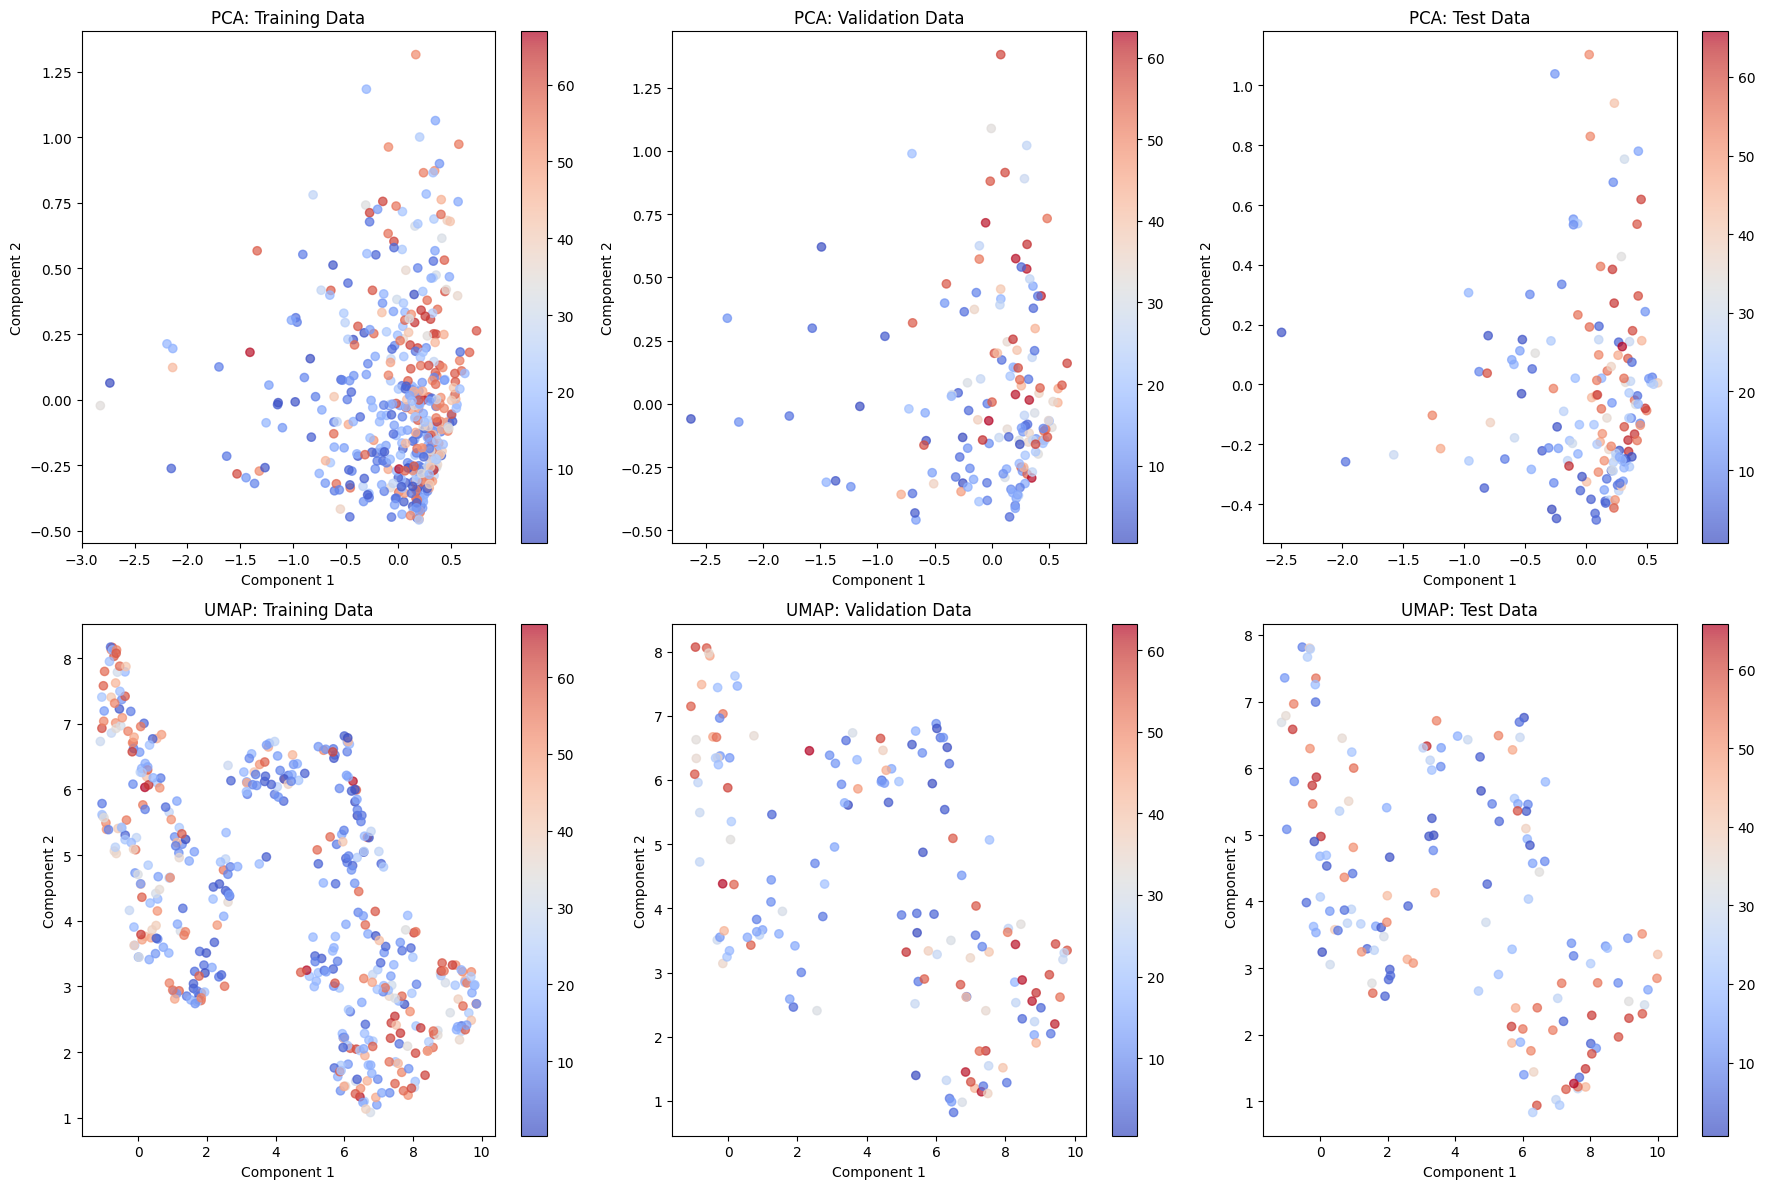

In [52]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap

# Assuming y_data_train, y_data_val, and y_data_test are pandas Series or arrays
y_train = y_data_train[task].values
y_val = y_data_val[task].values
y_test = y_data_test[task].values

# Convert latent representations to numpy arrays for visualization
latent_rep_train_np = latent_rep_train.detach().numpy()
latent_rep_val_np = latent_rep_val.detach().numpy()
latent_rep_test_np = latent_rep_test.detach().numpy()

# PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
latent_rep_train_pca = pca.fit_transform(latent_rep_train_np)
latent_rep_val_pca = pca.transform(latent_rep_val_np)
latent_rep_test_pca = pca.transform(latent_rep_test_np)

# UMAP for dimensionality reduction to 2D
umap_reducer = umap.UMAP(n_components=2, random_state=42)
latent_rep_train_umap = umap_reducer.fit_transform(latent_rep_train_np)
latent_rep_val_umap = umap_reducer.transform(latent_rep_val_np)
latent_rep_test_umap = umap_reducer.transform(latent_rep_test_np)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot PCA results
axes[0, 0].scatter(latent_rep_train_pca[:, 0], latent_rep_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
axes[0, 0].set_title('PCA: Training Data')
axes[0, 0].set_xlabel('Component 1')
axes[0, 0].set_ylabel('Component 2')
axes[0, 0].colorbar = plt.colorbar(axes[0, 0].collections[0], ax=axes[0, 0])

axes[0, 1].scatter(latent_rep_val_pca[:, 0], latent_rep_val_pca[:, 1], c=y_val, cmap='coolwarm', alpha=0.7)
axes[0, 1].set_title('PCA: Validation Data')
axes[0, 1].set_xlabel('Component 1')
axes[0, 1].set_ylabel('Component 2')
axes[0, 1].colorbar = plt.colorbar(axes[0, 1].collections[0], ax=axes[0, 1])

axes[0, 2].scatter(latent_rep_test_pca[:, 0], latent_rep_test_pca[:, 1], c=y_test, cmap='coolwarm', alpha=0.7)
axes[0, 2].set_title('PCA: Test Data')
axes[0, 2].set_xlabel('Component 1')
axes[0, 2].set_ylabel('Component 2')
axes[0, 2].colorbar = plt.colorbar(axes[0, 2].collections[0], ax=axes[0, 2])

# Plot UMAP results
axes[1, 0].scatter(latent_rep_train_umap[:, 0], latent_rep_train_umap[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
axes[1, 0].set_title('UMAP: Training Data')
axes[1, 0].set_xlabel('Component 1')
axes[1, 0].set_ylabel('Component 2')
axes[1, 0].colorbar = plt.colorbar(axes[1, 0].collections[0], ax=axes[1, 0])

axes[1, 1].scatter(latent_rep_val_umap[:, 0], latent_rep_val_umap[:, 1], c=y_val, cmap='coolwarm', alpha=0.7)
axes[1, 1].set_title('UMAP: Validation Data')
axes[1, 1].set_xlabel('Component 1')
axes[1, 1].set_ylabel('Component 2')
axes[1, 1].colorbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])

axes[1, 2].scatter(latent_rep_test_umap[:, 0], latent_rep_test_umap[:, 1], c=y_test, cmap='coolwarm', alpha=0.7)
axes[1, 2].set_title('UMAP: Test Data')
axes[1, 2].set_xlabel('Component 1')
axes[1, 2].set_ylabel('Component 2')
axes[1, 2].colorbar = plt.colorbar(axes[1, 2].collections[0], ax=axes[1, 2])

# Adjust layout
plt.tight_layout()
plt.show()


/home/leilapirhaji/.local/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



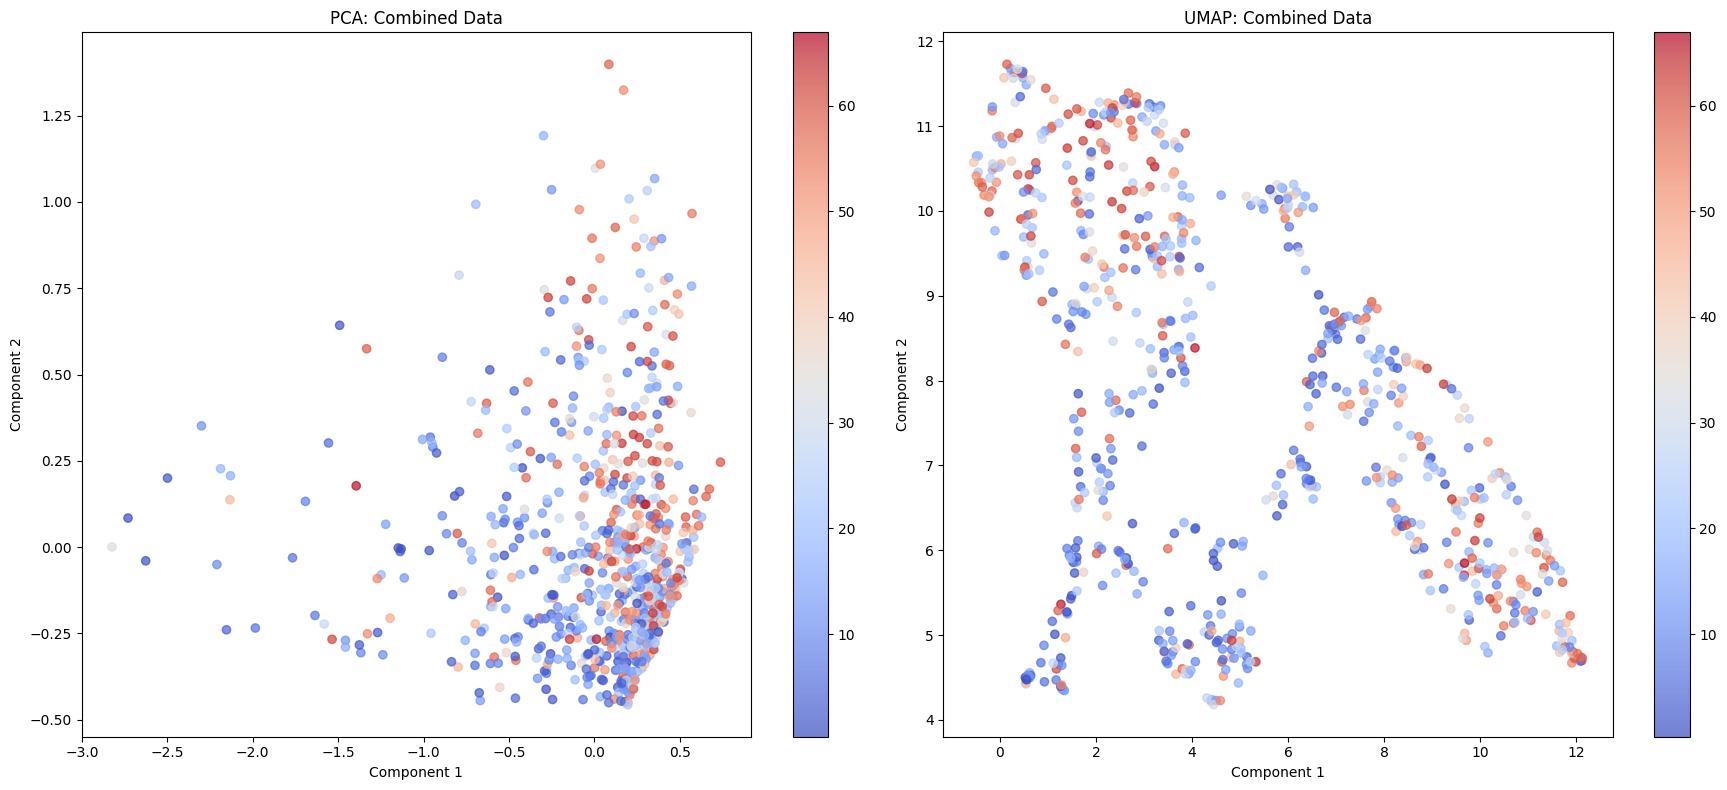

In [51]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap

# Assuming y_data_train, y_data_val, and y_data_test are pandas Series or arrays
y_train = y_data_train[task].values
y_val = y_data_val[task].values
y_test = y_data_test[task].values

# Convert latent representations to numpy arrays for visualization
latent_rep_train_np = latent_rep_train.detach().numpy()
latent_rep_val_np = latent_rep_val.detach().numpy()
latent_rep_test_np = latent_rep_test.detach().numpy()

# Concatenate latent representations and labels
latent_rep_all = np.concatenate([latent_rep_train_np, latent_rep_val_np, latent_rep_test_np], axis=0)
y_all = np.concatenate([y_train, y_val, y_test], axis=0)

# PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
latent_rep_all_pca = pca.fit_transform(latent_rep_all)

# UMAP for dimensionality reduction to 2D
umap_reducer = umap.UMAP(n_components=2, random_state=42)
latent_rep_all_umap = umap_reducer.fit_transform(latent_rep_all)

# Create a combined figure for PCA and UMAP
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot combined PCA results
scatter_pca = axes[0].scatter(latent_rep_all_pca[:, 0], latent_rep_all_pca[:, 1], c=y_all, cmap='coolwarm', alpha=0.7)
axes[0].set_title('PCA: Combined Data')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')
axes[0].colorbar = plt.colorbar(scatter_pca, ax=axes[0])

# Plot combined UMAP results
scatter_umap = axes[1].scatter(latent_rep_all_umap[:, 0], latent_rep_all_umap[:, 1], c=y_all, cmap='coolwarm', alpha=0.7)
axes[1].set_title('UMAP: Combined Data')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')
axes[1].colorbar = plt.colorbar(scatter_umap, ax=axes[1])

# Adjust layout
plt.tight_layout()
plt.show()
